# Library

In [ ]:
# install code for Colab
# For MinMaxScaler
!pip install "dask[complete]"
!python -m pip install dask[dataframe] --upgrade
!pip install dask_ml

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.7f}'.format

# HOPPORT Extraction

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL_proj/AD-DL Proj/final_data/df_with_type.csv')
df.head()

,Unnamed: 0,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,...,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Type
0,0,0,0,112641719,3,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,0.026633,56320860.00,139.30003,56320958.0,56320761.0,112641719.0,56320860.00,139.30003,56320958.0,56320761.0,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0.026633,0.000000,...,0,0.0,0.0,0.00,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0.0,0.0,56320860.0,139.30003,56320958.0,56320761.0,Benign,0
1,1,0,0,112641466,3,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,0.026633,56320732.00,114.55130,56320814.0,56320652.0,112641466.0,56320732.00,114.55130,56320814.0,56320652.0,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0.026633,0.000000,...,0,0.0,0.0,0.00,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0.0,0.0,56320732.0,114.55130,56320814.0,56320652.0,Benign,0
2,2,0,0,112638623,3,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,0.026634,56319310.00,301.93460,56319525.0,56319098.0,112638623.0,56319310.00,301.93460,56319525.0,56319098.0,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0.026634,0.000000,...,0,0.0,0.0,0.00,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0.0,0.0,56319310.0,301.93460,56319525.0,56319098.0,Benign,0
3,3,22,6,6453966,15,10,1239,2273.0,744,0,82.6,196.8,976,0,227.2,371.8,544.161528,3.873587,268915.25,247443.78000,673900.0,22.0,6453966.0,460997.56,123109.42000,673900.0,229740.0,5637902.0,626433.56,455082.22,1167293.0,554.0,0,0,0,0,488,328,2.324152,1.549435,...,976,135.1,277.8,77192.16,0,0,0,1,0,0,0,0,0,140.5,82.6,227.2,0,0,0,0,0,0,15,1239,10,2273,65535,233,6,32,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,Benign,0
4,4,22,6,8804066,14,11,1143,2209.0,744,0,81.6,203.8,976,0,200.9,362.2,380.733175,2.839597,366836.10,511356.62000,1928102.0,21.0,8804066.0,677235.90,532417.00000,1928102.0,246924.0,7715481.0,771548.10,755543.06,2174893.0,90.0,0,0,0,0,456,360,1.590174,1.249423,...,976,128.9,279.8,78267.35,0,0,0,1,0,0,0,0,0,134.1,81.6,200.9,0,0,0,0,0,0,14,1143,11,2209,5808,233,6,32,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,Benign,0


In [ ]:
# TCP, UDP, HOP
# tcp_idx = df['Protocol'] == 6
# udp_idx = df['Protocol'] == 17
hop_idx = df['Protocol'] == 0

# tcp = df.loc[tcp_idx, :]
# udp = df.loc[udp_idx, :]
hop = df.loc[hop_idx, :]

len(hop)

94166

In [ ]:
hop.to_pickle('/content/drive/MyDrive/Colab Notebooks/DL_proj/AD-DL Proj/final_data/hop.pickle')

# Data Setting

In [ ]:
import pandas as pd
hop = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/DL_proj/AD-DL Proj/final_data/hop.pickle')
hop = hop.drop(columns=['Unnamed: 0', 'Dst Port', 'Protocol'])
hop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94166 entries, 0 to 8247867
Data columns (total 78 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow Duration      94166 non-null  int64  
 1   Tot Fwd Pkts       94166 non-null  int64  
 2   Tot Bwd Pkts       94166 non-null  int64  
 3   TotLen Fwd Pkts    94166 non-null  int64  
 4   TotLen Bwd Pkts    94166 non-null  float64
 5   Fwd Pkt Len Max    94166 non-null  int64  
 6   Fwd Pkt Len Min    94166 non-null  int64  
 7   Fwd Pkt Len Mean   94166 non-null  float64
 8   Fwd Pkt Len Std    94166 non-null  float64
 9   Bwd Pkt Len Max    94166 non-null  int64  
 10  Bwd Pkt Len Min    94166 non-null  int64  
 11  Bwd Pkt Len Mean   94166 non-null  float64
 12  Bwd Pkt Len Std    94166 non-null  float64
 13  Flow Byts/s        94166 non-null  float64
 14  Flow Pkts/s        94166 non-null  float64
 15  Flow IAT Mean      94166 non-null  float64
 16  Flow IAT Std       9

In [ ]:
hop.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Type
0,112641719,3,0,0,0.0000000,0,0,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0.0266331,56320860.0000000,139.3000300,56320958.0000000,56320761.0000000,112641719.0000000,56320860.0000000,139.3000300,56320958.0000000,56320761.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0.0266331,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0000000,0.0000000,0.0000000,0.0000000,56320860.0000000,139.3000300,56320958.0000000,56320761.0000000,Benign,0
1,112641466,3,0,0,0.0000000,0,0,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0.0266332,56320732.0000000,114.5513000,56320814.0000000,56320652.0000000,112641466.0000000,56320732.0000000,114.5513000,56320814.0000000,56320652.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0.0266332,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0000000,0.0000000,0.0000000,0.0000000,56320732.0000000,114.5513000,56320814.0000000,56320652.0000000,Benign,0
2,112638623,3,0,0,0.0000000,0,0,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0.0266338,56319310.0000000,301.9346000,56319525.0000000,56319098.0000000,112638623.0000000,56319310.0000000,301.9346000,56319525.0000000,56319098.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0.0266338,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0000000,0.0000000,0.0000000,0.0000000,56319310.0000000,301.9346000,56319525.0000000,56319098.0000000,Benign,0
6,112640480,3,0,0,0.0000000,0,0,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0.0266334,56320240.0000000,203.6467600,56320384.0000000,56320096.0000000,112640480.0000000,56320240.0000000,203.6467600,56320384.0000000,56320096.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0.0266334,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0000000,0.0000000,0.0000000,0.0000000,56320240.0000000,203.6467600,56320384.0000000,56320096.0000000,Benign,0
7,112641244,3,0,0,0.0000000,0,0,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0.0266332,56320624.0000000,62.2253950,56320666.0000000,56320578.0000000,112641244.0000000,56320624.0000000,62.2253950,56320666.0000000,56320578.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0.0266332,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0000000,0.0000000,0.0000000,0.0000000,56320624.0000000,62.2253950,56320666.0000000,56320578.0000000,Benign,0


In [ ]:
hop.describe()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Type
count,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000,94166.0000000
mean,85751085.1518064,9.3558715,0.1215194,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,551.2838973,36348504.5894071,1795615.2369335,39500687.6624578,35086345.1554276,85794037.6192256,37143139.1358010,1093596.0699197,39500691.0477136,36381805.4944354,2531070.7628125,1310806.6869437,30619.3715740,1361460.3437122,1295425.4178366,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,361.9041851,189.3797122,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0475225,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,9.3558715,0.0000000,0.1215194,0.0000000,-1.0000000,-1.0000000,0.0000000,0.0000000,2734461.4473861,1484898.2734080,3932473.4825308,1690930.7557611,38696234.3625619,671783.2816403,39368852.3036022,38165324.1121424,0.0269099
std,44624079.4361300,23.9024201,0.6353241,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,4272.0799106,26012771.0862976,6120130.1073824,24344985.0600792,27239432.5710200,44650310.1903949,25980702.8276346,4394255.7996921,24344984.4772708,26759379.5743049,15480897.9763772,8084056.2361968,599706.4863078,8223757.4700668,8061312.0170119,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,2615.9773642,1955.5625969,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.2127547,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,23.9024201,0.0000000,0.6353241,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,11392714.5378453,7212654.5494522,15224436.6557092,9534826.1821307,24837912.9637437,3126873.1282047,24550516.9166960,25304923.5818088,0.1

In [ ]:
# tcp_normal = tcp[tcp['Type']==0]
# tcp_abnormal = tcp[tcp['Type']==1]

# udp_normal = udp[udp['Type']==0]
# udp_abnormal = udp[udp['Type']==1]

hop_normal = hop[hop['Type']==0]
hop_abnormal = hop[hop['Type']==1]

In [ ]:
len(hop_normal), len(hop_abnormal)

(91632, 2534)

In [ ]:
from dask_ml.preprocessing import MinMaxScaler
def Scaler(train_df):
  X = train_df.copy()
  X.drop(columns=['Label', 'Type'], inplace=True)
  mm = MinMaxScaler()
  mm.fit(X)
  return mm

def MinMax(df, scaler):
  X = df.drop(columns=['Label', 'Type'])
  y = df['Type']
  X_mm = scaler.transform(X)
  return X_mm, y

# tcp_normal_sample = tcp_normal.loc[tcp_normal_sample_idx, :]
# tcp_abnormal_sample = tcp_abnormal.loc[tcp_abnormal_sample_idx, :]

# udp_normal_sample = udp_normal.loc[udp_normal_sample_idx, :]
# udp_abnormal_sample = udp_abnormal.loc[udp_abnormal_sample_idx, :]

hop_normal_sample = hop_normal
hop_abnormal_sample = hop_abnormal

# Columns transform
# tcp_mm = Scaler(tcp_normal_sample)
# udp_mm = Scaler(udp_normal_sample)
hop_mm = Scaler(hop_normal_sample)

# X_tcp_normal_mm, y_tcp_normal = MinMax(tcp_normal_sample, tcp_mm)
# X_udp_normal_mm, y_udp_normal = MinMax(udp_normal_sample, udp_mm)
X_hop_normal_mm, y_hop_normal = MinMax(hop_normal_sample, hop_mm)

# X_tcp_abnormal_mm, y_tcp_abnormal = MinMax(tcp_abnormal_sample, tcp_mm)
# X_udp_abnormal_mm, y_udp_abnormal = MinMax(udp_abnormal_sample, udp_mm)
X_hop_abnormal_mm, y_hop_abnormal = MinMax(hop_abnormal_sample, hop_mm)

In [ ]:
# X_tcp_normal_mm_train = X_tcp_normal_mm[:60000]
# X_udp_normal_mm_train = X_udp_normal_mm[:60000]
X_hop_normal_mm_train = X_hop_normal_mm[:60000]
# X_tcp_normal_mm_test = X_tcp_normal_mm[60000:]
# X_udp_normal_mm_test = X_udp_normal_mm[60000:]
X_hop_normal_mm_test = X_hop_normal_mm[60000:]
# y_tcp_normal_train = y_tcp_normal[:60000]
# y_udp_normal_train = y_udp_normal[:60000]
y_hop_normal_train = y_hop_normal[:60000]
# y_tcp_normal_test = y_tcp_normal[60000:]
# y_udp_normal_test = y_udp_normal[60000:]
y_hop_normal_test = y_hop_normal[60000:]

In [ ]:
from torch.utils.data import Dataset

# reset_index
def get_new_idx(data):
  data = data.reset_index().drop('index',axis=1)
  return data

# customize dataset
class CustomDataset(Dataset):
  def __init__(self, feature, label):
    self.feature = feature
    # idx = self.feature.index
    self.label = label

  def __len__(self):
    return len(self.feature)

  def __getitem__(self, index) : 
    feature = torch.from_numpy(self.feature.loc[index].values).float()
    label = torch.from_numpy(self.label.loc[index].values).float()
    
    return feature, label

In [ ]:
from torch.utils.data import DataLoader

# tcp_test_raw = pd.concat([X_tcp_abnormal_mm, X_tcp_normal_mm_test])
# udp_test_raw = pd.concat([X_udp_abnormal_mm, X_udp_normal_mm_test])
hop_test_raw = pd.concat([X_hop_abnormal_mm, X_hop_normal_mm_test])

# tcp_label_raw = pd.concat([y_tcp_abnormal, y_tcp_normal_test])
# udp_label_raw = pd.concat([y_udp_abnormal, y_udp_normal_test])
hop_label_raw = pd.concat([y_hop_abnormal, y_hop_normal_test])

# tcp_train = get_new_idx(X_tcp_normal_mm_train)
# udp_train = get_new_idx(X_udp_normal_mm_train)
hop_train = get_new_idx(X_hop_normal_mm_train)
# tcp_test = get_new_idx(tcp_test_raw)
# udp_test = get_new_idx(udp_test_raw)
hop_test = get_new_idx(hop_test_raw)

# tcp_label_train = get_new_idx(y_tcp_normal_train)
# udp_label_train = get_new_idx(y_udp_normal_train)
hop_label_train = get_new_idx(y_hop_normal_train)
# tcp_label_test = get_new_idx(tcp_label_raw)
# udp_label_test = get_new_idx(udp_label_raw)
hop_label_test = get_new_idx(hop_label_raw)

# to_tensor and dataloader
BATCH_SIZE = 32
# tcp_train_loader = DataLoader(CustomDataset(tcp_train, tcp_label_train), BATCH_SIZE, shuffle=True)
# udp_train_loader = DataLoader(CustomDataset(udp_train, udp_label_train), BATCH_SIZE, shuffle=True)
hop_train_loader = DataLoader(CustomDataset(hop_train, hop_label_train), BATCH_SIZE, shuffle=True)
# test_loader1 = DataLoader(CustomDataset(tcp_test, tcp_label_test), BATCH_SIZE, shuffle=True)
# test_loader2 = DataLoader(CustomDataset(udp_test, udp_label_test), BATCH_SIZE, shuffle=True)
hop_test_loader = DataLoader(CustomDataset(hop_test, hop_label_test), BATCH_SIZE, shuffle=True)

In [ ]:
import torch
for data in hop_train_loader:
  BATCH_SIZE, FEATURE_NUM = data[0].shape
  break

print(BATCH_SIZE, FEATURE_NUM)

32 76


# Modeling

## Base AE Model - AutoEncoder

In [ ]:
import tensorflow as tf
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd

# AutoEncoder
class AutoEncoder(nn.Module):
  def __init__(self, input_dim, output_dim, code_size=2):
    super(AutoEncoder, self).__init__()

    self.input_dim = input_dim
    self.output_dim = output_dim

    self.encoder = nn.Sequential(
        nn.Linear(input_dim, code_size),
        nn.BatchNorm1d(2),
        nn.ReLU(),
    )

    self.decoder = nn.Sequential(
        nn.Linear(code_size, output_dim),
        nn.Sigmoid()
    )

  def forward(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded, decoded

In [ ]:
# Simple AE setting
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_hop_ae = AutoEncoder(input_dim=FEATURE_NUM, 
                    output_dim=FEATURE_NUM).to(DEVICE)
criterion = nn.MSELoss()
learning_rate = 0.0008
optimizer = torch.optim.Adam(model_hop_ae.parameters(),lr=learning_rate)
model_hop_ae

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=76, out_features=2, bias=True)
    (1): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=76, bias=True)
    (1): Sigmoid()
  )
)

### Train

In [ ]:
# model_hop_ae training
from tqdm import tqdm
train_losses = []

num_epochs = 10
for epoch in tqdm(range(num_epochs)):
  running_loss = 0
  model_hop_ae.train()
  for datas in hop_train_loader:
    data, _ = datas
    data = data.to(DEVICE)
    data = data.float()
    # ===================forward=====================
    encoded, decoded = model_hop_ae.forward(data)
    loss = criterion(decoded, data)
    # ===================backward====================
    optimizer.zero_grad()
    loss.backward()

    # Step backwards
    optimizer.step()
    running_loss += loss.item()
  train_losses.append(running_loss/len(hop_train_loader))
  # ===================log========================
  print(f'epoch [{epoch + 1}/{num_epochs}], train loss:{running_loss/len(hop_train_loader):.4f}')

 10%|█         | 1/10 [00:26<03:54, 26.03s/it]

epoch [1/10], train loss:0.0603


 20%|██        | 2/10 [00:50<03:18, 24.86s/it]

epoch [2/10], train loss:0.0034


 30%|███       | 3/10 [01:14<02:52, 24.67s/it]

epoch [3/10], train loss:0.0020


 40%|████      | 4/10 [01:40<02:32, 25.38s/it]

epoch [4/10], train loss:0.0016


 50%|█████     | 5/10 [02:06<02:06, 25.29s/it]

epoch [5/10], train loss:0.0013


 60%|██████    | 6/10 [02:29<01:37, 24.50s/it]

epoch [6/10], train loss:0.0011


 70%|███████   | 7/10 [02:51<01:11, 23.96s/it]

epoch [7/10], train loss:0.0009


 80%|████████  | 8/10 [03:14<00:47, 23.61s/it]

epoch [8/10], train loss:0.0009


 90%|█████████ | 9/10 [03:37<00:23, 23.42s/it]

epoch [9/10], train loss:0.0008


100%|██████████| 10/10 [04:01<00:00, 24.11s/it]

epoch [10/10], train loss:0.0008


In [ ]:
torch.save(model_hop_ae, '/content/drive/MyDrive/Colab Notebooks/DL_proj/AD-DL Proj/model/AE_code2_B32_E10_model_hop_alldata.pt')

In [ ]:
model_hop_ae = torch.load('/content/drive/MyDrive/Colab Notebooks/DL_proj/AD-DL Proj/model/AE_code2_B32_E10_model_hop_alldata.pt')

In [ ]:
# Simple AE setting
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_hop_ae = model_hop_ae.to(DEVICE)
criterion = nn.MSELoss()
learning_rate = 0.0008
optimizer = torch.optim.Adam(model_hop_ae.parameters(),lr=learning_rate)
model_hop_ae

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=76, out_features=2, bias=True)
    (1): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=76, bias=True)
    (1): Sigmoid()
  )
)

In [ ]:
# code_size = 2
# train_loss collection
from tqdm import tqdm
model_hop_ae.eval()

train_loss_collection = []

with torch.no_grad():
  for datases in tqdm(hop_train_loader): 
    datas, labels = datases
    for data, label in zip(datas, labels):
      data = data.to(DEVICE)
      label = np.array(label)
      data = data.reshape(1, data.shape[0])
      encoded, decoded = model_hop_ae.forward(data)
      loss = criterion(decoded, data)
      loss = loss.item()
      train_loss_collection.append(loss)

len(train_loss_collection)

100%|██████████| 1875/1875 [00:49<00:00, 37.72it/s]


60000

### Test

#### First Threshold

In [ ]:
import numpy as np
threshold = np.percentile(train_loss_collection, range(0, 101, 10))
threshold

array([8.42330064e-06, 9.09366918e-06, 9.11121842e-06, 9.12137912e-06,
       9.13019630e-06, 9.14075372e-06, 9.17318248e-06, 5.71328823e-05,
       4.01412876e-04, 2.17729723e-03, 4.82102074e-02])

In [ ]:
# code_size = 2
# model_hop_ae

# threshold
import numpy as np
threshold = np.percentile(train_loss_collection, range(0, 101, 10))

from tqdm import tqdm
model_hop_ae.eval()

predicted_abnormal = []
predicted_normal = []
real_abnormal = []
real_normal = []
total_loss = []
zero = []
one = []
f1_best = 0

test_result = pd.DataFrame(columns=['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall'], index=threshold)

for th in threshold:
  zero1 = []
  one1 = []
  total_loss1 = []
  # evaluation initiation
  tp = fn = fp = tn = 0
  with torch.no_grad():
    for datases in tqdm(hop_test_loader): 
      datas, labels = datases
      running_val_loss = 0 
      predicted_abnormal1 = []
      predicted_normal1 = []
      real_abnormal1 = []
      real_normal1 = []
      for data, label in zip(datas, labels):
        data = data.to(DEVICE)
        label = np.array(label)
        data = data.reshape(1, data.shape[0])
        encoded, decoded = model_hop_ae.forward(data)
        loss = criterion(decoded, data)
        loss = loss.item()
        # loss >= 0.001 ; predict as 'Abnormal'
        if loss >= th:
          # label == 0 ; real 'Normal'
          if label == 0: 
            fp += 1
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            tp += 1
            real_abnormal1.append(loss)
          predicted_abnormal1.append(loss)
        # loss < 0.001 ; predict as 'Normal'
        elif loss < th: 
          # label == 0 ; real 'Normal'
          if label == 0: 
            tn += 1
            real_normal1.append(loss)
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            fn += 1
          predicted_normal1.append(loss)
        total_loss1.append(loss)
        if label == 1:
          one1.append(loss)
        else:
          zero1.append(loss)
  try:
    acc = (tp+tn)/(tp+fn+fp+tn)
  except:
    acc = 'NaN'
  try:
    precision = tp/(tp+fp)
  except:
    precision = 'NaN'
  try:
    recall = tp/(tp+fn)
  except:
    recall = 'NaN'
  try:
    f1 = 2*(precision*recall)/(precision+recall)
  except:
    f1 = 'NaN'

  if f1 != 'NaN' and f1 > f1_best:
    f1_best = f1
    one = one1.copy()
    zero = zero1.copy()
    total_loss = total_loss1.copy()
    predicted_abnormal = predicted_abnormal1.copy()
    predicted_normal = predicted_normal1.copy()
    real_abnormal = real_abnormal1.copy()
    real_normal = real_normal1.copy()

  test_result.loc[th] = [tp, fp, tn, fn, acc, f1, precision, recall]
test_result

100%|██████████| 1068/1068 [00:26<00:00, 40.97it/s]


,tp,fp,tn,fn,acc,f1,precision,recall
0.0000084,2534,31631,1,0,0.0741966,0.1380964,0.0741695,1.0000000
0.0000091,2524,30742,890,10,0.0999239,0.1410056,0.0758733,0.9960537
0.0000091,2494,29024,2608,40,0.1493297,0.1464819,0.0791294,0.9842147
0.0000091,2219,23759,7873,315,0.2953814,0.1556538,0.0854184,0.8756906
0.0000091,1889,17577,14055,645,0.4666628,0.1717273,0.0970410,0.7454617
0.0000091,1844,17263,14369,690,0.4745361,0.1704173,0.0965091,0.7277032
0.0000092,1827,16456,15176,707,0.4976585,0.1755296,0.0999289,0.7209945
0.0000571,1639,14454,17178,895,0.5507522,0.1759811,0.1018455,0.6468035
0.0004014,1381,11767,19865,1153,0.6218463,0.1761255,0.1050350,0.5449882
0.0021773,800,8049,23583,1734,0.7136627,0.1405605,0.0904057,0.3157064


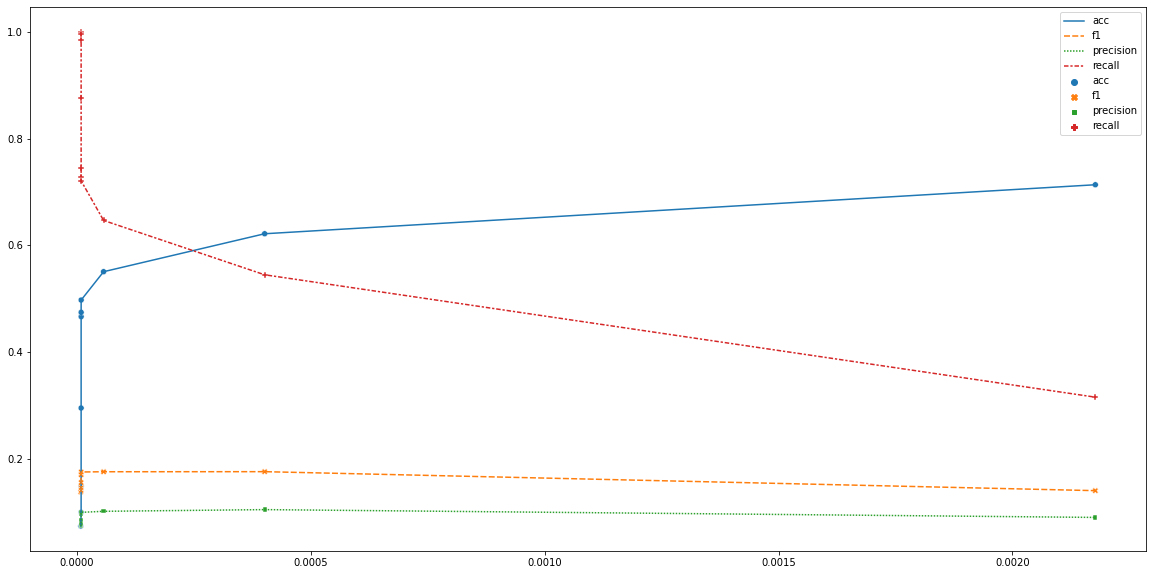

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=test_result.iloc[:-1][['acc', 'f1', 'precision', 'recall']])
sns.scatterplot(data=test_result.iloc[:-1][['acc', 'f1', 'precision', 'recall']])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


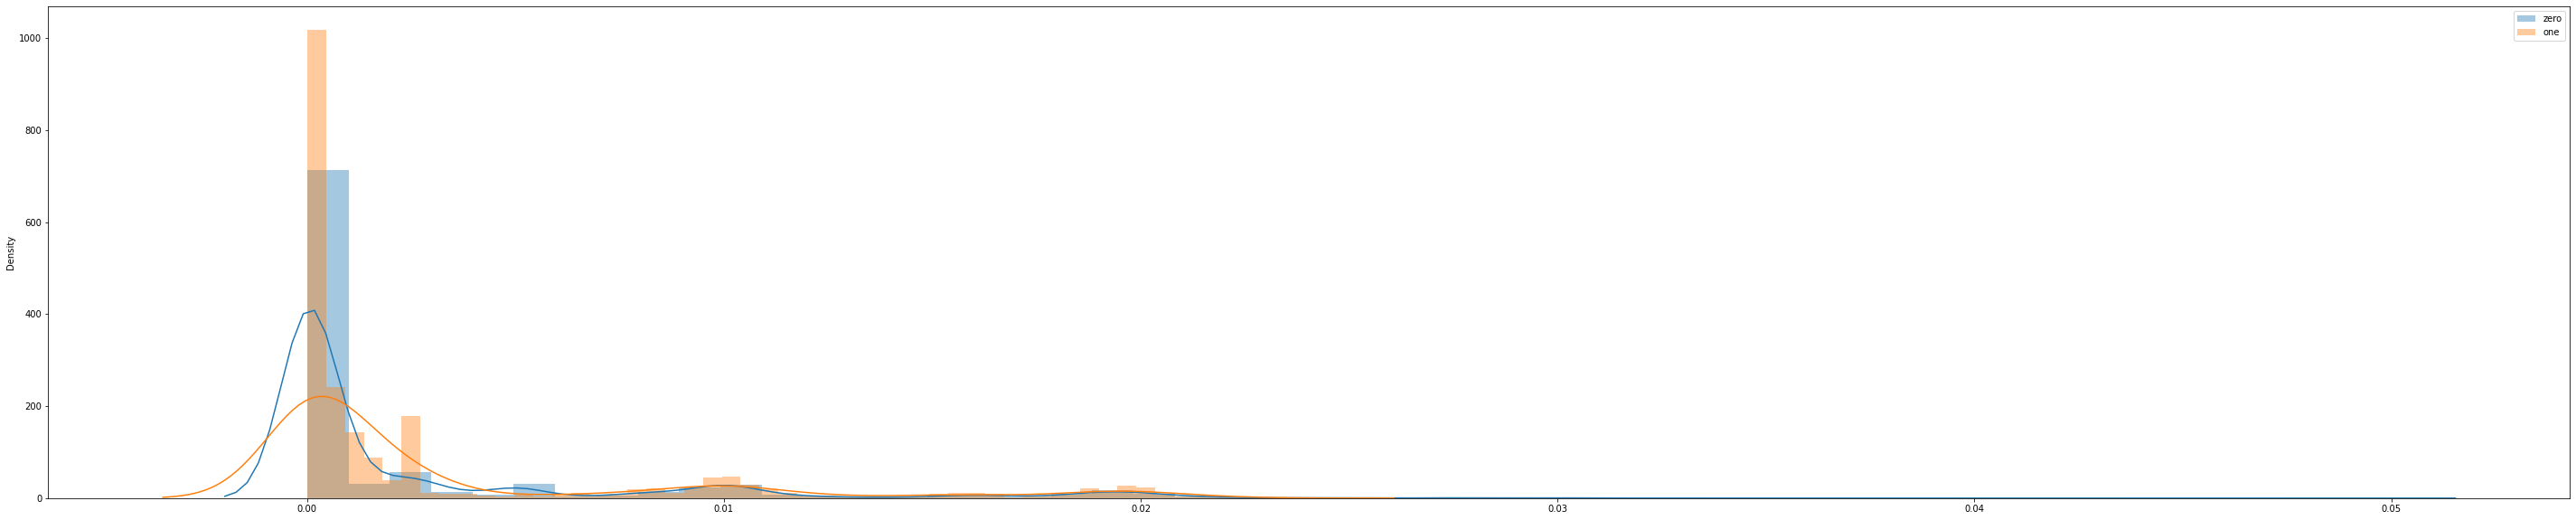

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.distplot(zero, label='zero')
sns.distplot(one, label='one')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


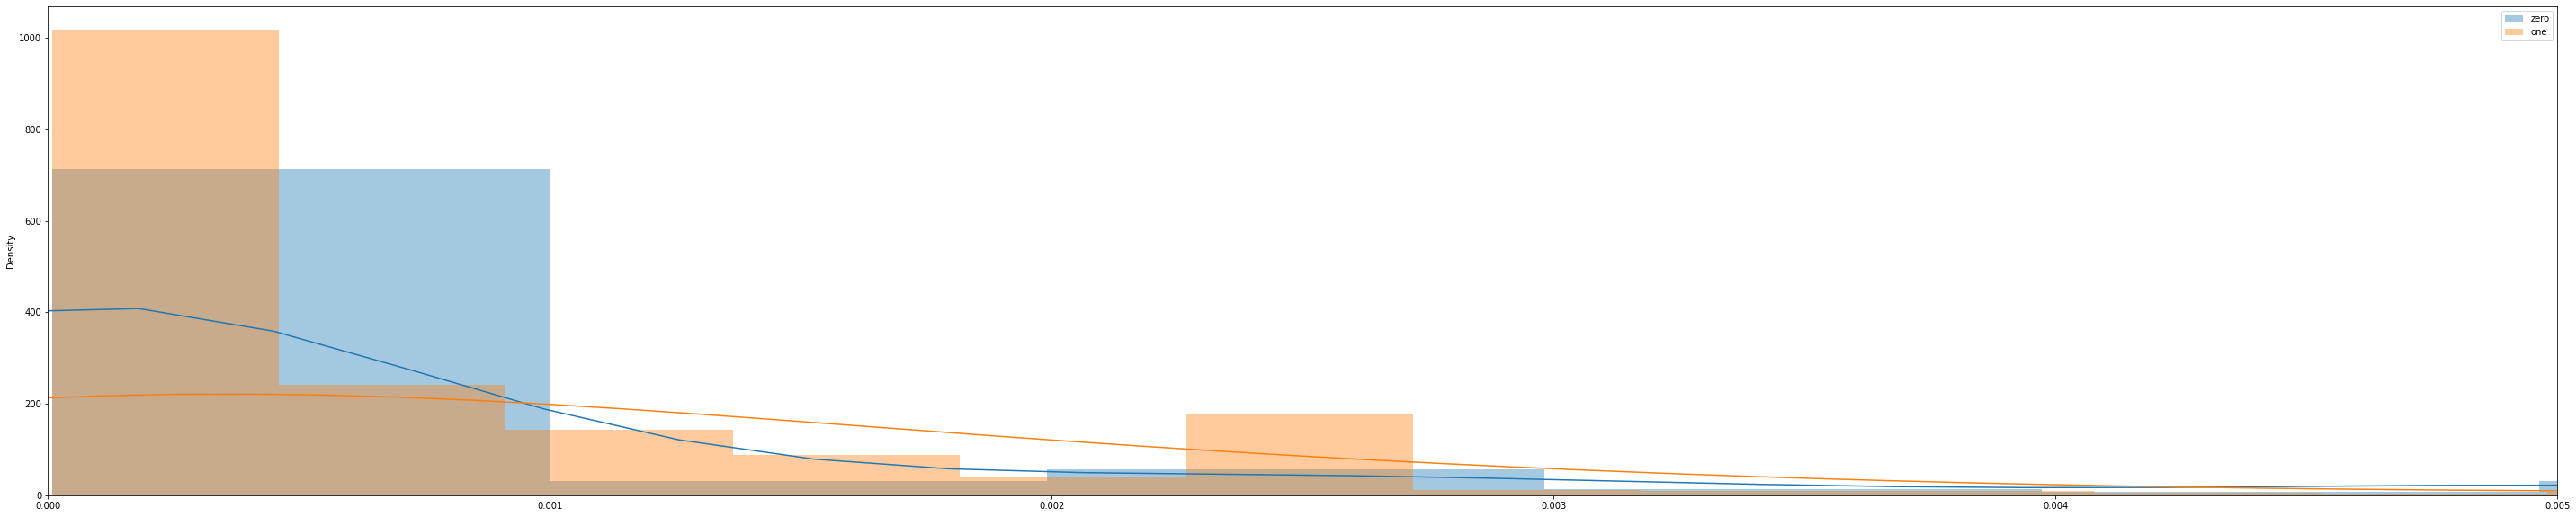

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.distplot(zero, label='zero')
sns.distplot(one, label='one')
plt.xlim(0, 0.005)
plt.legend()
plt.show()

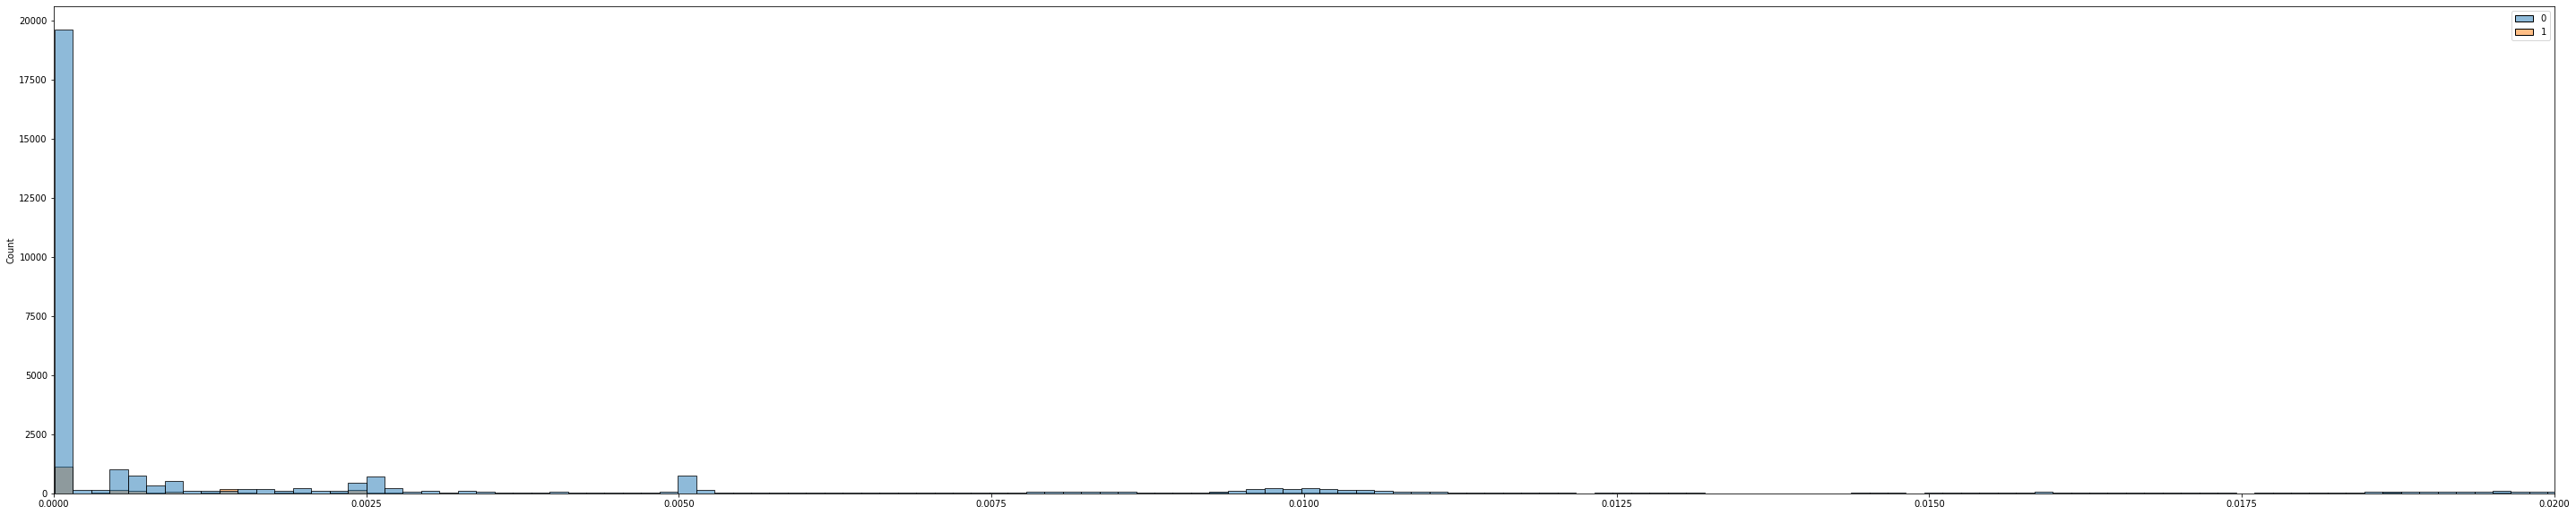

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.histplot([zero, one])
# plt.legend()
plt.xlim(0, 0.02)
plt.show()

#### Second threshold

In [ ]:
# code_size = 2
# model_hop_ae

# threshold
import numpy as np
threshold = np.percentile(train_loss_collection, range(80, 90))

from tqdm import tqdm
model_hop_ae.eval()

predicted_abnormal = []
predicted_normal = []
real_abnormal = []
real_normal = []
total_loss = []
zero = []
one = []
f1_best = 0

test_result = pd.DataFrame(columns=['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall'], index=threshold)

for th in threshold:
  zero1 = []
  one1 = []
  total_loss1 = []
  # evaluation initiation
  tp = fn = fp = tn = 0
  with torch.no_grad():
    for datases in tqdm(hop_test_loader): 
      datas, labels = datases
      running_val_loss = 0 
      predicted_abnormal1 = []
      predicted_normal1 = []
      real_abnormal1 = []
      real_normal1 = []
      for data, label in zip(datas, labels):
        data = data.to(DEVICE)
        label = np.array(label)
        data = data.reshape(1, data.shape[0])
        encoded, decoded = model_hop_ae.forward(data)
        loss = criterion(decoded, data)
        loss = loss.item()
        # loss >= 0.001 ; predict as 'Abnormal'
        if loss >= th:
          # label == 0 ; real 'Normal'
          if label == 0: 
            fp += 1
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            tp += 1
            real_abnormal1.append(loss)
          predicted_abnormal1.append(loss)
        # loss < 0.001 ; predict as 'Normal'
        elif loss < th: 
          # label == 0 ; real 'Normal'
          if label == 0: 
            tn += 1
            real_normal1.append(loss)
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            fn += 1
          predicted_normal1.append(loss)
        total_loss1.append(loss)
        if label == 1:
          one1.append(loss)
        else:
          zero1.append(loss)
  try:
    acc = (tp+tn)/(tp+fn+fp+tn)
  except:
    acc = 'NaN'
  try:
    precision = tp/(tp+fp)
  except:
    precision = 'NaN'
  try:
    recall = tp/(tp+fn)
  except:
    recall = 'NaN'
  try:
    f1 = 2*(precision*recall)/(precision+recall)
  except:
    f1 = 'NaN'

  if f1 != 'NaN' and f1 > f1_best:
    f1_best = f1
    one = one1.copy()
    zero = zero1.copy()
    total_loss = total_loss1.copy()
    predicted_abnormal = predicted_abnormal1.copy()
    predicted_normal = predicted_normal1.copy()
    real_abnormal = real_abnormal1.copy()
    real_normal = real_normal1.copy()

  test_result.loc[th] = [tp, fp, tn, fn, acc, f1, precision, recall]
test_result

100%|██████████| 1068/1068 [00:26<00:00, 40.10it/s]


,tp,fp,tn,fn,acc,f1,precision,recall
0.2561594,575,5177,26455,1959,0.7911374,0.1387883,0.0999652,0.2269140
0.2581436,437,4768,26864,2097,0.7990693,0.1129345,0.0839577,0.1724546
0.2590693,421,4464,27168,2113,0.8074987,0.1134924,0.0861822,0.1661405
0.2596444,419,4242,27390,2115,0.8139378,0.1164698,0.0898949,0.1653512
0.2603250,411,4058,27574,2123,0.8190892,0.1173783,0.0919669,0.1621942
0.2612375,396,3791,27841,2138,0.8264649,0.1178396,0.0945785,0.1562747
0.2621582,377,3483,28149,2157,0.8349236,0.1179231,0.0976684,0.1487766
0.2625170,326,3241,28391,2208,0.8405140,0.1068677,0.0913933,0.1286504
0.2627099,285,2938,28694,2249,0.8481824,0.0990099,0.0884269,0.1124704
0.2628957,239,2687,28945,2295,0.8541825,0.0875458,0.0816815,0.0943173


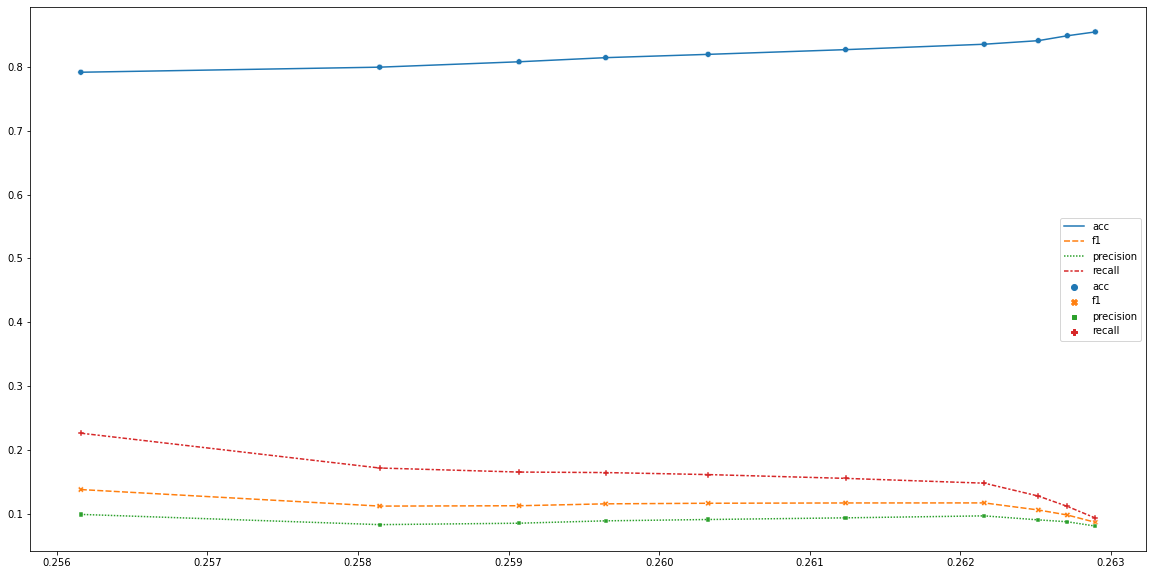

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=test_result[['acc', 'f1', 'precision', 'recall']])
sns.scatterplot(data=test_result[['acc', 'f1', 'precision', 'recall']])
plt.show()

zero max, min (0.0495607852935791,) (7.543878382421099e-06,)
one max, min (0.022609075531363487,) (8.44048827275401e-06,)


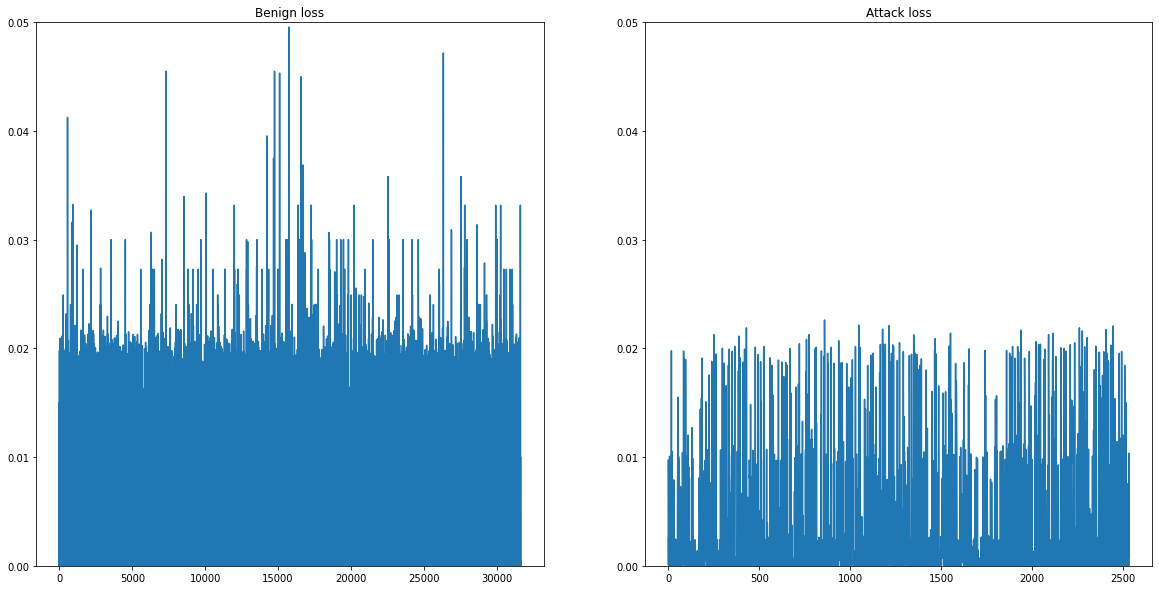

In [ ]:
zero_df = pd.DataFrame(zero1)
print('zero max, min', max(zero_df.value_counts().index), min(zero_df.value_counts().index))
one_df = pd.DataFrame(one1)
print('one max, min', max(one_df.value_counts().index), min(one_df.value_counts().index))

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].set_ylim([0, 0.05])
ax[1].set_ylim([0, 0.05])
ax[0].plot(zero_df)
ax[0].set_title('Benign loss')
ax[1].plot(one_df)
ax[1].set_title('Attack loss')
plt.show()

## Base AE Model - code_size=16

In [ ]:
import tensorflow as tf
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd

# AutoEncoder
class AutoEncoder(nn.Module):
  def __init__(self, input_dim, output_dim, code_size=16):
    super(AutoEncoder, self).__init__()

    self.input_dim = input_dim
    self.output_dim = output_dim

    self.encoder = nn.Sequential(
        nn.Linear(input_dim, code_size),
        nn.BatchNorm1d(16),
        nn.ReLU(),
    )

    self.decoder = nn.Sequential(
        nn.Linear(code_size, output_dim),
        nn.Sigmoid()
    )

  def forward(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded, decoded

In [ ]:
# Simple AE setting
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_hop_ae = AutoEncoder(input_dim=FEATURE_NUM, 
                    output_dim=FEATURE_NUM).to(DEVICE)
criterion = nn.MSELoss()
learning_rate = 0.0008
optimizer = torch.optim.Adam(model_hop_ae.parameters(),lr=learning_rate)
model_hop_ae

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=76, out_features=16, bias=True)
    (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=16, out_features=76, bias=True)
    (1): Sigmoid()
  )
)

### Train

In [ ]:
# model_hop_ae training
from tqdm import tqdm
train_losses = []

num_epochs = 10
for epoch in tqdm(range(num_epochs)):
  running_loss = 0
  model_hop_ae.train()
  for datas in hop_train_loader:
    data, _ = datas
    data = data.to(DEVICE)
    data = data.float()
    # ===================forward=====================
    encoded, decoded = model_hop_ae.forward(data)
    loss = criterion(decoded, data)
    # ===================backward====================
    optimizer.zero_grad()
    loss.backward()

    # Step backwards
    optimizer.step()
    running_loss += loss.item()
  train_losses.append(running_loss/len(hop_train_loader))
  # ===================log========================
  print(f'epoch [{epoch + 1}/{num_epochs}], train loss:{running_loss/len(hop_train_loader):.4f}')

 10%|█         | 1/10 [00:25<03:50, 25.63s/it]

epoch [1/10], train loss:0.0185


 20%|██        | 2/10 [00:49<03:17, 24.73s/it]

epoch [2/10], train loss:0.0005


 30%|███       | 3/10 [01:12<02:47, 23.98s/it]

epoch [3/10], train loss:0.0003


 40%|████      | 4/10 [01:36<02:22, 23.77s/it]

epoch [4/10], train loss:0.0002


 50%|█████     | 5/10 [01:58<01:56, 23.38s/it]

epoch [5/10], train loss:0.0002


 60%|██████    | 6/10 [02:21<01:33, 23.26s/it]

epoch [6/10], train loss:0.0001


 70%|███████   | 7/10 [02:45<01:09, 23.31s/it]

epoch [7/10], train loss:0.0001


 80%|████████  | 8/10 [03:08<00:46, 23.12s/it]

epoch [8/10], train loss:0.0001


 90%|█████████ | 9/10 [03:30<00:22, 22.99s/it]

epoch [9/10], train loss:0.0001


100%|██████████| 10/10 [03:53<00:00, 23.36s/it]

epoch [10/10], train loss:0.0001


In [ ]:
torch.save(model_hop_ae, '/content/drive/MyDrive/Colab Notebooks/DL_proj/AD-DL Proj/model/AE_code16_B32_E10_model_hop_alldata.pt')

In [ ]:
model_hop_ae = torch.load('/content/drive/MyDrive/Colab Notebooks/DL_proj/AD-DL Proj/model/AE_code16_B32_E10_model_hop_alldata.pt')

In [ ]:
# code_size = 16
# train_loss collection
from tqdm import tqdm
model_hop_ae.eval()

train_loss_collection = []

with torch.no_grad():
  for datases in tqdm(hop_train_loader): 
    datas, labels = datases
    for data, label in zip(datas, labels):
      data = data.to(DEVICE)
      label = np.array(label)
      data = data.reshape(1, data.shape[0])
      encoded, decoded = model_hop_ae.forward(data)
      loss = criterion(decoded, data)
      loss = loss.item()
      train_loss_collection.append(loss)

len(train_loss_collection)

100%|██████████| 1875/1875 [00:45<00:00, 41.06it/s]


60000

### Test

#### First Threshold

In [ ]:
import numpy as np
threshold = np.percentile(train_loss_collection, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
threshold

array([1.03454622e-05, 4.42959368e-05, 5.18482077e-05, 9.42801707e-05,
       9.43211999e-05, 9.43503401e-05, 9.43810184e-05, 9.44124258e-05,
       9.44504936e-05, 1.11961005e-04, 1.62139311e-02])

In [ ]:
# code_size = 2
# model_hop_ae
# threshold
from tqdm import tqdm
model_hop_ae.eval()

predicted_abnormal = []
predicted_normal = []
real_abnormal = []
real_normal = []
total_loss1 = []
zero1 = []
one1 = []

test_result = pd.DataFrame(columns=['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall'], index=threshold)

for th in threshold:
  # evaluation initiation
  tp = fn = fp = tn = 0
  with torch.no_grad():
    for datases in tqdm(hop_test_loader): 
      datas, labels = datases
      running_val_loss = 0 
      real_abnormal = []
      for data, label in zip(datas, labels):
        data = data.to(DEVICE)
        label = np.array(label)
        data = data.reshape(1, data.shape[0])
        encoded, decoded = model_hop_ae.forward(data)
        loss = criterion(decoded, data)
        loss = loss.item()
        # loss >= 0.001 ; predict as 'Abnormal'
        if loss >= th:
          # label == 0 ; real 'Normal'
          if label == 0: 
            fp += 1
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            tp += 1
            real_abnormal.append(loss)
          predicted_abnormal.append(loss)
        # loss < 0.001 ; predict as 'Normal'
        elif loss < th: 
          # label == 0 ; real 'Normal'
          if label == 0: 
            tn += 1
            real_normal.append(loss)
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            fn += 1
          predicted_normal.append(loss)
        total_loss1.append(loss)
        if label == 1:
          one1.append(loss)
        else:
          zero1.append(loss)
  try:
    acc = (tp+tn)/(tp+fn+fp+tn)
  except:
    acc = 'NaN'
  try:
    precision = tp/(tp+fp)
  except:
    precision = 'NaN'
  try:
    recall = tp/(tp+fn)
  except:
    recall = 'NaN'
  try:
    f1 = 2*(precision*recall)/(precision+recall)
  except:
    f1 = 'NaN'

  test_result.loc[th] = [tp, fp, tn, fn, acc, f1, precision, recall]
test_result

100%|██████████| 1068/1068 [00:26<00:00, 40.02it/s]


,tp,fp,tn,fn,acc,f1,precision,recall
0.0000103,2534,31628,4,0,0.0742844,0.1381077,0.0741760,1.0000000
0.0000443,2233,28434,3198,301,0.1589592,0.1345140,0.0728144,0.8812155
0.0000518,2107,26498,5134,427,0.2119358,0.1353287,0.0736585,0.8314917
0.0000943,1897,23786,7846,637,0.2851665,0.1344580,0.0738621,0.7486188
0.0000943,1896,23374,8258,638,0.2971960,0.1363833,0.0750297,0.7482242
0.0000944,1896,23219,8413,638,0.3017327,0.1371478,0.0754927,0.7482242
0.0000944,1895,22398,9234,639,0.3257332,0.1412756,0.0780060,0.7478295
0.0000944,1895,21409,10223,639,0.3546801,0.1466832,0.0813165,0.7478295
0.0000945,1875,20098,11534,659,0.3924662,0.1530175,0.0853320,0.7399369
0.0001120,1132,8142,23490,1402,0.7206580,0.1917344,0.1220617,0.4467245


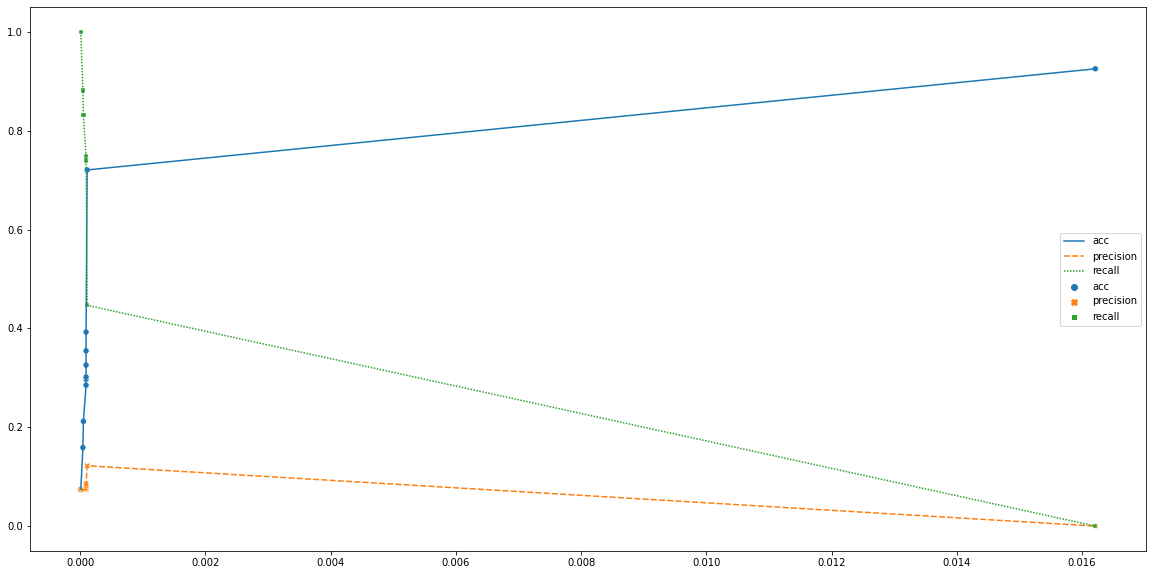

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=test_result[['acc', 'f1', 'precision', 'recall']])
sns.scatterplot(data=test_result[['acc', 'f1', 'precision', 'recall']])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


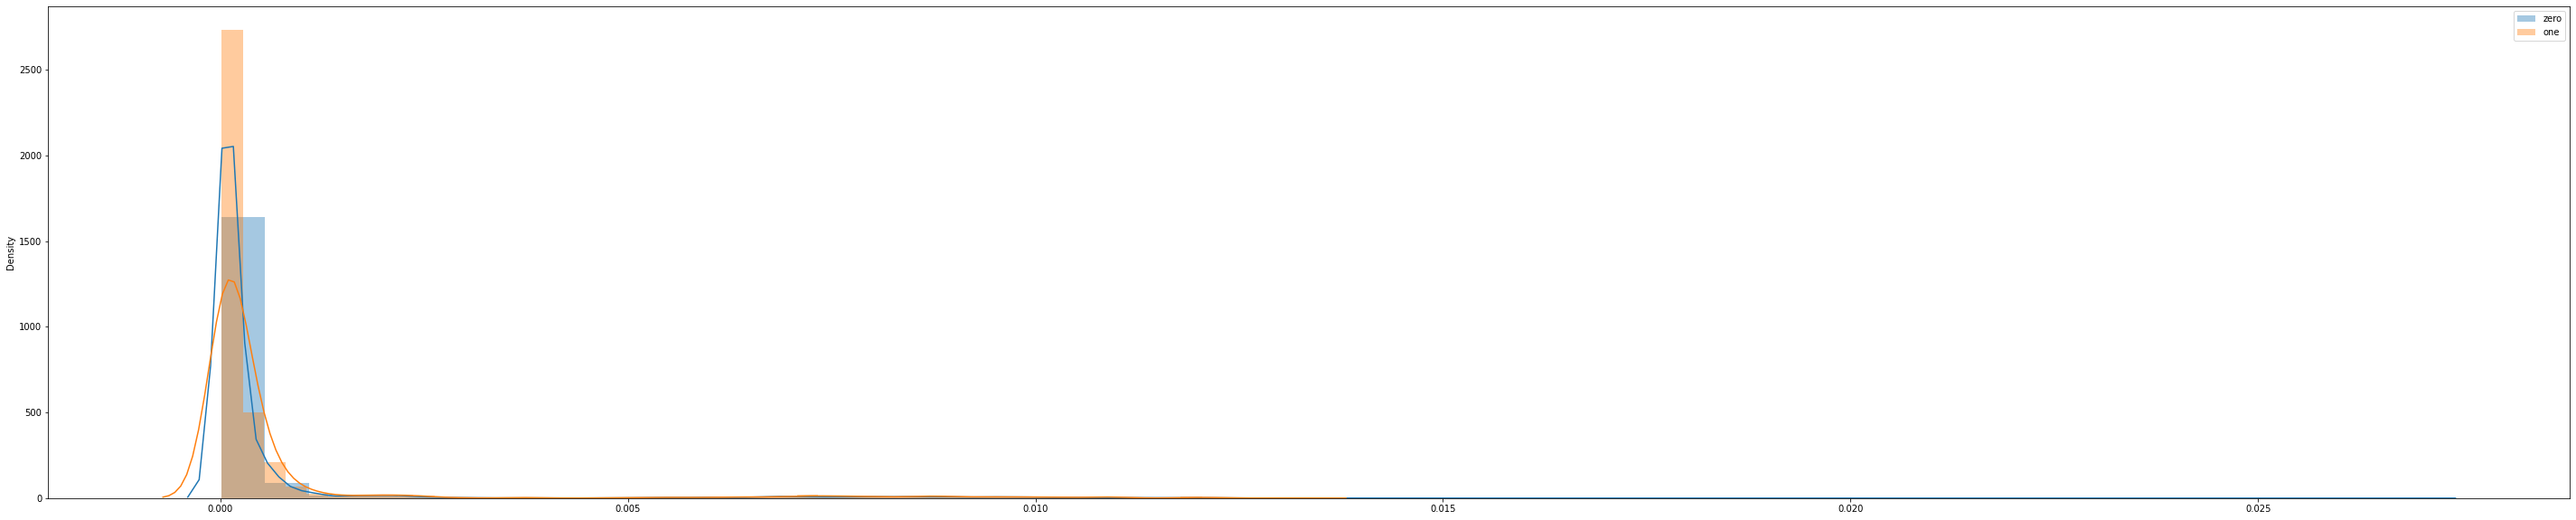

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.distplot(zero1, label='zero')
sns.distplot(one1, label='one')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


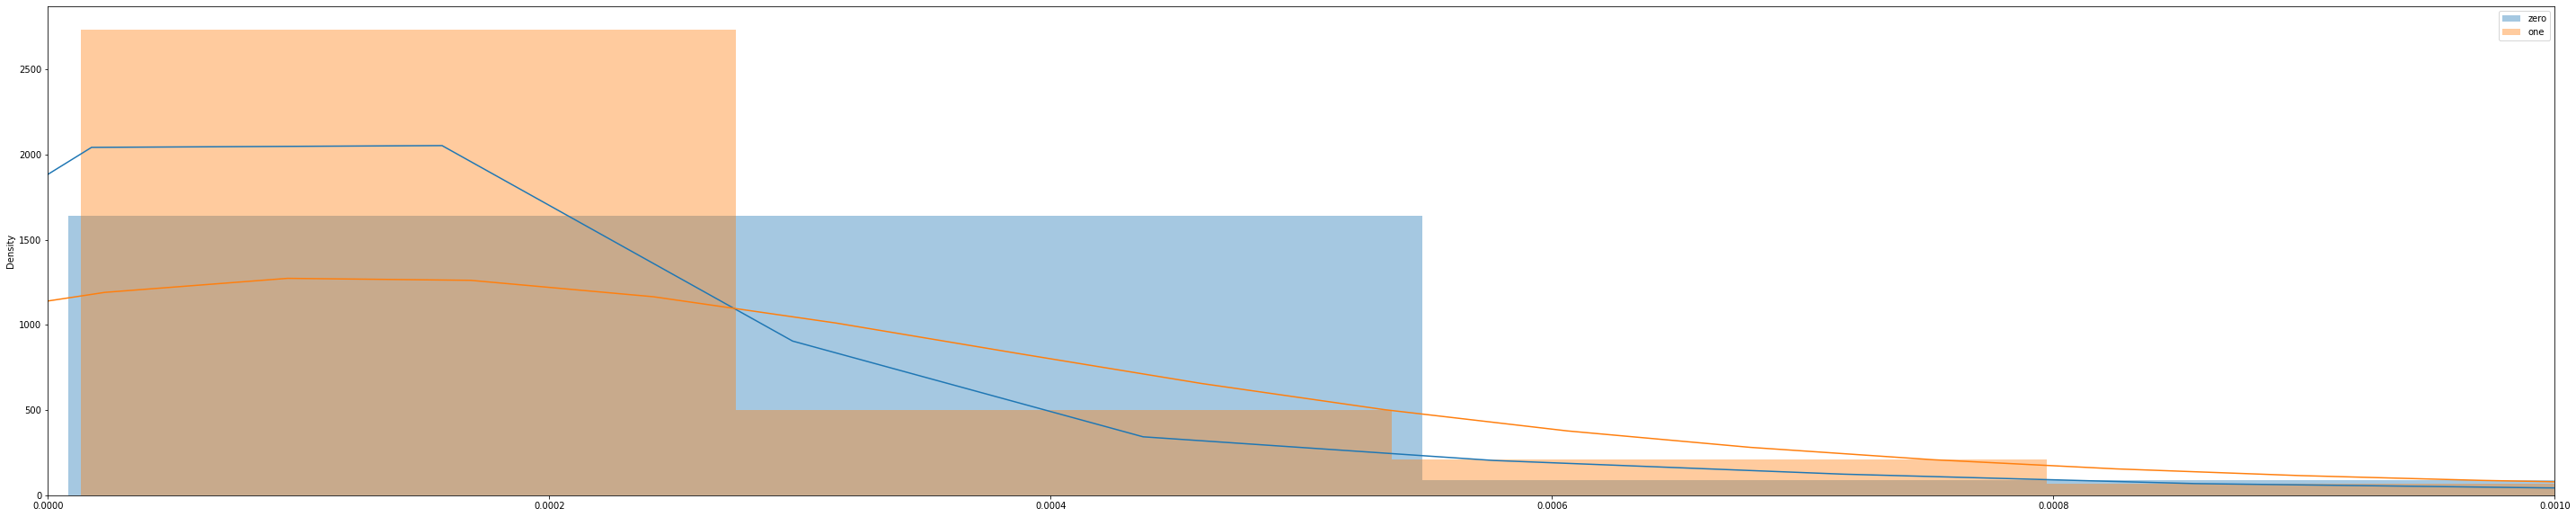

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.distplot(zero1, label='zero')
sns.distplot(one1, label='one')
plt.xlim(0, 0.001)
plt.legend()
plt.show()

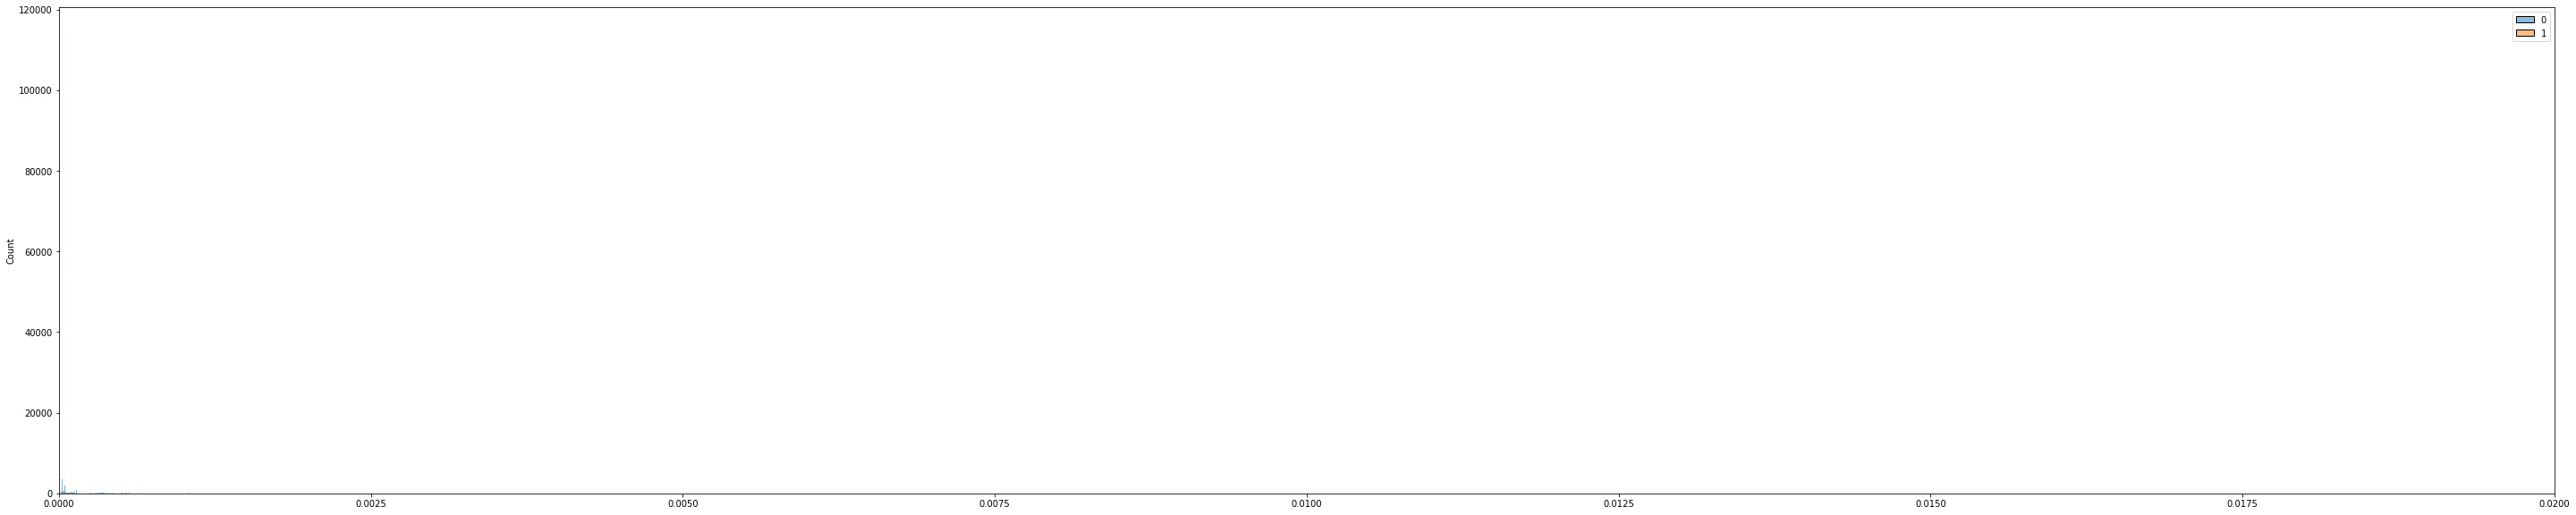

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.histplot([zero1, one1])
# plt.legend()
plt.xlim(0, 0.02)
plt.show()

#### Second threshold

In [ ]:
# code_size = 16
# model_hop_ae

# threshold
import numpy as np
threshold = np.percentile(train_loss_collection, range(85, 95))

from tqdm import tqdm
model_hop_ae.eval()

predicted_abnormal = []
predicted_normal = []
real_abnormal = []
real_normal = []
total_loss1 = []
zero1 = []
one1 = []

test_result = pd.DataFrame(columns=['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall'], index=threshold)

for th in threshold:
  # evaluation initiation
  tp = fn = fp = tn = 0
  with torch.no_grad():
    for datases in tqdm(hop_test_loader): 
      datas, labels = datases
      running_val_loss = 0 
      real_abnormal = []
      for data, label in zip(datas, labels):
        data = data.to(DEVICE)
        label = np.array(label)
        data = data.reshape(1, data.shape[0])
        encoded, decoded = model_hop_ae.forward(data)
        loss = criterion(decoded, data)
        loss = loss.item()
        # loss >= 0.001 ; predict as 'Abnormal'
        if loss >= th:
          # label == 0 ; real 'Normal'
          if label == 0: 
            fp += 1
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            tp += 1
            real_abnormal.append(loss)
          predicted_abnormal.append(loss)
        # loss < 0.001 ; predict as 'Normal'
        elif loss < th: 
          # label == 0 ; real 'Normal'
          if label == 0: 
            tn += 1
            real_normal.append(loss)
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            fn += 1
          predicted_normal.append(loss)
        total_loss1.append(loss)
        if label == 1:
          one1.append(loss)
        else:
          zero1.append(loss)
  try:
    acc = (tp+tn)/(tp+fn+fp+tn)
  except:
    pass
  try:
    precision = tp/(tp+fp)
  except:
    pass
  try:
    recall = tp/(tp+fn)
  except:
    pass
  try:
    f1 = 2*(precision*recall)/(precision+recall)
  except:
    pass

  test_result.loc[th] = [tp, fp, tn, fn, acc, f1, precision, recall]
test_result

100%|██████████| 1068/1068 [00:26<00:00, 40.23it/s]


,tp,fp,tn,fn,acc,f1,precision,recall
0.0000945,1875,19465,12167,659,0.4109934,0.1570746,0.0878632,0.7399369
0.0000945,1875,19381,12251,659,0.4134520,0.1576293,0.0882104,0.7399369
0.0000948,1875,19306,12326,659,0.4156471,0.1581278,0.0885227,0.7399369
0.0000955,1757,16910,14722,777,0.4823216,0.1657469,0.0941233,0.6933702
0.0001069,1148,8355,23277,1386,0.7148920,0.1907452,0.1208040,0.4530387
0.0001120,1132,8142,23490,1402,0.7206580,0.1917344,0.1220617,0.4467245
0.0001166,1095,7736,23896,1439,0.7314582,0.1926969,0.1239950,0.4321231
0.0001251,967,7315,24317,1567,0.7400340,0.1788092,0.1167592,0.3816101
0.0001548,921,6972,24660,1613,0.7487268,0.1766568,0.1166857,0.3634570
0.0001954,864,6647,24985,1670,0.7565709,0.1720259,0.1150313,0.3409629


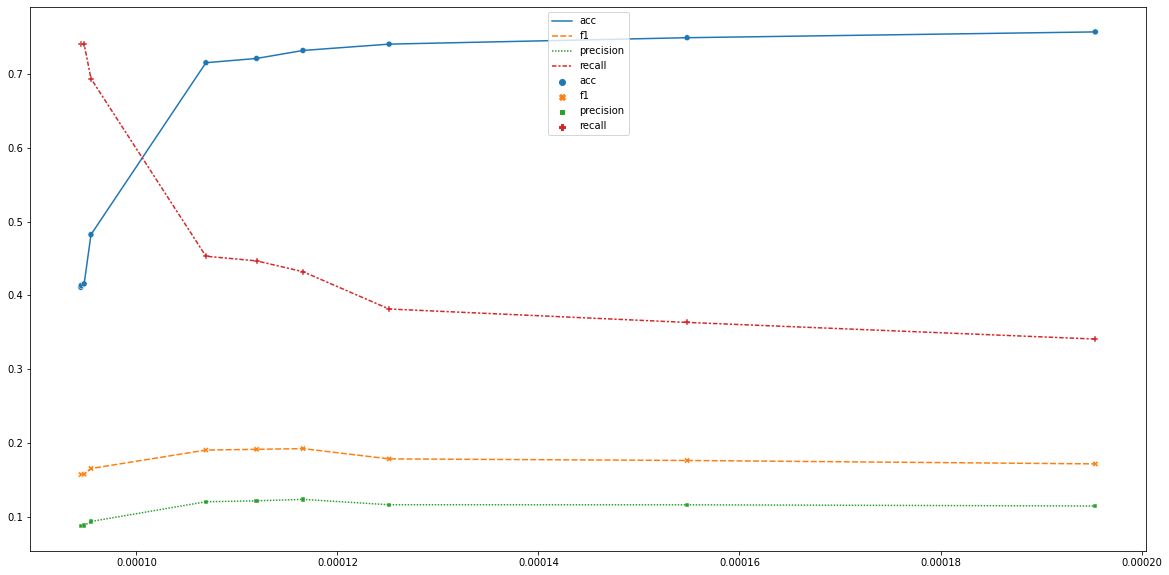

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=test_result[['acc', 'f1', 'precision', 'recall']])
sns.scatterplot(data=test_result[['acc', 'f1', 'precision', 'recall']])
plt.show()

zero max, min (0.027013245970010757,) (7.95046980783809e-06,)
one max, min (0.0130884675309062,) (1.2956832506461069e-05,)


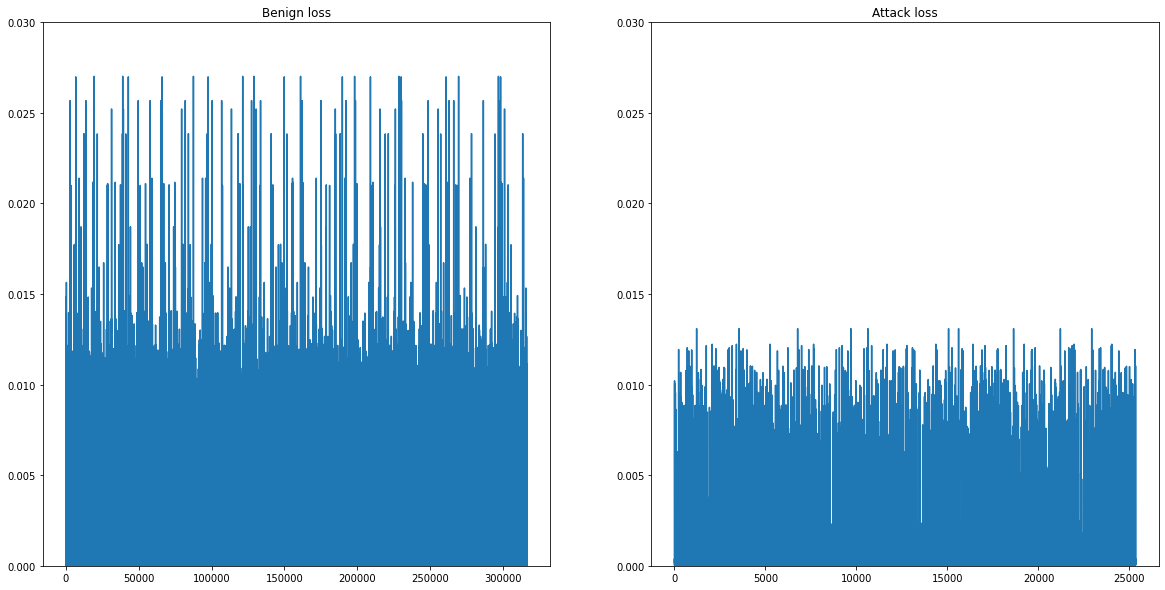

In [ ]:
zero_df = pd.DataFrame(zero1)
print('zero max, min', max(zero_df.value_counts().index), min(zero_df.value_counts().index))
one_df = pd.DataFrame(one1)
print('one max, min', max(one_df.value_counts().index), min(one_df.value_counts().index))

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].set_ylim([0, 0.03])
ax[1].set_ylim([0, 0.03])
ax[0].plot(zero_df)
ax[0].set_title('Benign loss')
ax[1].plot(one_df)
ax[1].set_title('Attack loss')
plt.show()

## Stacked AE Model - StackedAutoEncoder

In [ ]:
import tensorflow as tf
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd

# AE + stack + dropout
class StackedAutoEncoder(nn.Module):
  def __init__(self, input_dim, output_dim, code_size=2):
    super(StackedAutoEncoder, self).__init__()

    self.input_dim = input_dim
    self.output_dim = output_dim

    self.encoder = nn.Sequential(
        nn.Linear(input_dim, 64),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(64, 16),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(16, 8),
        nn.ReLU(),
        nn.Linear(8, code_size)
    )

    self.decoder = nn.Sequential(
        nn.Linear(code_size, 8),
        nn.ReLU(),
        nn.Linear(8, 16),
        nn.ReLU(),
        nn.Linear(16, 64),
        nn.ReLU(),
        nn.Linear(64, output_dim),
        nn.Sigmoid()
    )

  def forward(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded, decoded

In [ ]:
# Stacked AE setting
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_hop_stackedae = StackedAutoEncoder(input_dim=FEATURE_NUM, 
                    output_dim=FEATURE_NUM).to(DEVICE)
criterion = nn.MSELoss()
learning_rate = 0.0008
optimizer = torch.optim.Adam(model_hop_stackedae.parameters(),lr=learning_rate)
model_hop_stackedae

StackedAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=76, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=64, out_features=16, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=16, out_features=8, bias=True)
    (7): ReLU()
    (8): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=76, bias=True)
    (7): Sigmoid()
  )
)

### Train

In [ ]:
# model_hop_stackedae training
from tqdm import tqdm
train_losses = []

num_epochs = 10
for epoch in tqdm(range(num_epochs)):
  running_loss = 0
  model_hop_stackedae.train()
  for datas in hop_train_loader:
    data, _ = datas
    data = data.to(DEVICE)
    data = data.float()
    # ===================forward=====================
    encoded, decoded = model_hop_stackedae.forward(data)
    loss = criterion(decoded, data)
    # ===================backward====================
    optimizer.zero_grad()
    loss.backward()

    # Step backwards
    optimizer.step()
    running_loss += loss.item()
  train_losses.append(running_loss/len(hop_train_loader))
  # ===================log========================
  print(f'epoch [{epoch + 1}/{num_epochs}], train loss:{running_loss/len(hop_train_loader):.4f}')

 10%|█         | 1/10 [00:28<04:16, 28.47s/it]

epoch [1/10], train loss:0.0089


 20%|██        | 2/10 [01:00<04:04, 30.59s/it]

epoch [2/10], train loss:0.0017


 30%|███       | 3/10 [01:27<03:23, 29.03s/it]

epoch [3/10], train loss:0.0011


 40%|████      | 4/10 [01:59<02:59, 29.98s/it]

epoch [4/10], train loss:0.0009


 50%|█████     | 5/10 [02:25<02:23, 28.77s/it]

epoch [5/10], train loss:0.0008


 60%|██████    | 6/10 [02:52<01:52, 28.01s/it]

epoch [6/10], train loss:0.0007


 70%|███████   | 7/10 [03:18<01:22, 27.53s/it]

epoch [7/10], train loss:0.0007


 80%|████████  | 8/10 [03:45<00:54, 27.30s/it]

epoch [8/10], train loss:0.0006


 90%|█████████ | 9/10 [04:12<00:27, 27.05s/it]

epoch [9/10], train loss:0.0006


100%|██████████| 10/10 [04:38<00:00, 27.86s/it]

epoch [10/10], train loss:0.0006


In [ ]:
torch.save(model_hop_stackedae, '/content/drive/MyDrive/Colab Notebooks/DL_proj/AD-DL Proj/model/AE_code2_B32_E10_model_hop_stackedae_alldata.pt')

In [ ]:
model_hop_stackedae = torch.load('/content/drive/MyDrive/Colab Notebooks/DL_proj/AD-DL Proj/model/AE_code2_B32_E10_model_hop_stackedae_alldata.pt')

In [ ]:
# Simple AE setting
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_hop_stackedae = model_hop_stackedae.to(DEVICE)
criterion = nn.MSELoss()
learning_rate = 0.0008
optimizer = torch.optim.Adam(model_hop_stackedae.parameters(),lr=learning_rate)
model_hop_stackedae

StackedAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=76, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=64, out_features=16, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=16, out_features=8, bias=True)
    (7): ReLU()
    (8): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=76, bias=True)
    (7): Sigmoid()
  )
)

In [ ]:
# code_size = 2
# train_loss collection
from tqdm import tqdm
model_hop_stackedae.eval()

train_loss_collection = []

with torch.no_grad():
  for datases in tqdm(hop_train_loader): 
    datas, labels = datases
    for data, label in zip(datas, labels):
      data = data.to(DEVICE)
      label = np.array(label)
      data = data.reshape(1, data.shape[0])
      encoded, decoded = model_hop_stackedae.forward(data)
      loss = criterion(decoded, data)
      loss = loss.item()
      train_loss_collection.append(loss)

len(train_loss_collection)

100%|██████████| 1875/1875 [01:05<00:00, 28.76it/s]


60000

### Test

#### First Threshold

In [ ]:
import numpy as np
threshold = np.percentile(train_loss_collection, range(0, 101, 10))
threshold

array([7.39942891e-07, 2.40119100e-06, 6.44148662e-05, 6.44245643e-05,
       6.44332686e-05, 6.44405081e-05, 6.44471875e-05, 6.44568499e-05,
       1.06618190e-04, 1.55623768e-03, 4.60696965e-02])

In [ ]:
# code_size = 2
# model_hop_stackedae

# threshold
import numpy as np
threshold = np.percentile(train_loss_collection, range(0, 101, 10))

from tqdm import tqdm
model_hop_stackedae.eval()

predicted_abnormal = []
predicted_normal = []
real_abnormal = []
real_normal = []
total_loss = []
zero = []
one = []
f1_best = 0

test_result = pd.DataFrame(columns=['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall'], index=threshold)

for th in threshold:
  zero1 = []
  one1 = []
  total_loss1 = []
  # evaluation initiation
  tp = fn = fp = tn = 0
  with torch.no_grad():
    for datases in tqdm(hop_test_loader): 
      datas, labels = datases
      running_val_loss = 0 
      predicted_abnormal1 = []
      predicted_normal1 = []
      real_abnormal1 = []
      real_normal1 = []
      for data, label in zip(datas, labels):
        data = data.to(DEVICE)
        label = np.array(label)
        data = data.reshape(1, data.shape[0])
        encoded, decoded = model_hop_stackedae.forward(data)
        loss = criterion(decoded, data)
        loss = loss.item()
        # loss >= 0.001 ; predict as 'Abnormal'
        if loss >= th:
          # label == 0 ; real 'Normal'
          if label == 0: 
            fp += 1
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            tp += 1
            real_abnormal1.append(loss)
          predicted_abnormal1.append(loss)
        # loss < 0.001 ; predict as 'Normal'
        elif loss < th: 
          # label == 0 ; real 'Normal'
          if label == 0: 
            tn += 1
            real_normal1.append(loss)
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            fn += 1
          predicted_normal1.append(loss)
        total_loss1.append(loss)
        if label == 1:
          one1.append(loss)
        else:
          zero1.append(loss)
  try:
    acc = (tp+tn)/(tp+fn+fp+tn)
  except:
    acc = 'NaN'
  try:
    precision = tp/(tp+fp)
  except:
    precision = 'NaN'
  try:
    recall = tp/(tp+fn)
  except:
    recall = 'NaN'
  try:
    f1 = 2*(precision*recall)/(precision+recall)
  except:
    f1 = 'NaN'

  if f1 != 'NaN' and f1 > f1_best:
    f1_best = f1
    one = one1.copy()
    zero = zero1.copy()
    total_loss = total_loss1.copy()
    predicted_abnormal = predicted_abnormal1.copy()
    predicted_normal = predicted_normal1.copy()
    real_abnormal = real_abnormal1.copy()
    real_normal = real_normal1.copy()

  test_result.loc[th] = [tp, fp, tn, fn, acc, f1, precision, recall]
test_result

100%|██████████| 1068/1068 [00:37<00:00, 28.12it/s]


,tp,fp,tn,fn,acc,f1,precision,recall
0.0000007,2534,31632,0,0,0.0741673,0.1380926,0.0741673,1.0000000
0.0000024,2374,29717,1915,160,0.1255342,0.1371264,0.0739771,0.9368587
0.0000644,1993,26512,5120,541,0.2081894,0.1284191,0.0699176,0.7865036
0.0000644,1979,25566,6066,555,0.2354680,0.1315868,0.0718461,0.7809787
0.0000644,1973,24107,7525,561,0.2779957,0.1379045,0.0756518,0.7786109
0.0000644,1973,23260,8372,561,0.3027864,0.1421111,0.0781913,0.7786109
0.0000644,1973,23007,8625,561,0.3101914,0.1434179,0.0789832,0.7786109
0.0000645,1973,22673,8959,561,0.3199672,0.1451803,0.0800536,0.7786109
0.0001066,1239,11143,20489,1295,0.6359539,0.1661303,0.1000646,0.4889503
0.0015562,1060,7945,23687,1474,0.7243166,0.1837248,0.1177124,0.4183110


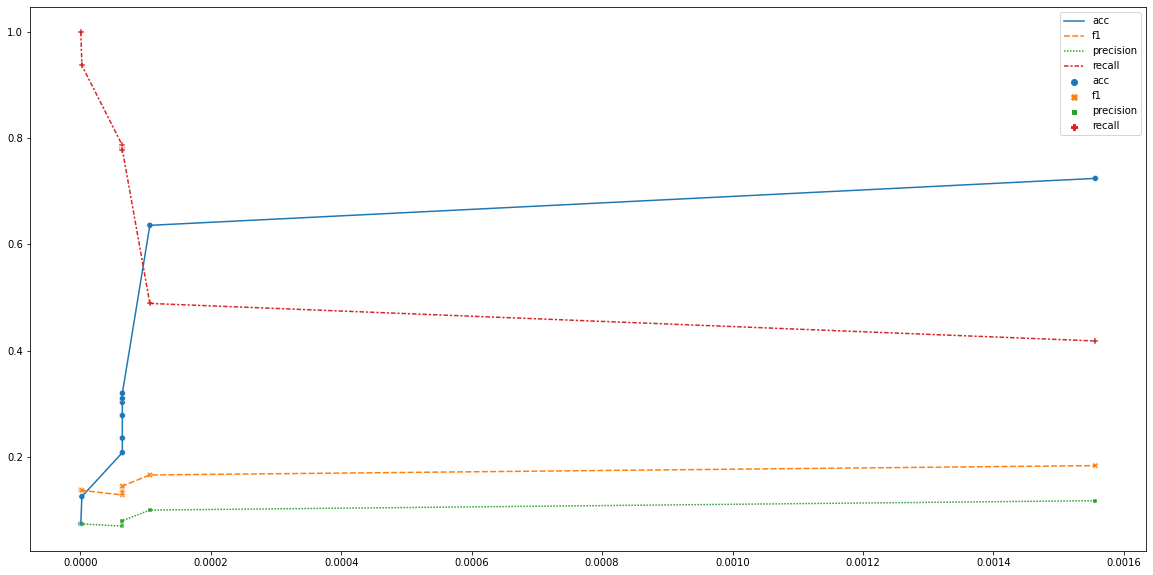

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=test_result.iloc[:-1][['acc', 'f1', 'precision', 'recall']])
sns.scatterplot(data=test_result.iloc[:-1][['acc', 'f1', 'precision', 'recall']])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


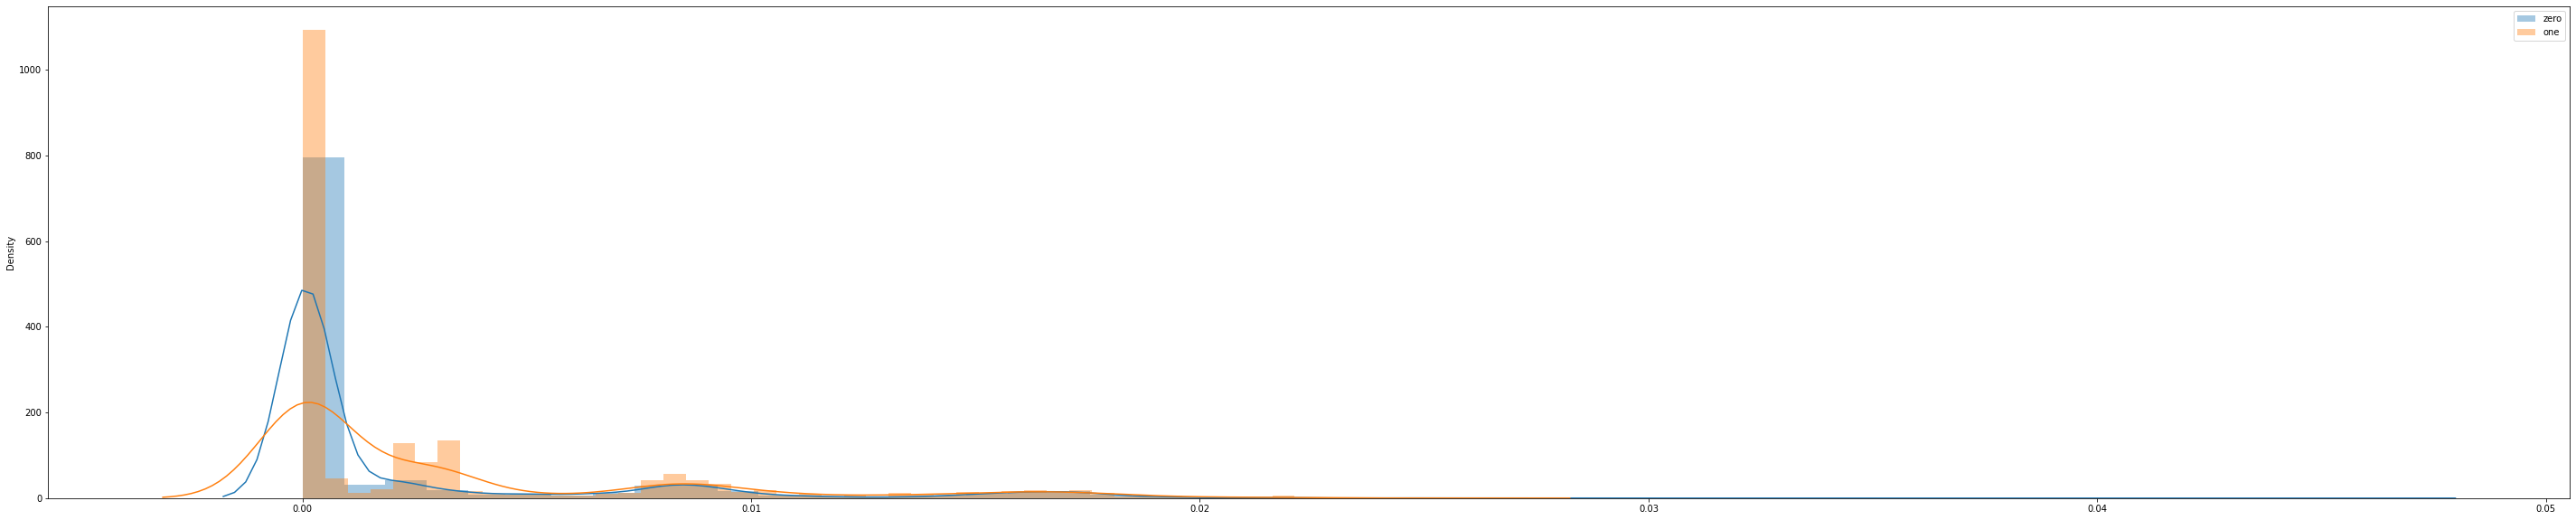

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.distplot(zero, label='zero')
sns.distplot(one, label='one')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


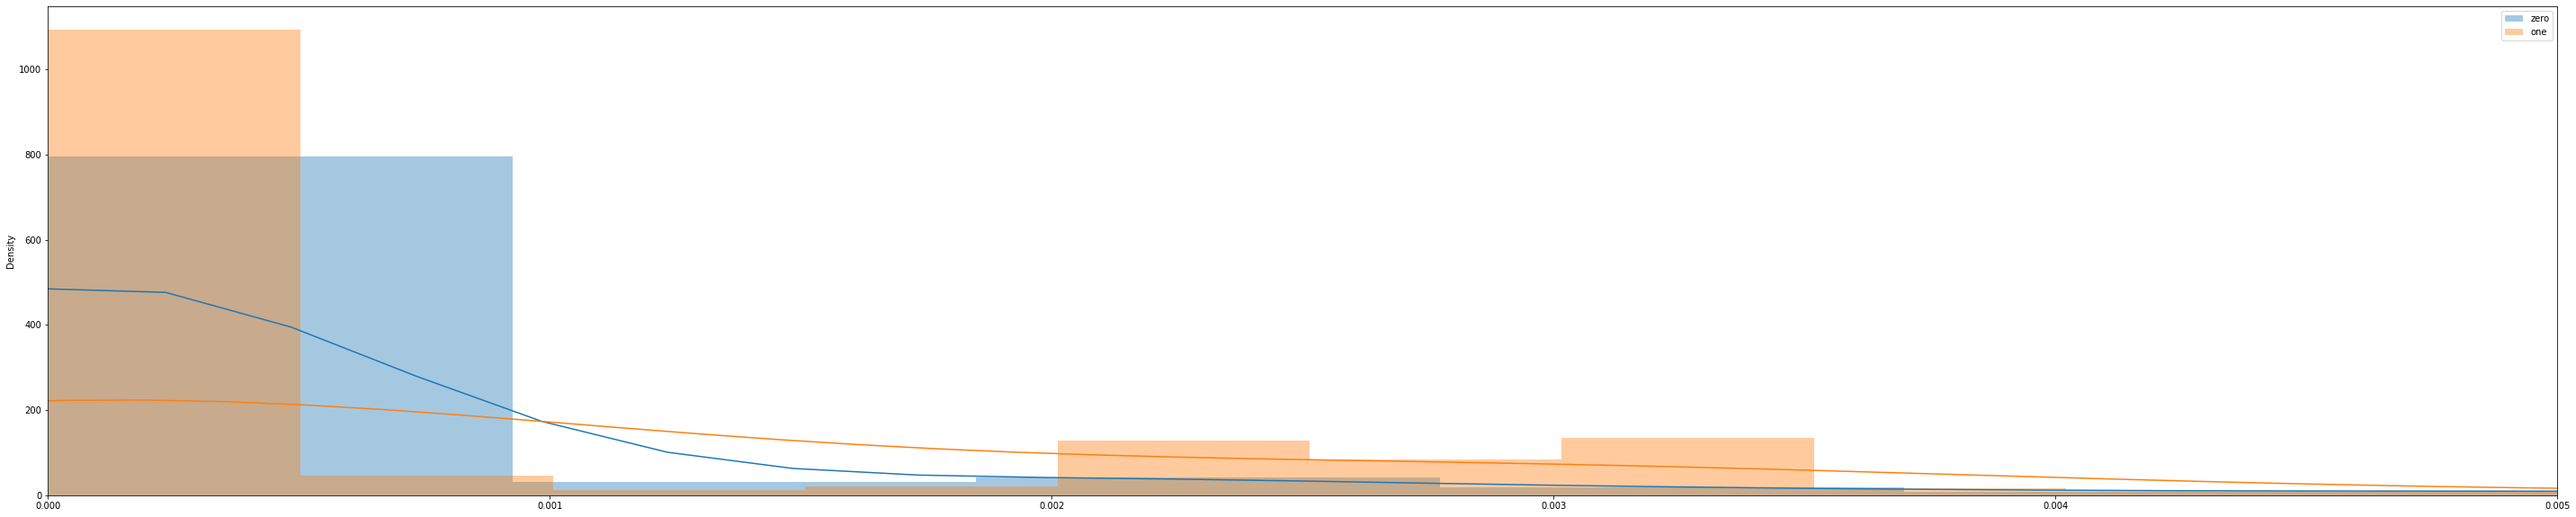

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.distplot(zero, label='zero')
sns.distplot(one, label='one')
plt.xlim(0, 0.005)
plt.legend()
plt.show()

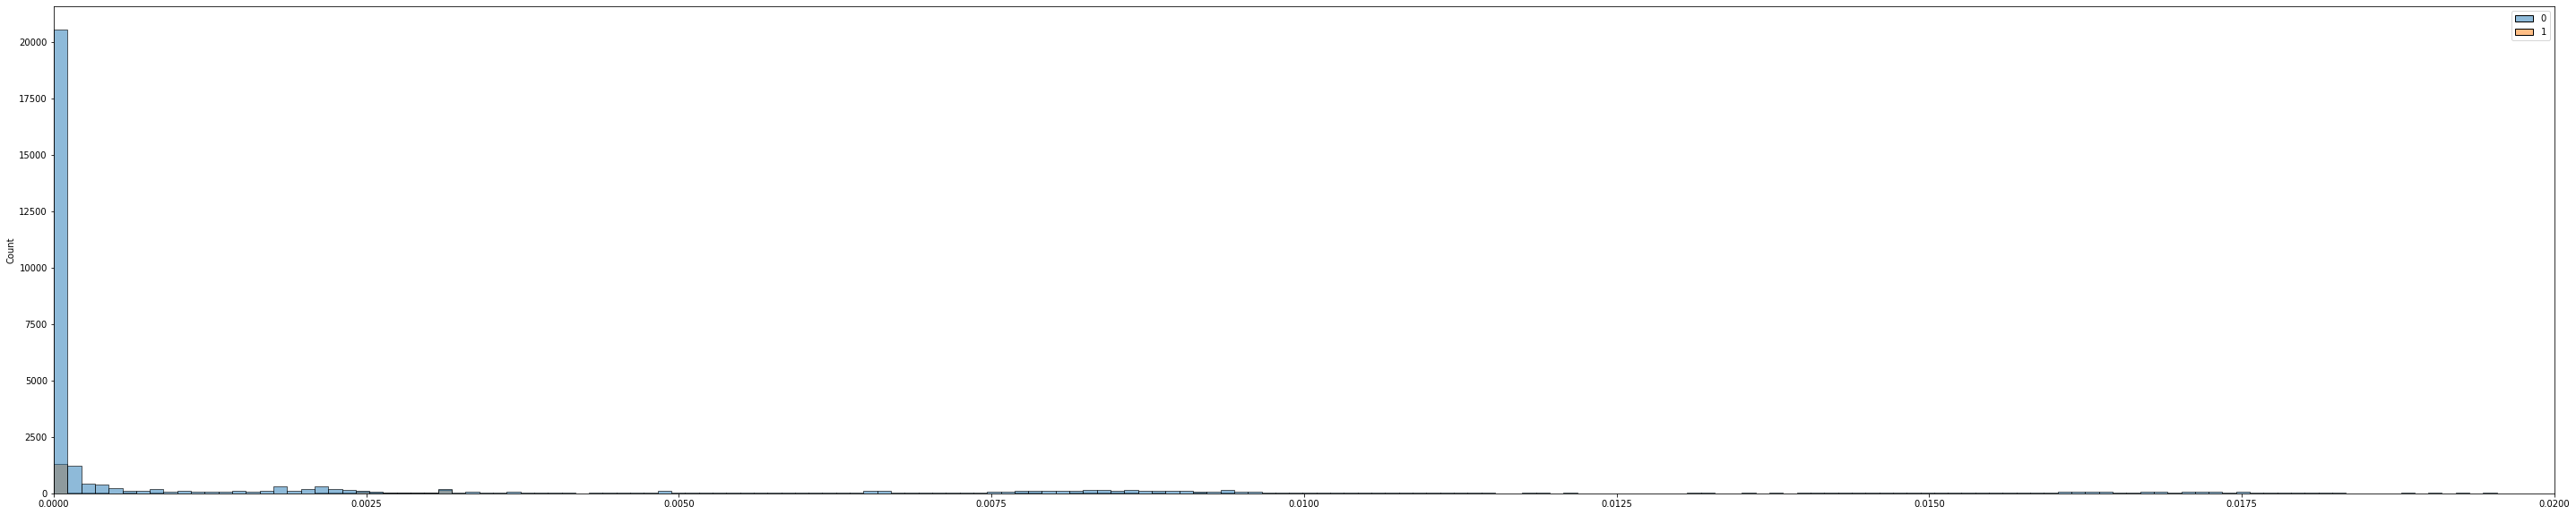

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.histplot([zero, one])
# plt.legend()
plt.xlim(0, 0.02)
plt.show()

## Stacked AE Model - StackedAutoEncoder - code=16

In [ ]:
import tensorflow as tf
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd

# AE + stack + dropout
class StackedAutoEncoder(nn.Module):
  def __init__(self, input_dim, output_dim, code_size=16):
    super(StackedAutoEncoder, self).__init__()

    self.input_dim = input_dim
    self.output_dim = output_dim

    self.encoder = nn.Sequential(
        nn.Linear(input_dim, 72),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(72, 64),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, code_size)
    )

    self.decoder = nn.Sequential(
        nn.Linear(code_size, 32),
        nn.ReLU(),
        nn.Linear(32, 64),
        nn.ReLU(),
        nn.Linear(64, 72),
        nn.ReLU(),
        nn.Linear(72, output_dim),
        nn.Sigmoid()
    )

  def forward(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded, decoded

In [ ]:
# Stacked AE setting
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_hop_stackedae_16 = StackedAutoEncoder(input_dim=FEATURE_NUM, 
                    output_dim=FEATURE_NUM).to(DEVICE)
criterion = nn.MSELoss()
learning_rate = 0.0008
optimizer = torch.optim.Adam(model_hop_stackedae_16.parameters(),lr=learning_rate)
model_hop_stackedae_16

StackedAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=76, out_features=72, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=72, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=16, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=16, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=72, bias=True)
    (5): ReLU()
    (6): Linear(in_features=72, out_features=76, bias=True)
    (7): Sigmoid()
  )
)

### Train

In [ ]:
# model_hop_stackedae training
from tqdm import tqdm
train_losses = []

num_epochs = 10
for epoch in tqdm(range(num_epochs)):
  running_loss = 0
  model_hop_stackedae_16.train()
  for datas in hop_train_loader:
    data, _ = datas
    data = data.to(DEVICE)
    data = data.float()
    # ===================forward=====================
    encoded, decoded = model_hop_stackedae_16.forward(data)
    loss = criterion(decoded, data)
    # ===================backward====================
    optimizer.zero_grad()
    loss.backward()

    # Step backwards
    optimizer.step()
    running_loss += loss.item()
  train_losses.append(running_loss/len(hop_train_loader))
  # ===================log========================
  print(f'epoch [{epoch + 1}/{num_epochs}], train loss:{running_loss/len(hop_train_loader):.4f}')

 10%|█         | 1/10 [00:23<03:28, 23.14s/it]

epoch [1/10], train loss:0.0065


 20%|██        | 2/10 [00:42<02:48, 21.12s/it]

epoch [2/10], train loss:0.0006


 30%|███       | 3/10 [01:00<02:17, 19.64s/it]

epoch [3/10], train loss:0.0004


 40%|████      | 4/10 [01:17<01:52, 18.70s/it]

epoch [4/10], train loss:0.0003


 50%|█████     | 5/10 [01:34<01:29, 17.92s/it]

epoch [5/10], train loss:0.0003


 60%|██████    | 6/10 [01:51<01:09, 17.48s/it]

epoch [6/10], train loss:0.0002


 70%|███████   | 7/10 [02:08<00:51, 17.29s/it]

epoch [7/10], train loss:0.0002


 80%|████████  | 8/10 [02:25<00:34, 17.19s/it]

epoch [8/10], train loss:0.0002


 90%|█████████ | 9/10 [02:41<00:17, 17.01s/it]

epoch [9/10], train loss:0.0002


100%|██████████| 10/10 [02:58<00:00, 17.82s/it]

epoch [10/10], train loss:0.0002


In [ ]:
torch.save(model_hop_stackedae_16, '/content/drive/MyDrive/Colab Notebooks/DL_proj/AD-DL Proj/model/AE_code16_B32_E10_model_hop_stackedae_alldata.pt')

In [ ]:
model_hop_stackedae_16 = torch.load('/content/drive/MyDrive/Colab Notebooks/DL_proj/AD-DL Proj/model/AE_code16_B32_E10_model_hop_stackedae_alldata.pt')

In [ ]:
# Simple AE setting
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_hop_stackedae_16 = model_hop_stackedae_16.to(DEVICE)
criterion = nn.MSELoss()
learning_rate = 0.0008
optimizer = torch.optim.Adam(model_hop_stackedae_16.parameters(),lr=learning_rate)
model_hop_stackedae_16

StackedAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=76, out_features=72, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=72, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=16, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=16, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=72, bias=True)
    (5): ReLU()
    (6): Linear(in_features=72, out_features=76, bias=True)
    (7): Sigmoid()
  )
)

In [ ]:
# code_size = 16
# train_loss collection
from tqdm import tqdm
model_hop_stackedae_16.eval()

train_loss_collection = []

with torch.no_grad():
  for datases in tqdm(hop_train_loader): 
    datas, labels = datases
    for data, label in zip(datas, labels):
      data = data.to(DEVICE)
      label = np.array(label)
      data = data.reshape(1, data.shape[0])
      encoded, decoded = model_hop_stackedae_16.forward(data)
      loss = criterion(decoded, data)
      loss = loss.item()
      train_loss_collection.append(loss)

len(train_loss_collection)

100%|██████████| 1875/1875 [00:47<00:00, 39.77it/s]


60000

### Test

#### First Threshold

In [ ]:
import numpy as np
threshold = np.percentile(train_loss_collection, range(0, 101, 10))
threshold

array([1.57200134e-07, 5.38929828e-07, 5.43244926e-07, 5.44805062e-07,
       5.46373008e-07, 5.47714620e-07, 5.50278594e-07, 6.12003697e-07,
       3.55440381e-05, 1.87197539e-04, 3.36101241e-02])

In [ ]:
# code_size = 16
# model_hop_stackedae_16

# threshold
import numpy as np
threshold = np.percentile(train_loss_collection, range(0, 101, 10))

from tqdm import tqdm
model_hop_stackedae_16.eval()

predicted_abnormal = []
predicted_normal = []
real_abnormal = []
real_normal = []
total_loss = []
zero = []
one = []
f1_best = 0

test_result = pd.DataFrame(columns=['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall'], index=threshold)

for th in threshold:
  zero1 = []
  one1 = []
  total_loss1 = []
  # evaluation initiation
  tp = fn = fp = tn = 0
  with torch.no_grad():
    for datases in tqdm(hop_test_loader): 
      datas, labels = datases
      running_val_loss = 0 
      predicted_abnormal1 = []
      predicted_normal1 = []
      real_abnormal1 = []
      real_normal1 = []
      for data, label in zip(datas, labels):
        data = data.to(DEVICE)
        label = np.array(label)
        data = data.reshape(1, data.shape[0])
        encoded, decoded = model_hop_stackedae_16.forward(data)
        loss = criterion(decoded, data)
        loss = loss.item()
        # loss >= 0.001 ; predict as 'Abnormal'
        if loss >= th:
          # label == 0 ; real 'Normal'
          if label == 0: 
            fp += 1
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            tp += 1
            real_abnormal1.append(loss)
          predicted_abnormal1.append(loss)
        # loss < 0.001 ; predict as 'Normal'
        elif loss < th: 
          # label == 0 ; real 'Normal'
          if label == 0: 
            tn += 1
            real_normal1.append(loss)
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            fn += 1
          predicted_normal1.append(loss)
        total_loss1.append(loss)
        if label == 1:
          one1.append(loss)
        else:
          zero1.append(loss)
  try:
    acc = (tp+tn)/(tp+fn+fp+tn)
  except:
    acc = 'NaN'
  try:
    precision = tp/(tp+fp)
  except:
    precision = 'NaN'
  try:
    recall = tp/(tp+fn)
  except:
    recall = 'NaN'
  try:
    f1 = 2*(precision*recall)/(precision+recall)
  except:
    f1 = 'NaN'

  if f1 != 'NaN' and f1 > f1_best:
    f1_best = f1
    one = one1.copy()
    zero = zero1.copy()
    total_loss = total_loss1.copy()
    predicted_abnormal = predicted_abnormal1.copy()
    predicted_normal = predicted_normal1.copy()
    real_abnormal = real_abnormal1.copy()
    real_normal = real_normal1.copy()

  test_result.loc[th] = [tp, fp, tn, fn, acc, f1, precision, recall]
test_result

100%|██████████| 1068/1068 [00:22<00:00, 46.76it/s]


,tp,fp,tn,fn,acc,f1,precision,recall
0.0000002,2534,31632,0,0,0.0741673,0.1380926,0.0741673,1.0000000
0.0000005,2437,30009,1623,97,0.1188316,0.1393368,0.0751094,0.9617206
0.0000005,2436,29465,2167,98,0.1347246,0.1414840,0.0763612,0.9613260
0.0000005,2436,29313,2319,98,0.1391734,0.1421113,0.0767268,0.9613260
0.0000005,2435,28757,2875,99,0.1554177,0.1443990,0.0780649,0.9609313
0.0000005,2435,27862,3770,99,0.1816133,0.1483354,0.0803710,0.9609313
0.0000006,2414,26202,5430,120,0.2295850,0.1549920,0.0843584,0.9526440
0.0000006,2407,25211,6421,127,0.2583855,0.1596577,0.0871533,0.9498816
0.0000355,1392,11751,19881,1142,0.6226365,0.1775850,0.1059119,0.5493291
0.0001872,1107,8427,23205,1427,0.7115846,0.1834604,0.1161108,0.4368587


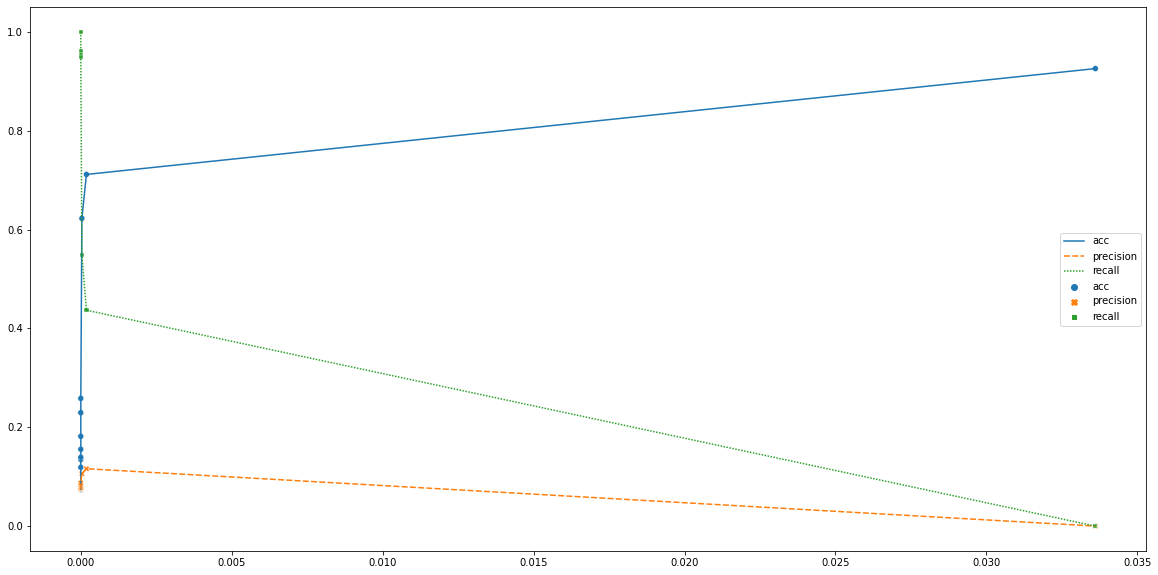

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=test_result[['acc', 'f1', 'precision', 'recall']])
sns.scatterplot(data=test_result[['acc', 'f1', 'precision', 'recall']])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


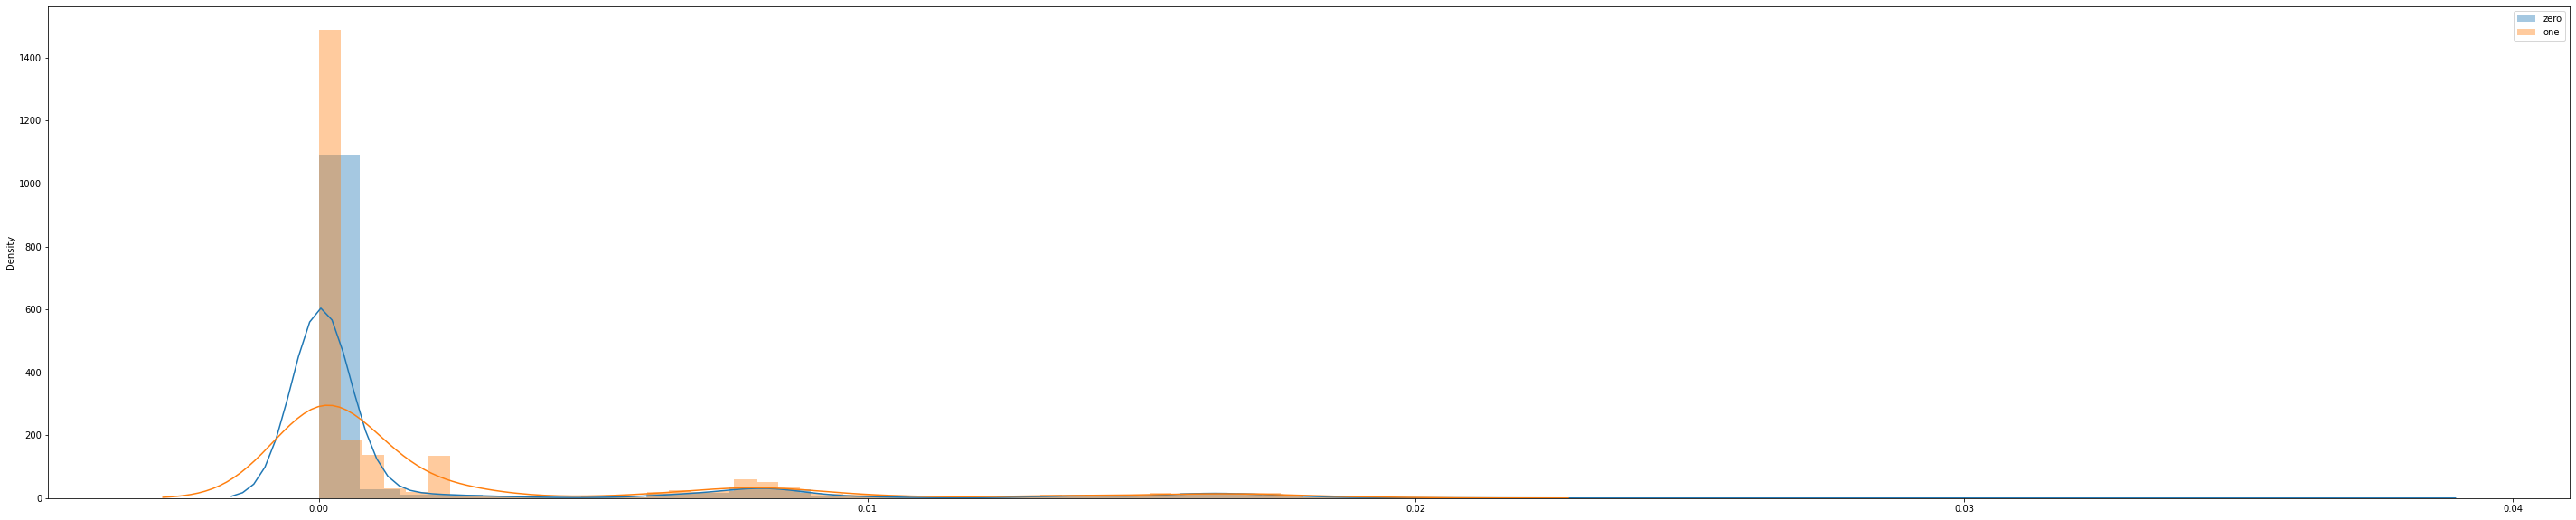

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.distplot(zero, label='zero')
sns.distplot(one, label='one')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


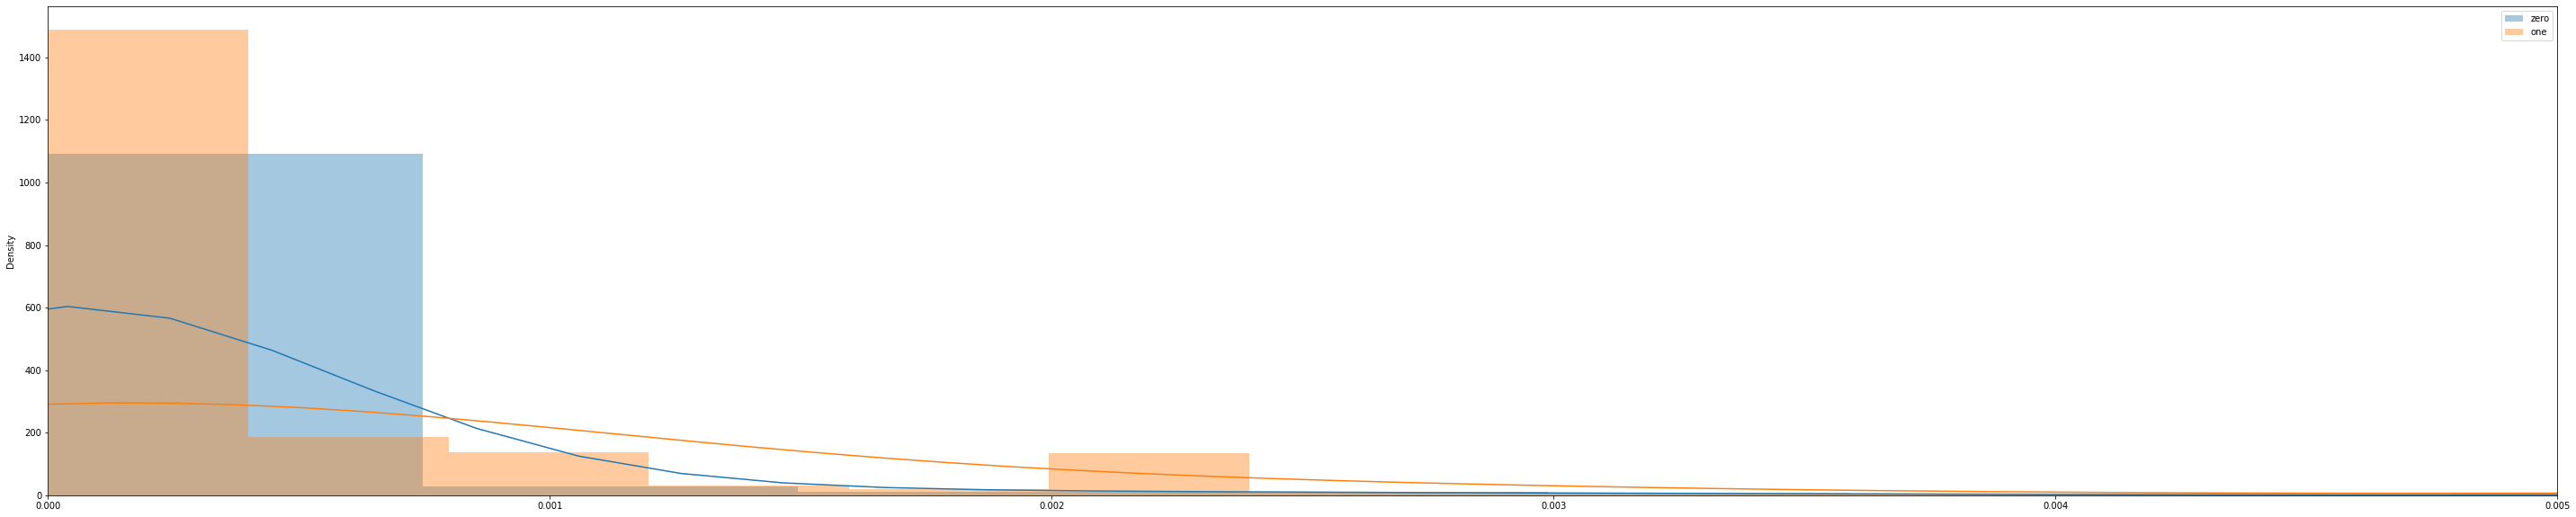

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.distplot(zero, label='zero')
sns.distplot(one, label='one')
plt.xlim(0, 0.005)
plt.legend()
plt.show()

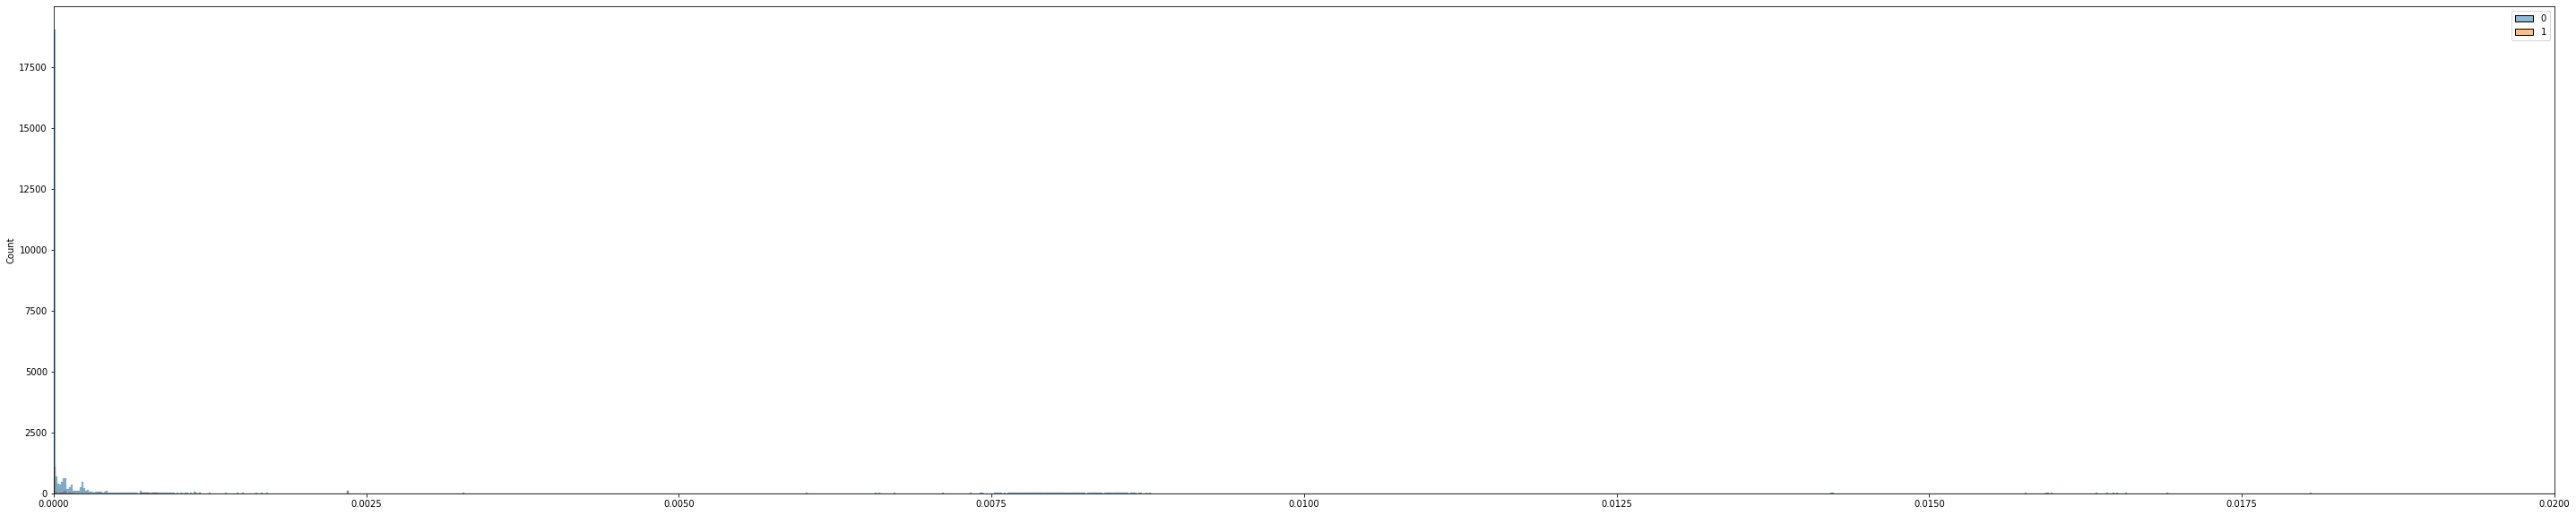

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.histplot([zero, one])
# plt.legend()
plt.xlim(0, 0.02)
plt.show()

#### Second Threshold

In [ ]:
# code_size = 16
# model_hop_stackedae_16

# threshold
import numpy as np
threshold = np.percentile(train_loss_collection, range(80, 100, 3))

from tqdm import tqdm
model_hop_stackedae_16.eval()

predicted_abnormal = []
predicted_normal = []
real_abnormal = []
real_normal = []
total_loss = []
zero = []
one = []
f1_best = 0

test_result = pd.DataFrame(columns=['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall'], index=threshold)

for th in threshold:
  zero1 = []
  one1 = []
  total_loss1 = []
  # evaluation initiation
  tp = fn = fp = tn = 0
  with torch.no_grad():
    for datases in tqdm(hop_test_loader): 
      datas, labels = datases
      running_val_loss = 0 
      predicted_abnormal1 = []
      predicted_normal1 = []
      real_abnormal1 = []
      real_normal1 = []
      for data, label in zip(datas, labels):
        data = data.to(DEVICE)
        label = np.array(label)
        data = data.reshape(1, data.shape[0])
        encoded, decoded = model_hop_stackedae_16.forward(data)
        loss = criterion(decoded, data)
        loss = loss.item()
        # loss >= 0.001 ; predict as 'Abnormal'
        if loss >= th:
          # label == 0 ; real 'Normal'
          if label == 0: 
            fp += 1
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            tp += 1
            real_abnormal1.append(loss)
          predicted_abnormal1.append(loss)
        # loss < 0.001 ; predict as 'Normal'
        elif loss < th: 
          # label == 0 ; real 'Normal'
          if label == 0: 
            tn += 1
            real_normal1.append(loss)
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            fn += 1
          predicted_normal1.append(loss)
        total_loss1.append(loss)
        if label == 1:
          one1.append(loss)
        else:
          zero1.append(loss)
  try:
    acc = (tp+tn)/(tp+fn+fp+tn)
  except:
    acc = 'NaN'
  try:
    precision = tp/(tp+fp)
  except:
    precision = 'NaN'
  try:
    recall = tp/(tp+fn)
  except:
    recall = 'NaN'
  try:
    f1 = 2*(precision*recall)/(precision+recall)
  except:
    f1 = 'NaN'

  if f1 != 'NaN' and f1 > f1_best:
    f1_best = f1
    one = one1.copy()
    zero = zero1.copy()
    total_loss = total_loss1.copy()
    predicted_abnormal = predicted_abnormal1.copy()
    predicted_normal = predicted_normal1.copy()
    real_abnormal = real_abnormal1.copy()
    real_normal = real_normal1.copy()

  test_result.loc[th] = [tp, fp, tn, fn, acc, f1, precision, recall]
test_result

100%|██████████| 1068/1068 [00:23<00:00, 46.00it/s]


,tp,fp,tn,fn,acc,f1,precision,recall
0.0000355,1392,11751,19881,1142,0.6226365,0.1775850,0.1059119,0.5493291
0.0000767,1304,10519,21113,1230,0.6561201,0.1816535,0.1102935,0.5146014
0.0001170,1161,9350,22282,1373,0.6861500,0.1779992,0.1104557,0.4581689
0.0001516,1123,8676,22956,1411,0.7047650,0.1821130,0.1146035,0.4431728
0.0002282,1093,7678,23954,1441,0.7330972,0.1933658,0.1246152,0.4313339
0.0003514,1052,6824,24808,1482,0.7568928,0.2021134,0.1335703,0.4151539
0.0009546,751,5562,26070,1783,0.7850202,0.1697751,0.1189609,0.2963694


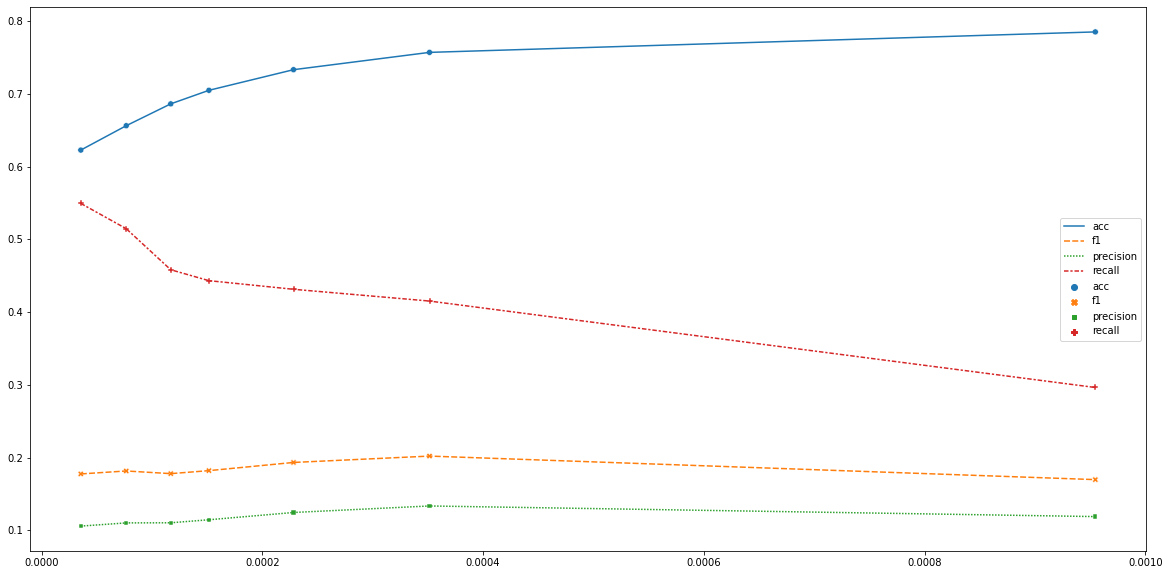

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=test_result[['acc', 'f1', 'precision', 'recall']])
sns.scatterplot(data=test_result[['acc', 'f1', 'precision', 'recall']])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


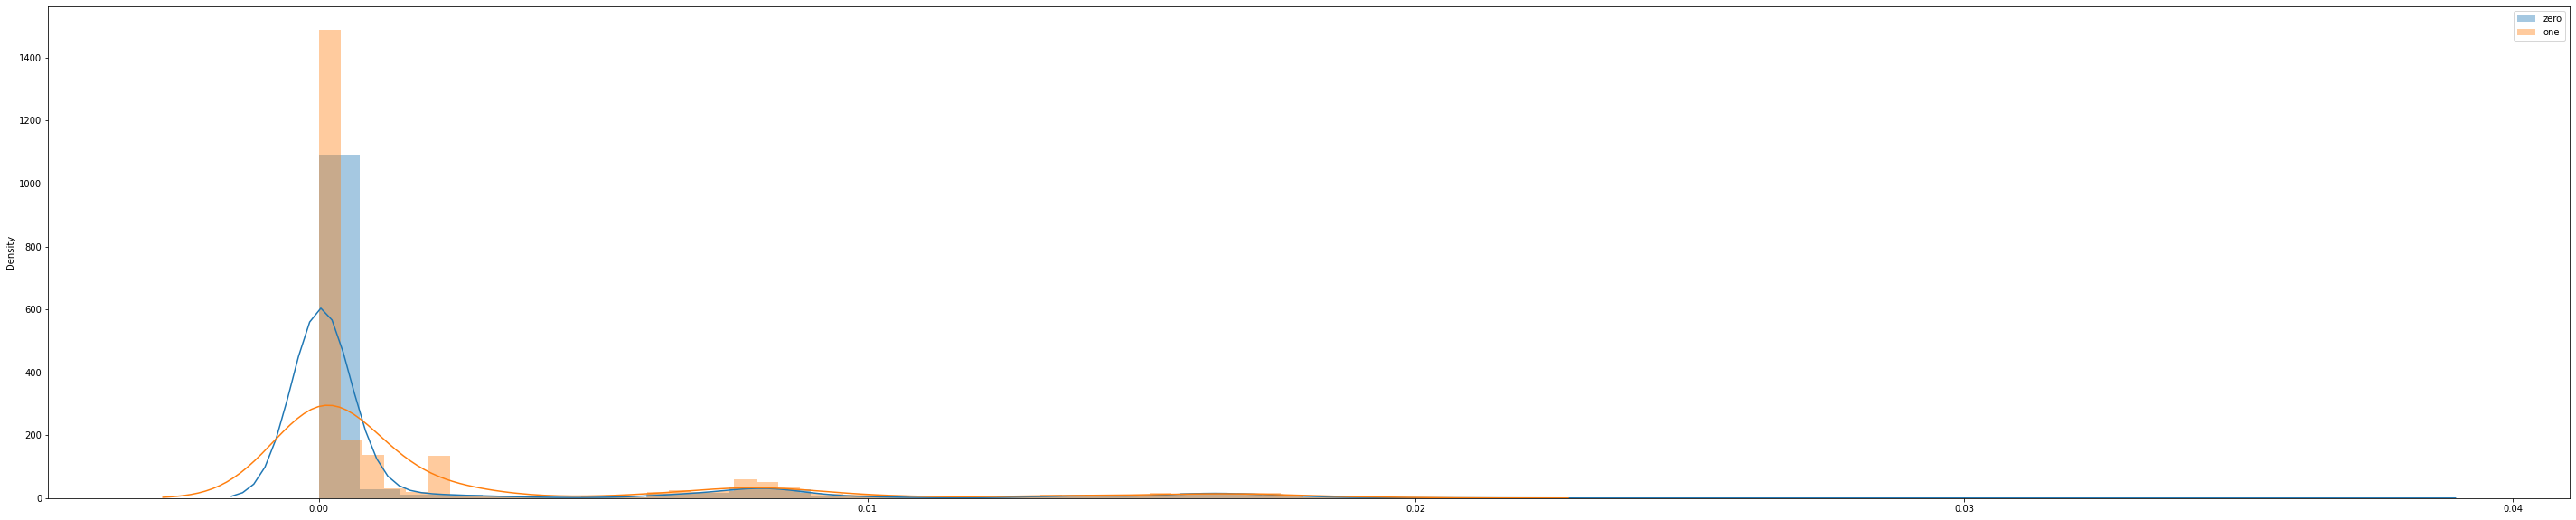

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.distplot(zero, label='zero')
sns.distplot(one, label='one')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


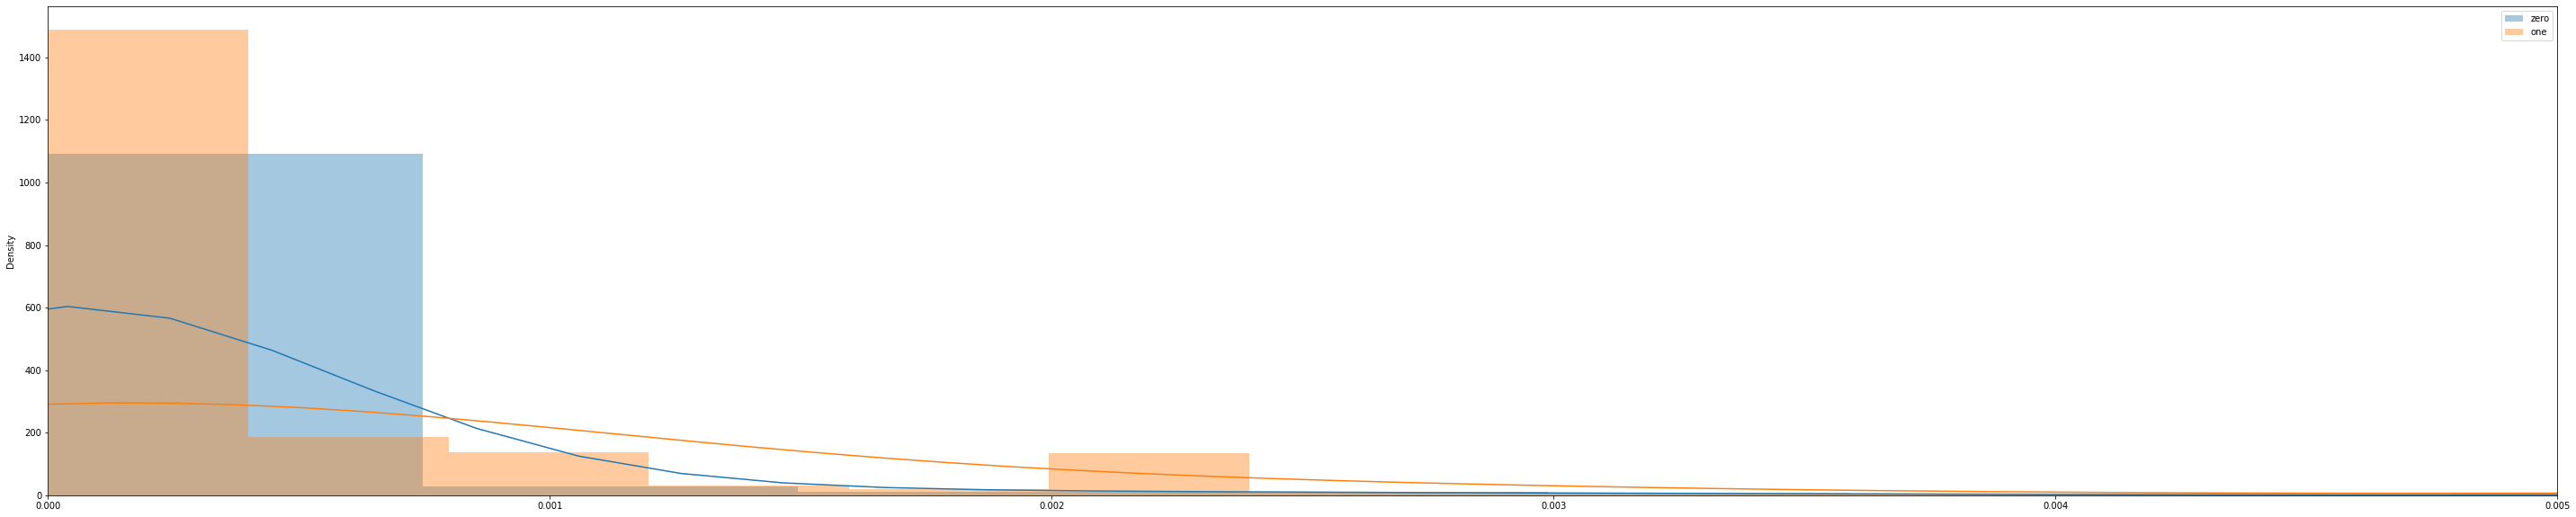

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.distplot(zero, label='zero')
sns.distplot(one, label='one')
plt.xlim(0, 0.005)
plt.legend()
plt.show()

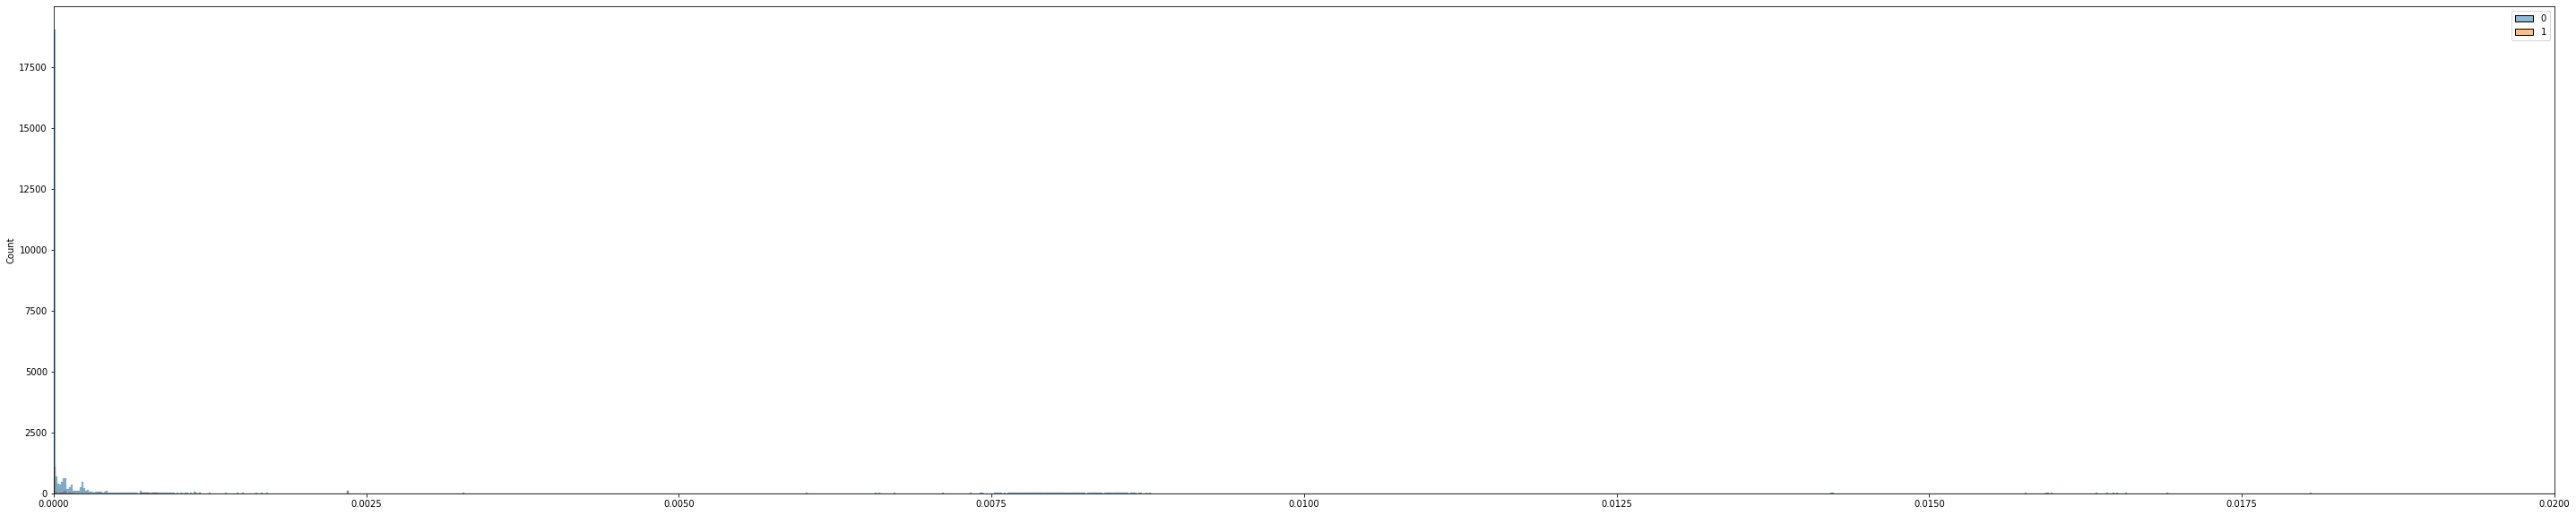

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.histplot([zero, one])
# plt.legend()
plt.xlim(0, 0.02)
plt.show()

## Denoising AE Model - DenoisingAutoEncoder

In [ ]:
import tensorflow as tf
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd

# Denoising AE : input data noising + StackedAE
class DenoisingAutoEncoder(nn.Module):
  def __init__(self, input_dim, output_dim, code_size=2):
    super(DenoisingAutoEncoder,self).__init__()

    self.input_dim = input_dim
    self.output_dim = output_dim

    self.encoder = nn.Sequential(
        nn.Linear(input_dim, 64),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(64, 16),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(16, 8),
        nn.ReLU(),
        nn.Linear(8, code_size)
    )

    self.decoder = nn.Sequential(
        nn.Linear(code_size, 8),
        nn.ReLU(),
        nn.Linear(8, 16),
        nn.ReLU(),
        nn.Linear(16, 64),
        nn.ReLU(),
        nn.Linear(64, output_dim),
        nn.Sigmoid()
    )

  def forward(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded, decoded

In [ ]:
# Stacked AE setting
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_hop_denoisingae = DenoisingAutoEncoder(input_dim=FEATURE_NUM, 
                    output_dim=FEATURE_NUM).to(DEVICE)
criterion = nn.MSELoss()
learning_rate = 0.0008
optimizer = torch.optim.Adam(model_hop_denoisingae.parameters(),lr=learning_rate)
model_hop_denoisingae

DenoisingAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=76, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=64, out_features=16, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=16, out_features=8, bias=True)
    (7): ReLU()
    (8): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=76, bias=True)
    (7): Sigmoid()
  )
)

### Train

In [ ]:
# model_hop_denoisingae training
from tqdm import tqdm
train_losses = []

# add noise (0.2)
def add_noise(data):
    # torch.randn: Returns a tensor filled with random numbers from a normal distribution with mean 0 and variance 1
    noise = torch.randn(data.size()) * 0.2
    noisy_data = data + noise
    return noisy_data

num_epochs = 10
for epoch in tqdm(range(num_epochs)):
  running_loss = 0
  model_hop_denoisingae.train()
  for datas in hop_train_loader:
    data, _ = datas
    noisy = add_noise(data)
    noisy = noisy.to(DEVICE)
    data = data.to(DEVICE)
    noisy = noisy.float()
    data = data.float()
    # ===================forward=====================
    encoded, decoded = model_hop_denoisingae.forward(noisy)
    loss = criterion(decoded, data)
    # ===================backward====================
    optimizer.zero_grad()
    loss.backward()

    # Step backwards
    optimizer.step()
    running_loss += loss.item()
  train_losses.append(running_loss/len(hop_train_loader))
  # ===================log========================
  print(f'epoch [{epoch + 1}/{num_epochs}], train loss:{running_loss/len(hop_train_loader):.4f}')

 10%|█         | 1/10 [00:26<04:02, 26.98s/it]

epoch [1/10], train loss:0.0096


 20%|██        | 2/10 [00:53<03:31, 26.48s/it]

epoch [2/10], train loss:0.0022


 30%|███       | 3/10 [01:19<03:03, 26.25s/it]

epoch [3/10], train loss:0.0015


 40%|████      | 4/10 [01:45<02:36, 26.13s/it]

epoch [4/10], train loss:0.0012


 50%|█████     | 5/10 [02:11<02:10, 26.08s/it]

epoch [5/10], train loss:0.0011


 60%|██████    | 6/10 [02:37<01:44, 26.06s/it]

epoch [6/10], train loss:0.0010


 70%|███████   | 7/10 [03:02<01:18, 26.02s/it]

epoch [7/10], train loss:0.0010


 80%|████████  | 8/10 [03:28<00:51, 25.99s/it]

epoch [8/10], train loss:0.0010


 90%|█████████ | 9/10 [03:54<00:26, 26.01s/it]

epoch [9/10], train loss:0.0009


100%|██████████| 10/10 [04:20<00:00, 26.08s/it]

epoch [10/10], train loss:0.0009


In [ ]:
torch.save(model_hop_denoisingae, '/content/drive/MyDrive/Colab Notebooks/DL_proj/AD-DL Proj/model/AE_code2_B32_E10_model_hop_denoisingae_alldata.pt')

In [ ]:
model_hop_denoisingae = torch.load('/content/drive/MyDrive/Colab Notebooks/DL_proj/AD-DL Proj/model/AE_code2_B32_E10_model_hop_denoisingae_alldata.pt')

In [ ]:
# model_hop_denoisingae setting
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_hop_denoisingae = model_hop_denoisingae.to(DEVICE)
criterion = nn.MSELoss()
learning_rate = 0.0008
optimizer = torch.optim.Adam(model_hop_denoisingae.parameters(),lr=learning_rate)
model_hop_denoisingae

DenoisingAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=76, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=64, out_features=16, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=16, out_features=8, bias=True)
    (7): ReLU()
    (8): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=76, bias=True)
    (7): Sigmoid()
  )
)

In [ ]:
# code_size = 2
# train_loss collection
from tqdm import tqdm
model_hop_denoisingae.eval()

train_loss_collection = []

with torch.no_grad():
  for datases in tqdm(hop_train_loader): 
    datas, labels = datases
    for data, label in zip(datas, labels):
      data = data.to(DEVICE)
      label = np.array(label)
      data = data.reshape(1, data.shape[0])
      encoded, decoded = model_hop_denoisingae.forward(data)
      loss = criterion(decoded, data)
      loss = loss.item()
      train_loss_collection.append(loss)

len(train_loss_collection)

100%|██████████| 1875/1875 [01:19<00:00, 23.51it/s]


60000

### Test

#### First Threshold

In [ ]:
import numpy as np
threshold = np.percentile(train_loss_collection, range(0, 101, 10))
threshold

array([7.39942891e-07, 2.40119100e-06, 6.44148662e-05, 6.44245643e-05,
       6.44332686e-05, 6.44405081e-05, 6.44471875e-05, 6.44568499e-05,
       1.06618190e-04, 1.55623768e-03, 4.60696965e-02])

In [ ]:
# code_size = 2
# model_hop_denoisingae

# threshold
import numpy as np
threshold = np.percentile(train_loss_collection, range(0, 101, 10))

from tqdm import tqdm
model_hop_denoisingae.eval()

predicted_abnormal = []
predicted_normal = []
real_abnormal = []
real_normal = []
total_loss = []
zero = []
one = []
f1_best = 0

test_result = pd.DataFrame(columns=['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall'], index=threshold)

for th in threshold:
  zero1 = []
  one1 = []
  total_loss1 = []
  # evaluation initiation
  tp = fn = fp = tn = 0
  with torch.no_grad():
    for datases in tqdm(hop_test_loader): 
      datas, labels = datases
      running_val_loss = 0 
      predicted_abnormal1 = []
      predicted_normal1 = []
      real_abnormal1 = []
      real_normal1 = []
      for data, label in zip(datas, labels):
        data = data.to(DEVICE)
        label = np.array(label)
        data = data.reshape(1, data.shape[0])
        encoded, decoded = model_hop_denoisingae.forward(data)
        loss = criterion(decoded, data)
        loss = loss.item()
        # loss >= 0.001 ; predict as 'Abnormal'
        if loss >= th:
          # label == 0 ; real 'Normal'
          if label == 0: 
            fp += 1
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            tp += 1
            real_abnormal1.append(loss)
          predicted_abnormal1.append(loss)
        # loss < 0.001 ; predict as 'Normal'
        elif loss < th: 
          # label == 0 ; real 'Normal'
          if label == 0: 
            tn += 1
            real_normal1.append(loss)
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            fn += 1
          predicted_normal1.append(loss)
        total_loss1.append(loss)
        if label == 1:
          one1.append(loss)
        else:
          zero1.append(loss)
  try:
    acc = (tp+tn)/(tp+fn+fp+tn)
  except:
    acc = 'NaN'
  try:
    precision = tp/(tp+fp)
  except:
    precision = 'NaN'
  try:
    recall = tp/(tp+fn)
  except:
    recall = 'NaN'
  try:
    f1 = 2*(precision*recall)/(precision+recall)
  except:
    f1 = 'NaN'

  if f1 != 'NaN' and f1 > f1_best:
    f1_best = f1
    one = one1.copy()
    zero = zero1.copy()
    total_loss = total_loss1.copy()
    predicted_abnormal = predicted_abnormal1.copy()
    predicted_normal = predicted_normal1.copy()
    real_abnormal = real_abnormal1.copy()
    real_normal = real_normal1.copy()

  test_result.loc[th] = [tp, fp, tn, fn, acc, f1, precision, recall]
test_result

 33%|███▎      | 351/1068 [00:12<00:26, 26.89it/s]

In [ ]:
test_result

,tp,fp,tn,fn,acc,f1,precision,recall
0.0000086,2534,31631,1,0,0.0741966,0.1380964,0.0741695,1.0000000
0.0000147,2282,29263,2369,252,0.1361295,0.1339241,0.0723411,0.9005525
0.0000305,2160,27500,4132,374,0.1841597,0.1341865,0.0728254,0.8524073
0.0000305,2160,27087,4545,374,0.1962477,0.1359303,0.0738537,0.8524073
0.0000305,2160,26934,4698,374,0.2007259,0.1365878,0.0742421,0.8524073
0.0000306,2159,26075,5557,375,0.2258386,0.1403406,0.0764681,0.8520126
0.0000306,2159,24556,7076,375,0.2702980,0.1476290,0.0808160,0.8520126
0.0000306,2139,23680,7952,395,0.2953521,0.1508835,0.0828460,0.8441200
0.0000662,1419,11391,20241,1115,0.6339636,0.1849583,0.1107728,0.5599842
0.0012110,863,7904,23728,1671,0.7197506,0.1527298,0.0984373,0.3405683


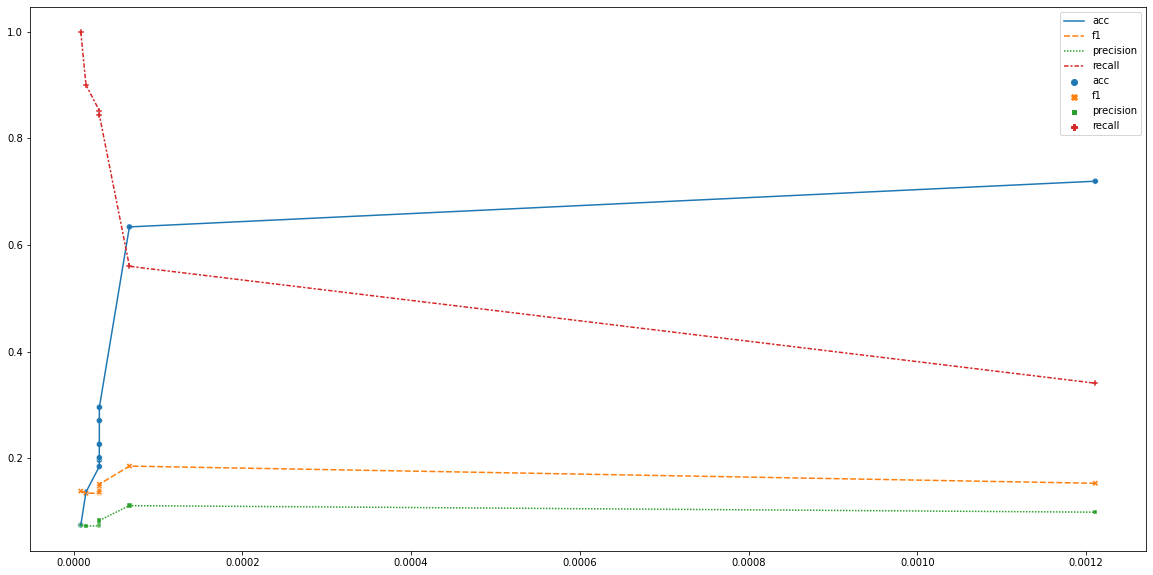

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=test_result.iloc[:-1][['acc', 'f1', 'precision', 'recall']])
sns.scatterplot(data=test_result.iloc[:-1][['acc', 'f1', 'precision', 'recall']])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.distplot(zero, label='zero')
sns.distplot(one, label='one')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.distplot(zero, label='zero')
sns.distplot(one, label='one')
plt.xlim(0, 0.005)
plt.legend()
plt.show()

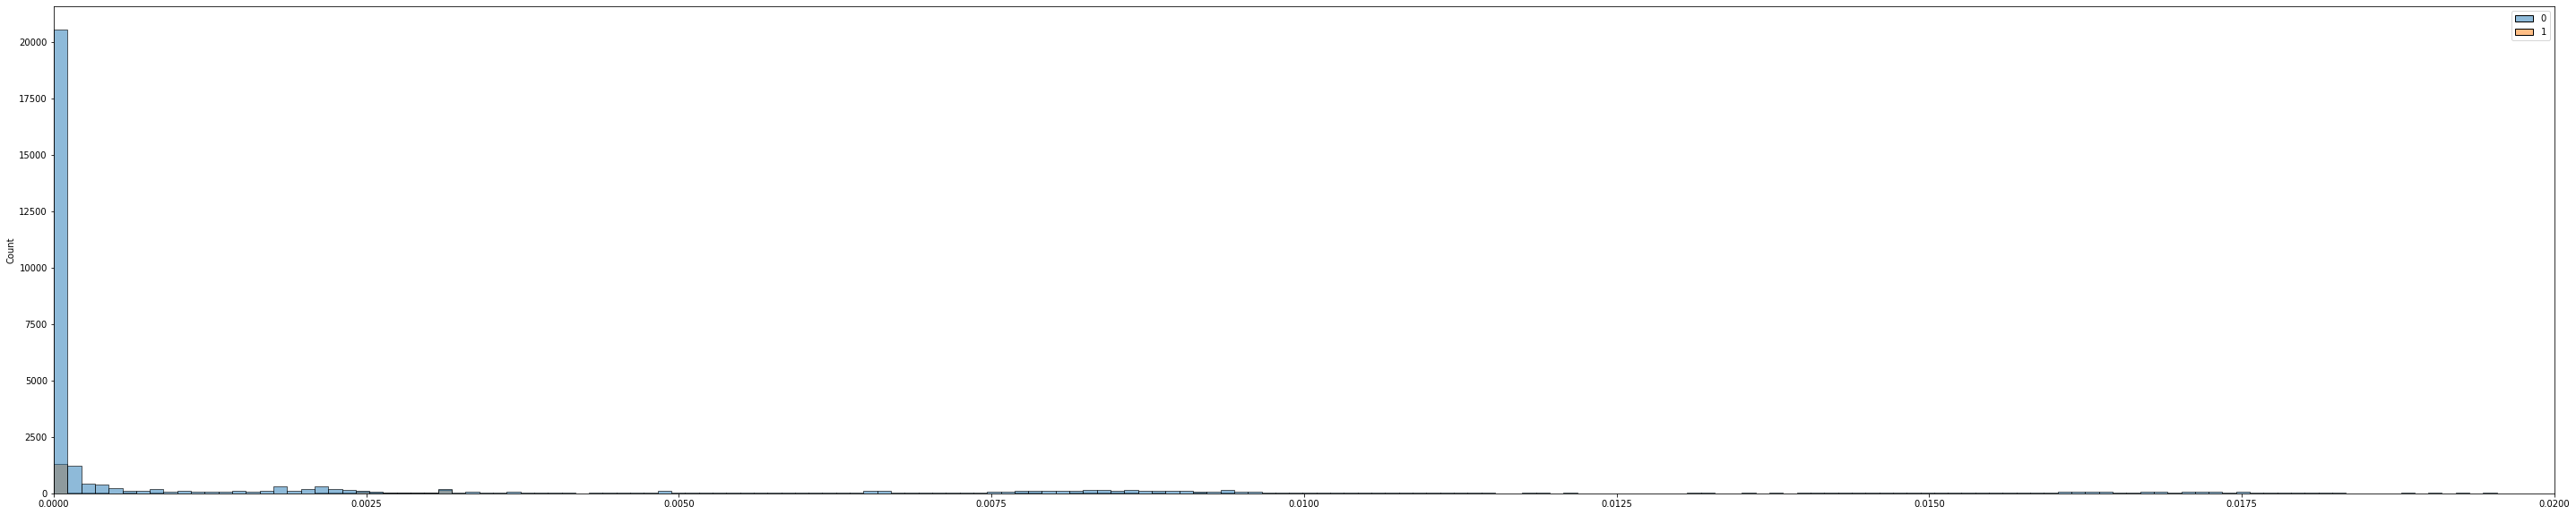

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.histplot([zero, one])
# plt.legend()
plt.xlim(0, 0.02)
plt.show()

In [ ]:
zero_df = pd.DataFrame(zero)
print('zero max, min', max(zero_df.value_counts().index), min(zero_df.value_counts().index))
one_df = pd.DataFrame(one)
print('one max, min', max(one_df.value_counts().index), min(one_df.value_counts().index))

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].set_ylim([0, 0.03])
ax[1].set_ylim([0, 0.03])
ax[0].plot(zero_df)
ax[0].set_title('Benign loss')
ax[1].plot(one_df)
ax[1].set_title('Attack loss')
plt.show()

# Feature Selection
- RandomForest, Catboost, DecisionTree, LGBM, LogisticRegression

In [ ]:
!pip install catboost
!pip install eli5

     |████████████████████████████████| 106 kB 5.1 MB/s 


## NOT SMOTE

### Data setting for ML

In [ ]:
hop.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Type
0,112641719,3,0,0,0.0000000,0,0,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0.0266331,56320860.0000000,139.3000300,56320958.0000000,56320761.0000000,112641719.0000000,56320860.0000000,139.3000300,56320958.0000000,56320761.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0.0266331,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0000000,0.0000000,0.0000000,0.0000000,56320860.0000000,139.3000300,56320958.0000000,56320761.0000000,Benign,0
1,112641466,3,0,0,0.0000000,0,0,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0.0266332,56320732.0000000,114.5513000,56320814.0000000,56320652.0000000,112641466.0000000,56320732.0000000,114.5513000,56320814.0000000,56320652.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0.0266332,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0000000,0.0000000,0.0000000,0.0000000,56320732.0000000,114.5513000,56320814.0000000,56320652.0000000,Benign,0
2,112638623,3,0,0,0.0000000,0,0,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0.0266338,56319310.0000000,301.9346000,56319525.0000000,56319098.0000000,112638623.0000000,56319310.0000000,301.9346000,56319525.0000000,56319098.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0.0266338,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0000000,0.0000000,0.0000000,0.0000000,56319310.0000000,301.9346000,56319525.0000000,56319098.0000000,Benign,0
6,112640480,3,0,0,0.0000000,0,0,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0.0266334,56320240.0000000,203.6467600,56320384.0000000,56320096.0000000,112640480.0000000,56320240.0000000,203.6467600,56320384.0000000,56320096.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0.0266334,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0000000,0.0000000,0.0000000,0.0000000,56320240.0000000,203.6467600,56320384.0000000,56320096.0000000,Benign,0
7,112641244,3,0,0,0.0000000,0,0,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0.0266332,56320624.0000000,62.2253950,56320666.0000000,56320578.0000000,112641244.0000000,56320624.0000000,62.2253950,56320666.0000000,56320578.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0.0266332,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0000000,0.0000000,0.0000000,0.0000000,56320624.0000000,62.2253950,56320666.0000000,56320578.0000000,Benign,0


In [ ]:
X = hop.drop(columns=['Label', 'Type'])
y = hop['Label']
X.shape, y.shape

((94166, 76), (94166,))

In [ ]:
y.unique()

array(['Benign', 'Brute Force -Web', 'Bot', 'Infilteration'], dtype=object)

In [ ]:
from dask_ml.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_mm = mm.fit_transform(X)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_le = le.fit_transform(y)
target = list(set(y_le))
print('labelencoding: ', target)
print('labeloriginal: ', le.inverse_transform(target))

X_mm.head()

labelencoding:  [0, 1, 2, 3]
labeloriginal:  ['Benign' 'Bot' 'Brute Force -Web' 'Infilteration']


,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.9386830,0.0012920,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000001,0.4693404,0.0000016,0.4693412,0.4693397,0.9386810,0.4693405,0.0000016,0.4693413,0.4693397,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000002,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0012920,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.4693405,0.0000018,0.4693413,0.4693397
1,0.9386809,0.0012920,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000001,0.4693394,0.0000014,0.4693400,0.4693388,0.9386789,0.4693394,0.0000014,0.4693401,0.4693388,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000002,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0012920,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.4693394,0.0000015,0.4693401,0.4693388
2,0.9386572,0.0012920,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000001,0.4693275,0.0000036,0.4693293,0.4693258,0.9386552,0.4693276,0.0000036,0.4693294,0.4693258,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000002,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0012920,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.4693276,0.0000040,0.4693294,0.4693258
6,0.9386727,0.0012920,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000001,0.4693353,0.0000024,0.4693365,0.4693341,0.9386707,0.4693353,0.0000024,0.4693365,0.4693341,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000002,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0012920,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000

In [ ]:
# train, test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mm, y_le, test_size=0.2,
                                                   random_state=13)

### ML Training and Test

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

models = []
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('CatBoostClassifier', CatBoostClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('LGBMClassifier', LGBMClassifier()))
models.append(('LogisticRegression', LogisticRegression()))
models

[('RandomForestClassifier', RandomForestClassifier()),
 ('CatBoostClassifier', <catboost.core.CatBoostClassifier at 0x7efdc8a73a50>),
 ('DecisionTreeClassifier', DecisionTreeClassifier()),
 ('LGBMClassifier', LGBMClassifier()),
 ('LogisticRegression', LogisticRegression())]

In [ ]:
model_name = []
for model, _ in models:
  model_name.append(model)
model_name

['RandomForestClassifier',
 'CatBoostClassifier',
 'DecisionTreeClassifier',
 'LGBMClassifier',
 'LogisticRegression']

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import eli5
from eli5.sklearn import PermutationImportance
from tqdm import tqdm

ML_result = pd.DataFrame(columns=['acc', 'f1', 'precision', 'recall', 'important features'], index=model_name)
trained_model = []
for name, model in tqdm(models):
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')

    perm = PermutationImportance(model, scoring='f1_micro', random_state=13).fit(X_test, y_test)
    temp = eli5.explain_weights_df(perm)
    important_cols = temp[temp['weight']>0]['feature'].map(lambda x : int(x.replace('x',''))).values
    print(important_cols)
    column = X_train.columns[important_cols].values

    ML_result.loc[name] = [acc, f1, precision, recall, column]
    trained_model.append(model)

In [ ]:
ML_result

,acc,f1,precision,recall,important features
RandomForestClassifier,0.9711692,0.9711692,0.9711692,0.9711692,"[Bwd Pkts/s, Bwd IAT Mean, Tot Bwd Pkts]"
CatBoostClassifier,0.9764787,0.9764787,0.9764787,0.9764787,"[Fwd IAT Tot, Flow Duration, Fwd IAT Min, Idle..."
DecisionTreeClassifier,0.9629925,0.9629925,0.9629925,0.9629925,"[Fwd IAT Max, Fwd IAT Tot, Flow IAT Min, Fwd I..."
LGBMClassifier,0.9738770,0.9738770,0.9738770,0.9738770,"[Idle Mean, Fwd IAT Std, Flow Duration, Idle S..."
LogisticRegression,0.9742487,0.9742487,0.9742487,0.9742487,"[Fwd IAT Tot, Bwd IAT Tot, Flow IAT Max, Fwd I..."


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings(action='ignore')

for i in range(5):
  print(f'***** MODEL : {model_name[i]}')
  y_pred = trained_model[0].predict(X_test)
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  print('-' * 50)

***** MODEL : RandomForestClassifier
[[18231     0     0   121]
 [    2    43     0     0]
 [    7     0     0     0]
 [  413     0     0    17]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18352
           1       1.00      0.96      0.98        45
           2       0.00      0.00      0.00         7
           3       0.12      0.04      0.06       430

    accuracy                           0.97     18834
   macro avg       0.53      0.50      0.51     18834
weighted avg       0.96      0.97      0.96     18834

--------------------------------------------------
***** MODEL : CatBoostClassifier
[[18231     0     0   121]
 [    2    43     0     0]
 [    7     0     0     0]
 [  413     0     0    17]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18352
           1       1.00      0.96      0.98        45
           2       0.00      0.00      0.00         7
         

In [ ]:
trained_model

[RandomForestClassifier(),
 DecisionTreeClassifier(),
 LGBMClassifier(),
 LogisticRegression()]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

y_pred = trained_model[0].predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18231     0     0   121]
 [    2    43     0     0]
 [    7     0     0     0]
 [  413     0     0    17]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18352
           1       1.00      0.96      0.98        45
           2       0.00      0.00      0.00         7
           3       0.12      0.04      0.06       430

    accuracy                           0.97     18834
   macro avg       0.53      0.50      0.51     18834
weighted avg       0.96      0.97      0.96     18834



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

y_pred = trained_model[4].predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18349     3     0     0]
 [   45     0     0     0]
 [    7     0     0     0]
 [  430     0     0     0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18352
           1       0.00      0.00      0.00        45
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00       430

    accuracy                           0.97     18834
   macro avg       0.24      0.25      0.25     18834
weighted avg       0.95      0.97      0.96     18834



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

y_pred = trained_model[2].predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18056     1     0   295]
 [    3    42     0     0]
 [    7     0     0     0]
 [  391     0     0    39]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18352
           1       0.98      0.93      0.95        45
           2       0.00      0.00      0.00         7
           3       0.12      0.09      0.10       430

    accuracy                           0.96     18834
   macro avg       0.52      0.50      0.51     18834
weighted avg       0.96      0.96      0.96     18834



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

y_pred = trained_model[1].predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18336     1     0    15]
 [    2    43     0     0]
 [    7     0     0     0]
 [  418     0     0    12]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18352
           1       0.98      0.96      0.97        45
           2       0.00      0.00      0.00         7
           3       0.44      0.03      0.05       430

    accuracy                           0.98     18834
   macro avg       0.60      0.50      0.50     18834
weighted avg       0.96      0.98      0.97     18834



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

y_pred = trained_model[3].predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18285    11    21    35]
 [    3    42     0     0]
 [    7     0     0     0]
 [  414     0     1    15]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18352
           1       0.79      0.93      0.86        45
           2       0.00      0.00      0.00         7
           3       0.30      0.03      0.06       430

    accuracy                           0.97     18834
   macro avg       0.52      0.49      0.48     18834
weighted avg       0.96      0.97      0.96     18834



## Oversamping

### Data setting for ML

In [ ]:
hop.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Type
0,112641719,3,0,0,0.0000000,0,0,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0.0266331,56320860.0000000,139.3000300,56320958.0000000,56320761.0000000,112641719.0000000,56320860.0000000,139.3000300,56320958.0000000,56320761.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0.0266331,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0000000,0.0000000,0.0000000,0.0000000,56320860.0000000,139.3000300,56320958.0000000,56320761.0000000,Benign,0
1,112641466,3,0,0,0.0000000,0,0,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0.0266332,56320732.0000000,114.5513000,56320814.0000000,56320652.0000000,112641466.0000000,56320732.0000000,114.5513000,56320814.0000000,56320652.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0.0266332,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0000000,0.0000000,0.0000000,0.0000000,56320732.0000000,114.5513000,56320814.0000000,56320652.0000000,Benign,0
2,112638623,3,0,0,0.0000000,0,0,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0.0266338,56319310.0000000,301.9346000,56319525.0000000,56319098.0000000,112638623.0000000,56319310.0000000,301.9346000,56319525.0000000,56319098.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0.0266338,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0000000,0.0000000,0.0000000,0.0000000,56319310.0000000,301.9346000,56319525.0000000,56319098.0000000,Benign,0
6,112640480,3,0,0,0.0000000,0,0,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0.0266334,56320240.0000000,203.6467600,56320384.0000000,56320096.0000000,112640480.0000000,56320240.0000000,203.6467600,56320384.0000000,56320096.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0.0266334,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0000000,0.0000000,0.0000000,0.0000000,56320240.0000000,203.6467600,56320384.0000000,56320096.0000000,Benign,0
7,112641244,3,0,0,0.0000000,0,0,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0.0266332,56320624.0000000,62.2253950,56320666.0000000,56320578.0000000,112641244.0000000,56320624.0000000,62.2253950,56320666.0000000,56320578.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0.0266332,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,0,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0000000,0.0000000,0.0000000,0.0000000,56320624.0000000,62.2253950,56320666.0000000,56320578.0000000,Benign,0


In [ ]:
X = hop.drop(columns=['Label', 'Type'])
y = hop['Label']
X.shape, y.shape

((94166, 76), (94166,))

In [ ]:
X_train.shape, y_train.shape

((75332, 76), (75332,))

### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
X_train_over.shape, y_train_over.shape, 

((293120, 76), (293120,))

In [ ]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_over, return_counts=True))

(array([0, 1, 2, 3]), array([73280,   213,    14,  1825]))
(array([0, 1, 2, 3]), array([73280, 73280, 73280, 73280]))


### ML Training and Test

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

models = []
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('CatBoostClassifier', CatBoostClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('LGBMClassifier', LGBMClassifier()))
models.append(('LogisticRegression', LogisticRegression()))
models

[('RandomForestClassifier', RandomForestClassifier()),
 ('CatBoostClassifier', <catboost.core.CatBoostClassifier at 0x7efdaf4dbe10>),
 ('DecisionTreeClassifier', DecisionTreeClassifier()),
 ('LGBMClassifier', LGBMClassifier()),
 ('LogisticRegression', LogisticRegression())]

In [ ]:
model_name = []
for model, _ in models:
  model_name.append(model)
model_name

['RandomForestClassifier',
 'CatBoostClassifier',
 'DecisionTreeClassifier',
 'LGBMClassifier',
 'LogisticRegression']

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import eli5
from eli5.sklearn import PermutationImportance
from tqdm import tqdm

ML_result = pd.DataFrame(columns=['acc', 'f1', 'precision', 'recall', 'important features'], index=model_name)
trained_model = []
for name, model in tqdm(models):
    model = model.fit(X_train_over, y_train_over)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')

    perm = PermutationImportance(model, scoring='f1_micro', random_state=13).fit(X_test, y_test)
    temp = eli5.explain_weights_df(perm)
    important_cols = temp[temp['weight']>0]['feature'].map(lambda x : int(x.replace('x',''))).values
    column = X_train.columns[important_cols].values

    ML_result.loc[name] = [acc, f1, precision, recall, column]
    trained_model.append(model)

In [ ]:
ML_result

,acc,f1,precision,recall,important features
RandomForestClassifier,0.5733248,0.5733248,0.5733248,0.5733248,[Bwd Pkts/s]
CatBoostClassifier,0.8569077,0.8569077,0.8569077,0.8569077,"[Subflow Fwd Pkts, Tot Bwd Pkts]"
DecisionTreeClassifier,0.5120527,0.5120527,0.5120527,0.5120527,"[Idle Mean, Subflow Fwd Pkts, Tot Fwd Pkts, Fl..."
LGBMClassifier,0.8390145,0.8390145,0.8390145,0.8390145,"[Active Max, Active Std, Active Mean, Bwd IAT ..."
LogisticRegression,0.1345439,0.1345439,0.1345439,0.1345439,"[Flow IAT Mean, Fwd IAT Max, Flow IAT Max, Fwd..."


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings(action='ignore')

for i in range(5):
  print(f'***** MODEL : {model_name[i]}')
  y_pred = trained_model[0].predict(X_test)
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  print('-' * 50)

***** MODEL : RandomForestClassifier
[[10538     5  5292  2517]
 [    1    44     0     0]
 [    1     0     6     0]
 [  220     0     0   210]]
              precision    recall  f1-score   support

           0       0.98      0.57      0.72     18352
           1       0.90      0.98      0.94        45
           2       0.00      0.86      0.00         7
           3       0.08      0.49      0.13       430

    accuracy                           0.57     18834
   macro avg       0.49      0.72      0.45     18834
weighted avg       0.96      0.57      0.71     18834

--------------------------------------------------
***** MODEL : CatBoostClassifier
[[10538     5  5292  2517]
 [    1    44     0     0]
 [    1     0     6     0]
 [  220     0     0   210]]
              precision    recall  f1-score   support

           0       0.98      0.57      0.72     18352
           1       0.90      0.98      0.94        45
           2       0.00      0.86      0.00         7
         

# AE with Catboost-Important-Feature

In [ ]:
catboost_col = list(ML_result.loc['CatBoostClassifier', 'important features'])
catboost_col

['Subflow Fwd Pkts', 'Tot Bwd Pkts']

In [ ]:
catboost_col = ['Subflow Fwd Pkts', 'Tot Bwd Pkts']

In [ ]:
hop_normal = hop[hop['Type']==0][catboost_col+['Label', 'Type']]
hop_abnormal = hop[hop['Type']==1][catboost_col+['Label', 'Type']]

In [ ]:
hop_normal.shape, hop_abnormal.shape

((91632, 4), (2534, 4))

In [ ]:
from dask_ml.preprocessing import MinMaxScaler
def Scaler(train_df):
  X = train_df.copy()
  X.drop(columns=['Label', 'Type'], inplace=True)
  mm = MinMaxScaler()
  mm.fit(X)
  return mm

def MinMax(df, scaler):
  X = df.drop(columns=['Label', 'Type'])
  y = df['Type']
  X_mm = scaler.transform(X)
  return X_mm, y

# tcp_normal_sample = tcp_normal.loc[tcp_normal_sample_idx, :]
# tcp_abnormal_sample = tcp_abnormal.loc[tcp_abnormal_sample_idx, :]

# udp_normal_sample = udp_normal.loc[udp_normal_sample_idx, :]
# udp_abnormal_sample = udp_abnormal.loc[udp_abnormal_sample_idx, :]

hop_normal_sample = hop_normal
hop_abnormal_sample = hop_abnormal

# Columns transform
# tcp_mm = Scaler(tcp_normal_sample)
# udp_mm = Scaler(udp_normal_sample)
hop_mm = Scaler(hop_normal_sample)

# X_tcp_normal_mm, y_tcp_normal = MinMax(tcp_normal_sample, tcp_mm)
# X_udp_normal_mm, y_udp_normal = MinMax(udp_normal_sample, udp_mm)
X_hop_normal_mm, y_hop_normal = MinMax(hop_normal_sample, hop_mm)

# X_tcp_abnormal_mm, y_tcp_abnormal = MinMax(tcp_abnormal_sample, tcp_mm)
# X_udp_abnormal_mm, y_udp_abnormal = MinMax(udp_abnormal_sample, udp_mm)
X_hop_abnormal_mm, y_hop_abnormal = MinMax(hop_abnormal_sample, hop_mm)

In [ ]:
# X_tcp_normal_mm_train = X_tcp_normal_mm[:60000]
# X_udp_normal_mm_train = X_udp_normal_mm[:60000]
X_hop_normal_mm_train = X_hop_normal_mm[:60000]
# X_tcp_normal_mm_test = X_tcp_normal_mm[60000:]
# X_udp_normal_mm_test = X_udp_normal_mm[60000:]
X_hop_normal_mm_test = X_hop_normal_mm[60000:]
# y_tcp_normal_train = y_tcp_normal[:60000]
# y_udp_normal_train = y_udp_normal[:60000]
y_hop_normal_train = y_hop_normal[:60000]
# y_tcp_normal_test = y_tcp_normal[60000:]
# y_udp_normal_test = y_udp_normal[60000:]
y_hop_normal_test = y_hop_normal[60000:]

In [ ]:
from torch.utils.data import Dataset

# reset_index
def get_new_idx(data):
  data = data.reset_index().drop('index',axis=1)
  return data

# customize dataset
class CustomDataset(Dataset):
  def __init__(self, feature, label):
    self.feature = feature
    # idx = self.feature.index
    self.label = label

  def __len__(self):
    return len(self.feature)

  def __getitem__(self, index) : 
    feature = torch.from_numpy(self.feature.loc[index].values).float()
    label = torch.from_numpy(self.label.loc[index].values).float()
    
    return feature, label

In [ ]:
from torch.utils.data import DataLoader

# tcp_test_raw = pd.concat([X_tcp_abnormal_mm, X_tcp_normal_mm_test])
# udp_test_raw = pd.concat([X_udp_abnormal_mm, X_udp_normal_mm_test])
hop_test_raw = pd.concat([X_hop_abnormal_mm, X_hop_normal_mm_test])

# tcp_label_raw = pd.concat([y_tcp_abnormal, y_tcp_normal_test])
# udp_label_raw = pd.concat([y_udp_abnormal, y_udp_normal_test])
hop_label_raw = pd.concat([y_hop_abnormal, y_hop_normal_test])

# tcp_train = get_new_idx(X_tcp_normal_mm_train)
# udp_train = get_new_idx(X_udp_normal_mm_train)
hop_train = get_new_idx(X_hop_normal_mm_train)
# tcp_test = get_new_idx(tcp_test_raw)
# udp_test = get_new_idx(udp_test_raw)
hop_test = get_new_idx(hop_test_raw)

# tcp_label_train = get_new_idx(y_tcp_normal_train)
# udp_label_train = get_new_idx(y_udp_normal_train)
hop_label_train = get_new_idx(y_hop_normal_train)
# tcp_label_test = get_new_idx(tcp_label_raw)
# udp_label_test = get_new_idx(udp_label_raw)
hop_label_test = get_new_idx(hop_label_raw)

# to_tensor and dataloader
BATCH_SIZE = 32
# tcp_train_loader = DataLoader(CustomDataset(tcp_train, tcp_label_train), BATCH_SIZE, shuffle=True)
# udp_train_loader = DataLoader(CustomDataset(udp_train, udp_label_train), BATCH_SIZE, shuffle=True)
hop_train_loader = DataLoader(CustomDataset(hop_train, hop_label_train), BATCH_SIZE, shuffle=True)
# test_loader1 = DataLoader(CustomDataset(tcp_test, tcp_label_test), BATCH_SIZE, shuffle=True)
# test_loader2 = DataLoader(CustomDataset(udp_test, udp_label_test), BATCH_SIZE, shuffle=True)
hop_test_loader = DataLoader(CustomDataset(hop_test, hop_label_test), BATCH_SIZE, shuffle=True)

In [ ]:
import torch
for data in hop_train_loader:
  BATCH_SIZE, FEATURE_NUM = data[0].shape
  break

print(BATCH_SIZE, FEATURE_NUM)

32 2


## Base AE Model - AutoEncoder

In [ ]:
import tensorflow as tf
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd

# AutoEncoder
class AutoEncoder(nn.Module):
  def __init__(self, input_dim, output_dim, code_size=2):
    super(AutoEncoder, self).__init__()

    self.input_dim = input_dim
    self.output_dim = output_dim

    self.encoder = nn.Sequential(
        nn.Linear(input_dim, 16),
        nn.Linear(16, code_size),
        nn.BatchNorm1d(2),
        nn.ReLU(),
    )

    self.decoder = nn.Sequential(
        nn.Linear(code_size, 16),
        nn.Linear(16, output_dim),
        nn.Sigmoid()
    )

  def forward(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded, decoded

In [ ]:
# Base AE with cat setting
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_hop_ae_cat = AutoEncoder(input_dim=FEATURE_NUM, 
                    output_dim=FEATURE_NUM).to(DEVICE)
criterion = nn.MSELoss()
learning_rate = 0.0008
optimizer = torch.optim.Adam(model_hop_ae_cat.parameters(),lr=learning_rate)
model_hop_ae_cat

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): Linear(in_features=16, out_features=2, bias=True)
    (2): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): Linear(in_features=16, out_features=2, bias=True)
    (2): Sigmoid()
  )
)

### Train

In [ ]:
# model_hop_ae_cat training
from tqdm import tqdm
train_losses = []

num_epochs = 10
for epoch in tqdm(range(num_epochs)):
  running_loss = 0
  model_hop_ae_cat.train()
  for datas in hop_train_loader:
    data, _ = datas
    data = data.to(DEVICE)
    data = data.float()
    # ===================forward=====================
    encoded, decoded = model_hop_ae_cat.forward(data)
    loss = criterion(decoded, data)
    # ===================backward====================
    optimizer.zero_grad()
    loss.backward()

    # Step backwards
    optimizer.step()
    running_loss += loss.item()
  train_losses.append(running_loss/len(hop_train_loader))
  # ===================log========================
  print(f'epoch [{epoch + 1}/{num_epochs}], train loss:{running_loss/len(hop_train_loader):.4f}')

 10%|█         | 1/10 [00:28<04:18, 28.72s/it]

epoch [1/10], train loss:0.0178


 20%|██        | 2/10 [00:55<03:42, 27.87s/it]

epoch [2/10], train loss:0.0004


 30%|███       | 3/10 [01:22<03:09, 27.07s/it]

epoch [3/10], train loss:0.0003


 40%|████      | 4/10 [01:46<02:35, 25.85s/it]

epoch [4/10], train loss:0.0002


 50%|█████     | 5/10 [02:10<02:06, 25.21s/it]

epoch [5/10], train loss:0.0002


 60%|██████    | 6/10 [02:34<01:39, 24.96s/it]

epoch [6/10], train loss:0.0002


 70%|███████   | 7/10 [02:58<01:13, 24.56s/it]

epoch [7/10], train loss:0.0001


 80%|████████  | 8/10 [03:22<00:48, 24.29s/it]

epoch [8/10], train loss:0.0001


 90%|█████████ | 9/10 [03:45<00:24, 24.10s/it]

epoch [9/10], train loss:0.0001


100%|██████████| 10/10 [04:09<00:00, 24.94s/it]

epoch [10/10], train loss:0.0001


In [ ]:
torch.save(model_hop_ae_cat, '/content/drive/MyDrive/Colab Notebooks/DL_proj/AD-DL Proj/model/AE_code2_B32_E10_model_hop_ae_cat_alldata.pt')

In [ ]:
model_hop_ae_cat = torch.load('/content/drive/MyDrive/Colab Notebooks/DL_proj/AD-DL Proj/model/AE_code2_B32_E10_model_hop_ae_cat_alldata.pt')

In [ ]:
# Simple AE setting
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_hop_ae_cat = model_hop_ae_cat.to(DEVICE)
criterion = nn.MSELoss()
learning_rate = 0.0008
optimizer = torch.optim.Adam(model_hop_ae_cat.parameters(),lr=learning_rate)
model_hop_ae_cat

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): Linear(in_features=16, out_features=2, bias=True)
    (2): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): Linear(in_features=16, out_features=2, bias=True)
    (2): Sigmoid()
  )
)

In [ ]:
# code_size = 2
# train_loss collection
from tqdm import tqdm
model_hop_ae_cat.eval()

train_loss_collection = []

with torch.no_grad():
  for datases in tqdm(hop_train_loader): 
    datas, labels = datases
    for data, label in zip(datas, labels):
      data = data.to(DEVICE)
      label = np.array(label)
      data = data.reshape(1, data.shape[0])
      encoded, decoded = model_hop_ae_cat.forward(data)
      loss = criterion(decoded, data)
      loss = loss.item()
      train_loss_collection.append(loss)

len(train_loss_collection)

100%|██████████| 1875/1875 [00:38<00:00, 48.69it/s]


60000

### Test

#### First Threshold

In [ ]:
import numpy as np
threshold = np.percentile(train_loss_collection, range(0, 101, 10))
threshold

array([5.90194666e-08, 5.40338476e-07, 2.30339197e-06, 2.30339197e-06,
       2.30339197e-06, 2.30339197e-06, 2.30339197e-06, 2.30339197e-06,
       3.67843131e-06, 2.55761443e-05, 2.68875748e-01])

In [ ]:
# code_size = 2
# model_hop_ae_cat

# threshold
import numpy as np
threshold = list(set(np.percentile(train_loss_collection, range(0, 101, 10))))

from tqdm import tqdm
model_hop_ae_cat.eval()

predicted_abnormal = []
predicted_normal = []
real_abnormal = []
real_normal = []
total_loss = []
zero = []
one = []
f1_best = 0

test_result = pd.DataFrame(columns=['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall'], index=threshold)

for th in threshold:
  zero1 = []
  one1 = []
  total_loss1 = []
  # evaluation initiation
  tp = fn = fp = tn = 0
  with torch.no_grad():
    for datases in tqdm(hop_test_loader): 
      datas, labels = datases
      running_val_loss = 0 
      predicted_abnormal1 = []
      predicted_normal1 = []
      real_abnormal1 = []
      real_normal1 = []
      for data, label in zip(datas, labels):
        data = data.to(DEVICE)
        label = np.array(label)
        data = data.reshape(1, data.shape[0])
        encoded, decoded = model_hop_ae_cat.forward(data)
        loss = criterion(decoded, data)
        loss = loss.item()
        # loss >= 0.001 ; predict as 'Abnormal'
        if loss >= th:
          # label == 0 ; real 'Normal'
          if label == 0: 
            fp += 1
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            tp += 1
            real_abnormal1.append(loss)
          predicted_abnormal1.append(loss)
        # loss < 0.001 ; predict as 'Normal'
        elif loss < th: 
          # label == 0 ; real 'Normal'
          if label == 0: 
            tn += 1
            real_normal1.append(loss)
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            fn += 1
          predicted_normal1.append(loss)
        total_loss1.append(loss)
        if label == 1:
          one1.append(loss)
        else:
          zero1.append(loss)
  try:
    acc = (tp+tn)/(tp+fn+fp+tn)
  except:
    acc = 'NaN'
  try:
    precision = tp/(tp+fp)
  except:
    precision = 'NaN'
  try:
    recall = tp/(tp+fn)
  except:
    recall = 'NaN'
  try:
    f1 = 2*(precision*recall)/(precision+recall)
  except:
    f1 = 'NaN'

  if f1 != 'NaN' and f1 > f1_best:
    f1_best = f1
    one = one1.copy()
    zero = zero1.copy()
    total_loss = total_loss1.copy()
    predicted_abnormal = predicted_abnormal1.copy()
    predicted_normal = predicted_normal1.copy()
    real_abnormal = real_abnormal1.copy()
    real_normal = real_normal1.copy()

  test_result.loc[th] = [tp, fp, tn, fn, acc, f1, precision, recall]
test_result

100%|██████████| 1068/1068 [00:21<00:00, 49.37it/s]


,tp,fp,tn,fn,acc,f1,precision,recall
0.0000001,2534,31631,1,0,0.0741966,0.1380964,0.0741695,1.0000000
0.0000005,2453,30814,818,81,0.0957385,0.1370353,0.0737367,0.9680347
0.0000256,1174,8918,22714,1360,0.6991746,0.1859655,0.1163298,0.4632991
0.0000023,2249,28520,3112,285,0.1569104,0.1350629,0.0730930,0.8875296
0.0000037,1414,12082,19550,1120,0.6135925,0.1764192,0.1047718,0.5580110
0.2688758,0,12,31620,2534,0.9254815,NaN,0.0000000,0.0000000


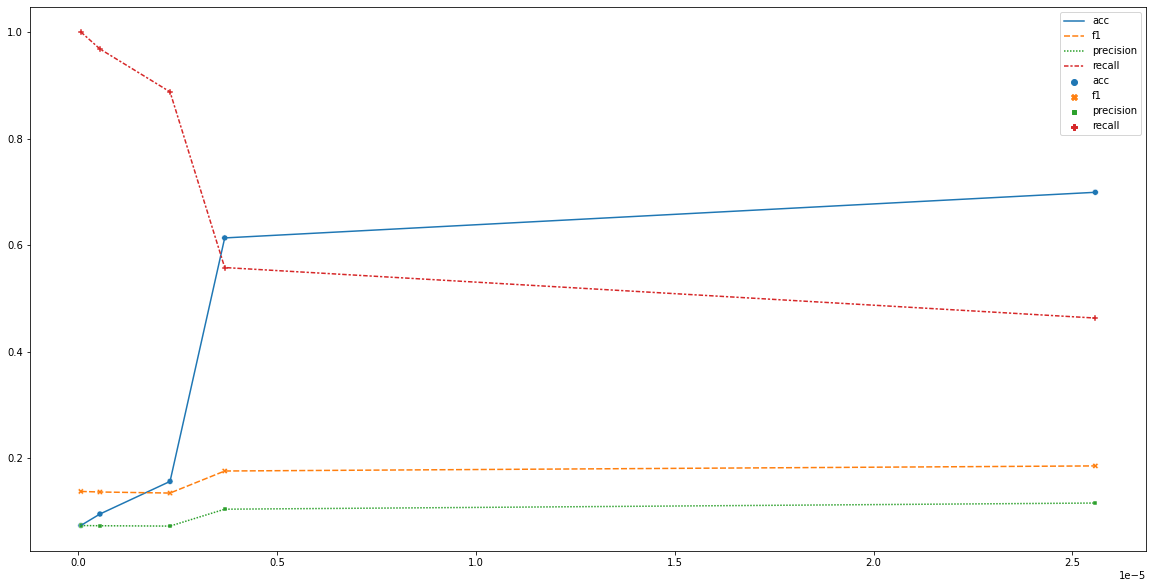

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=test_result.iloc[:-1][['acc', 'f1', 'precision', 'recall']])
sns.scatterplot(data=test_result.iloc[:-1][['acc', 'f1', 'precision', 'recall']])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


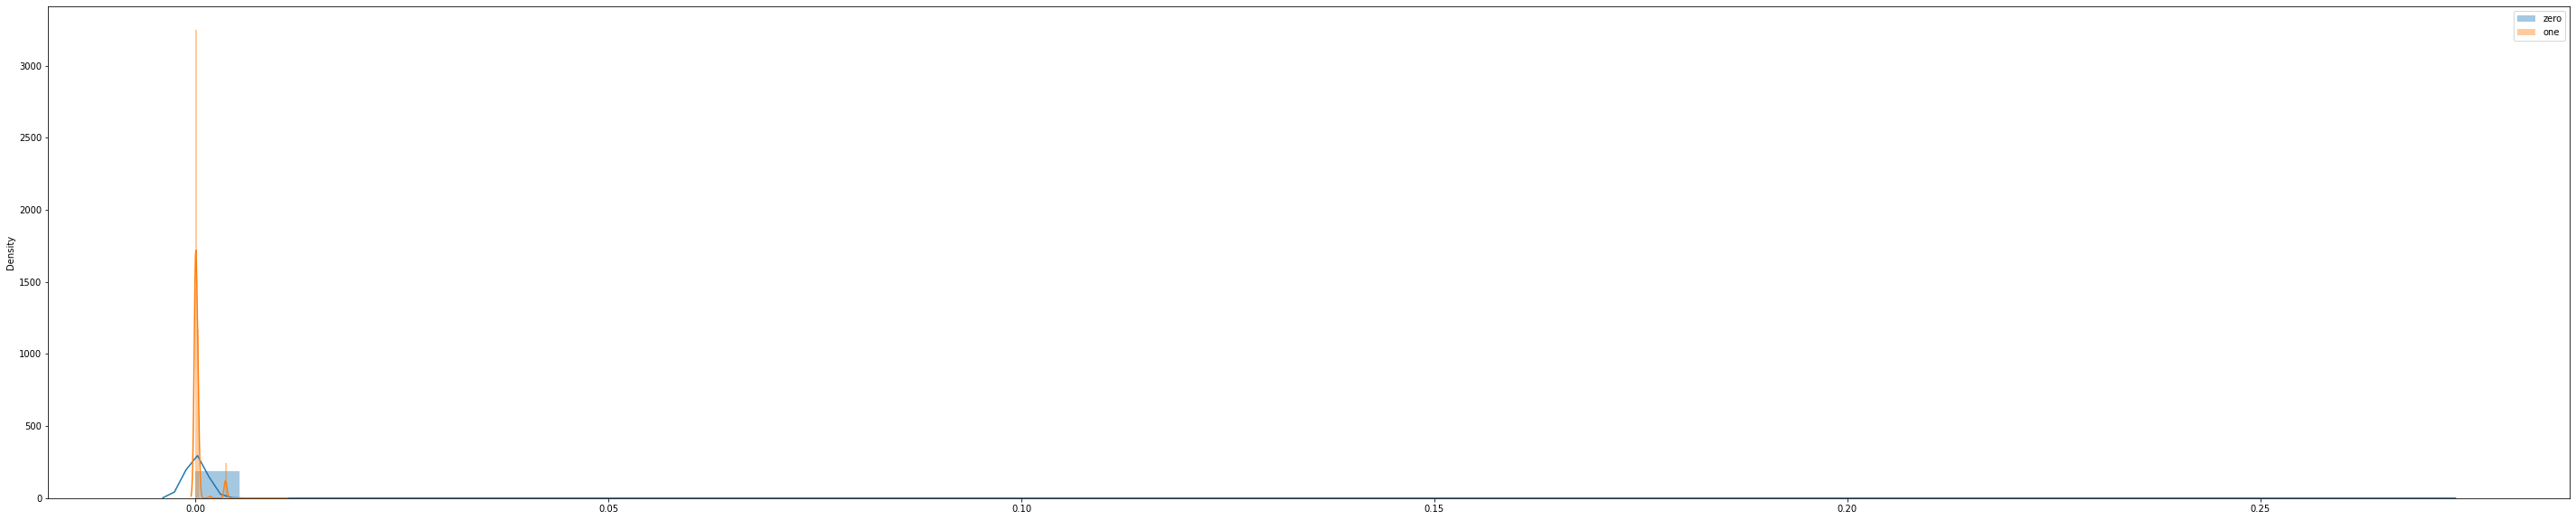

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.distplot(zero, label='zero')
sns.distplot(one, label='one')
plt.legend()
plt.show()

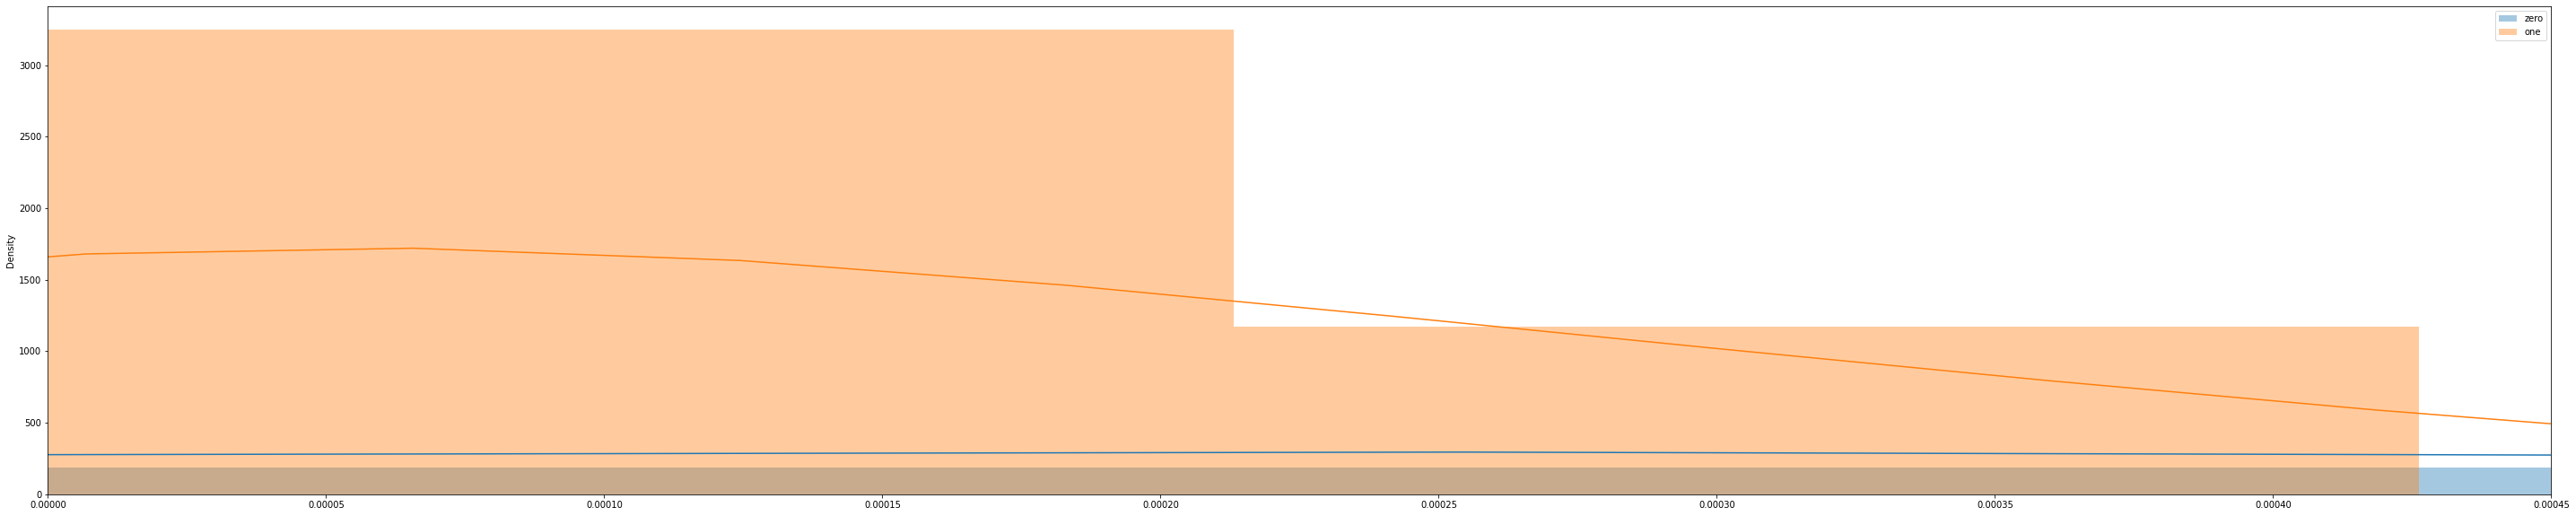

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.distplot(zero, label='zero')
sns.distplot(one, label='one')
plt.xlim(0, 0.00045)
plt.legend()
plt.show()

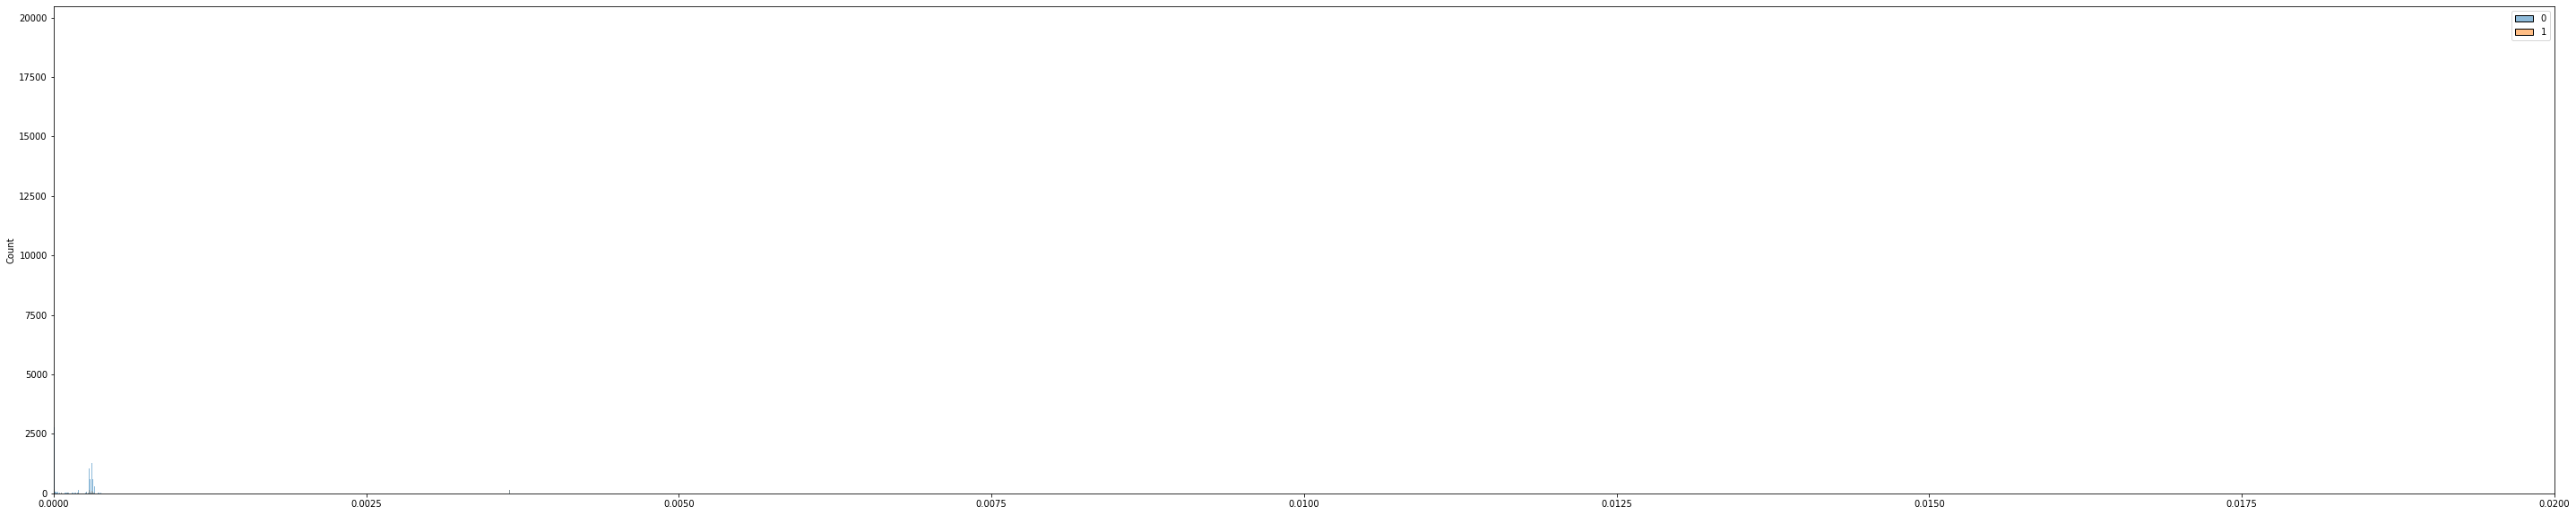

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.histplot([zero, one])
# plt.legend()
plt.xlim(0, 0.02)
plt.show()

zero max, min (0.2696852385997772,) (0.0,)
one max, min (0.010654006153345108,) (5.902262856238849e-08,)


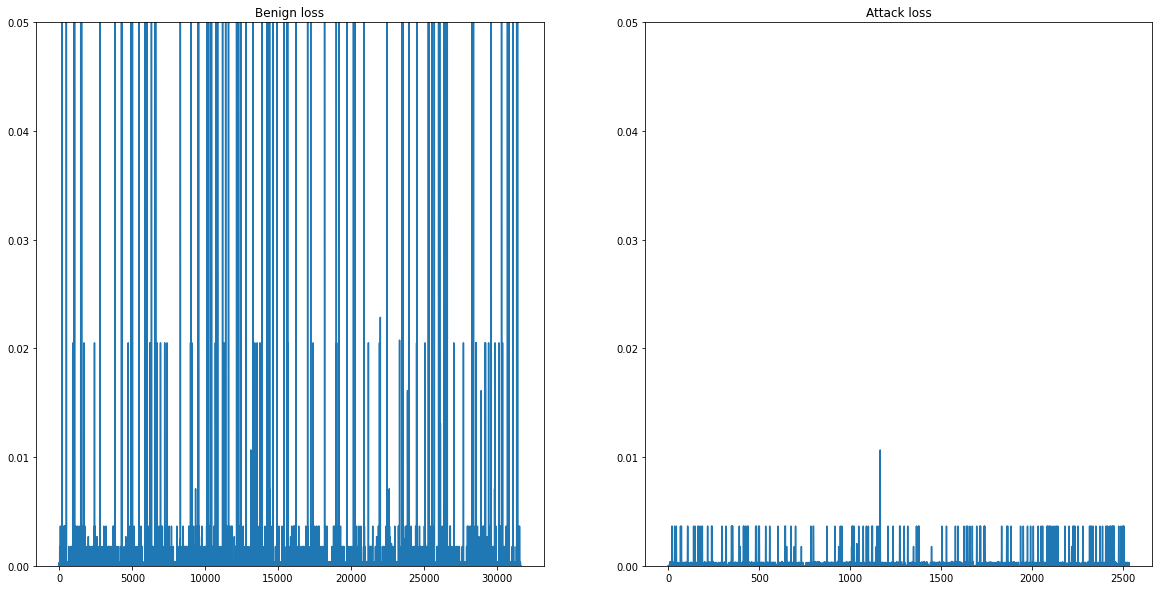

In [ ]:
zero_df = pd.DataFrame(zero)
print('zero max, min', max(zero_df.value_counts().index), min(zero_df.value_counts().index))
one_df = pd.DataFrame(one)
print('one max, min', max(one_df.value_counts().index), min(one_df.value_counts().index))

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].set_ylim([0, 0.05])
ax[1].set_ylim([0, 0.05])
ax[0].plot(zero_df)
ax[0].set_title('Benign loss')
ax[1].plot(one_df)
ax[1].set_title('Attack loss')
plt.show()

# AE with LGBM-Important-Feature

In [ ]:
LGBM_col = list(ML_result.loc['LGBMClassifier', 'important features'])
LGBM_col

['Active Max',
 'Active Std',
 'Active Mean',
 'Bwd IAT Std',
 'Idle Max',
 'Bwd IAT Max',
 'Bwd IAT Mean']

In [ ]:
LGBM_col = ['Active Max',
 'Active Std',
 'Active Mean',
 'Bwd IAT Std',
 'Idle Max',
 'Bwd IAT Max',
 'Bwd IAT Mean']

In [ ]:
hop_normal = hop[hop['Type']==0][LGBM_col+['Label', 'Type']]
hop_abnormal = hop[hop['Type']==1][LGBM_col+['Label', 'Type']]

In [ ]:
hop_normal.shape, hop_abnormal.shape

((91632, 9), (2534, 9))

In [ ]:
from dask_ml.preprocessing import MinMaxScaler
def Scaler(train_df):
  X = train_df.copy()
  X.drop(columns=['Label', 'Type'], inplace=True)
  mm = MinMaxScaler()
  mm.fit(X)
  return mm

def MinMax(df, scaler):
  X = df.drop(columns=['Label', 'Type'])
  y = df['Type']
  X_mm = scaler.transform(X)
  return X_mm, y

# tcp_normal_sample = tcp_normal.loc[tcp_normal_sample_idx, :]
# tcp_abnormal_sample = tcp_abnormal.loc[tcp_abnormal_sample_idx, :]

# udp_normal_sample = udp_normal.loc[udp_normal_sample_idx, :]
# udp_abnormal_sample = udp_abnormal.loc[udp_abnormal_sample_idx, :]

hop_normal_sample = hop_normal
hop_abnormal_sample = hop_abnormal

# Columns transform
# tcp_mm = Scaler(tcp_normal_sample)
# udp_mm = Scaler(udp_normal_sample)
hop_mm = Scaler(hop_normal_sample)

# X_tcp_normal_mm, y_tcp_normal = MinMax(tcp_normal_sample, tcp_mm)
# X_udp_normal_mm, y_udp_normal = MinMax(udp_normal_sample, udp_mm)
X_hop_normal_mm, y_hop_normal = MinMax(hop_normal_sample, hop_mm)

# X_tcp_abnormal_mm, y_tcp_abnormal = MinMax(tcp_abnormal_sample, tcp_mm)
# X_udp_abnormal_mm, y_udp_abnormal = MinMax(udp_abnormal_sample, udp_mm)
X_hop_abnormal_mm, y_hop_abnormal = MinMax(hop_abnormal_sample, hop_mm)

In [ ]:
# X_tcp_normal_mm_train = X_tcp_normal_mm[:60000]
# X_udp_normal_mm_train = X_udp_normal_mm[:60000]
X_hop_normal_mm_train = X_hop_normal_mm[:60000]
# X_tcp_normal_mm_test = X_tcp_normal_mm[60000:]
# X_udp_normal_mm_test = X_udp_normal_mm[60000:]
X_hop_normal_mm_test = X_hop_normal_mm[60000:]
# y_tcp_normal_train = y_tcp_normal[:60000]
# y_udp_normal_train = y_udp_normal[:60000]
y_hop_normal_train = y_hop_normal[:60000]
# y_tcp_normal_test = y_tcp_normal[60000:]
# y_udp_normal_test = y_udp_normal[60000:]
y_hop_normal_test = y_hop_normal[60000:]

In [ ]:
from torch.utils.data import Dataset

# reset_index
def get_new_idx(data):
  data = data.reset_index().drop('index',axis=1)
  return data

# customize dataset
class CustomDataset(Dataset):
  def __init__(self, feature, label):
    self.feature = feature
    # idx = self.feature.index
    self.label = label

  def __len__(self):
    return len(self.feature)

  def __getitem__(self, index) : 
    feature = torch.from_numpy(self.feature.loc[index].values).float()
    label = torch.from_numpy(self.label.loc[index].values).float()
    
    return feature, label

In [ ]:
from torch.utils.data import DataLoader

# tcp_test_raw = pd.concat([X_tcp_abnormal_mm, X_tcp_normal_mm_test])
# udp_test_raw = pd.concat([X_udp_abnormal_mm, X_udp_normal_mm_test])
hop_test_raw = pd.concat([X_hop_abnormal_mm, X_hop_normal_mm_test])

# tcp_label_raw = pd.concat([y_tcp_abnormal, y_tcp_normal_test])
# udp_label_raw = pd.concat([y_udp_abnormal, y_udp_normal_test])
hop_label_raw = pd.concat([y_hop_abnormal, y_hop_normal_test])

# tcp_train = get_new_idx(X_tcp_normal_mm_train)
# udp_train = get_new_idx(X_udp_normal_mm_train)
hop_train = get_new_idx(X_hop_normal_mm_train)
# tcp_test = get_new_idx(tcp_test_raw)
# udp_test = get_new_idx(udp_test_raw)
hop_test = get_new_idx(hop_test_raw)

# tcp_label_train = get_new_idx(y_tcp_normal_train)
# udp_label_train = get_new_idx(y_udp_normal_train)
hop_label_train = get_new_idx(y_hop_normal_train)
# tcp_label_test = get_new_idx(tcp_label_raw)
# udp_label_test = get_new_idx(udp_label_raw)
hop_label_test = get_new_idx(hop_label_raw)

# to_tensor and dataloader
BATCH_SIZE = 32
# tcp_train_loader = DataLoader(CustomDataset(tcp_train, tcp_label_train), BATCH_SIZE, shuffle=True)
# udp_train_loader = DataLoader(CustomDataset(udp_train, udp_label_train), BATCH_SIZE, shuffle=True)
hop_train_loader = DataLoader(CustomDataset(hop_train, hop_label_train), BATCH_SIZE, shuffle=True)
# test_loader1 = DataLoader(CustomDataset(tcp_test, tcp_label_test), BATCH_SIZE, shuffle=True)
# test_loader2 = DataLoader(CustomDataset(udp_test, udp_label_test), BATCH_SIZE, shuffle=True)
hop_test_loader = DataLoader(CustomDataset(hop_test, hop_label_test), BATCH_SIZE, shuffle=True)

In [ ]:
import torch
for data in hop_train_loader:
  BATCH_SIZE, FEATURE_NUM = data[0].shape
  break

print(BATCH_SIZE, FEATURE_NUM)

32 7


## Base AE Model - AutoEncoder

In [ ]:
import tensorflow as tf
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd

# AutoEncoder
class AutoEncoder(nn.Module):
  def __init__(self, input_dim, output_dim, code_size=2):
    super(AutoEncoder, self).__init__()

    self.input_dim = input_dim
    self.output_dim = output_dim

    self.encoder = nn.Sequential(
        nn.Linear(input_dim, code_size),
        nn.BatchNorm1d(2),
        nn.ReLU(),
    )

    self.decoder = nn.Sequential(
        nn.Linear(code_size, output_dim),
        nn.Sigmoid()
    )

  def forward(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded, decoded

In [ ]:
# Base AE with lgbm setting
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_hop_ae_lgbm = AutoEncoder(input_dim=FEATURE_NUM, 
                    output_dim=FEATURE_NUM).to(DEVICE)
criterion = nn.MSELoss()
learning_rate = 0.0008
optimizer = torch.optim.Adam(model_hop_ae_lgbm.parameters(),lr=learning_rate)
model_hop_ae_lgbm

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=7, out_features=2, bias=True)
    (1): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=7, bias=True)
    (1): Sigmoid()
  )
)

### Train

In [ ]:
# model_hop_ae_lgbm training
from tqdm import tqdm
train_losses = []

num_epochs = 10
for epoch in tqdm(range(num_epochs)):
  running_loss = 0
  model_hop_ae_lgbm.train()
  for datas in hop_train_loader:
    data, _ = datas
    data = data.to(DEVICE)
    data = data.float()
    # ===================forward=====================
    encoded, decoded = model_hop_ae_lgbm.forward(data)
    loss = criterion(decoded, data)
    # ===================backward====================
    optimizer.zero_grad()
    loss.backward()

    # Step backwards
    optimizer.step()
    running_loss += loss.item()
  train_losses.append(running_loss/len(hop_train_loader))
  # ===================log========================
  print(f'epoch [{epoch + 1}/{num_epochs}], train loss:{running_loss/len(hop_train_loader):.4f}')

 10%|█         | 1/10 [00:30<04:35, 30.59s/it]

epoch [1/10], train loss:0.0507


 20%|██        | 2/10 [00:55<03:37, 27.23s/it]

epoch [2/10], train loss:0.0025


 30%|███       | 3/10 [01:20<03:02, 26.04s/it]

epoch [3/10], train loss:0.0015


 40%|████      | 4/10 [01:44<02:32, 25.40s/it]

epoch [4/10], train loss:0.0012


 50%|█████     | 5/10 [02:07<02:02, 24.56s/it]

epoch [5/10], train loss:0.0008


 60%|██████    | 6/10 [02:30<01:35, 23.97s/it]

epoch [6/10], train loss:0.0006


 70%|███████   | 7/10 [02:53<01:10, 23.61s/it]

epoch [7/10], train loss:0.0005


 80%|████████  | 8/10 [03:16<00:46, 23.42s/it]

epoch [8/10], train loss:0.0005


 90%|█████████ | 9/10 [03:39<00:23, 23.20s/it]

epoch [9/10], train loss:0.0004


100%|██████████| 10/10 [04:01<00:00, 24.18s/it]

epoch [10/10], train loss:0.0004


In [ ]:
torch.save(model_hop_ae_lgbm, '/content/drive/MyDrive/Colab Notebooks/DL_proj/AD-DL Proj/model/AE_code2_B32_E10_model_hop_ae_lgbm_alldata.pt')

In [ ]:
model_hop_ae_lgbm = torch.load('/content/drive/MyDrive/Colab Notebooks/DL_proj/AD-DL Proj/model/AE_code2_B32_E10_model_hop_ae_lgbm_alldata.pt')

In [ ]:
# Simple AE setting
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_hop_ae_lgbm = model_hop_ae_lgbm.to(DEVICE)
criterion = nn.MSELoss()
learning_rate = 0.0008
optimizer = torch.optim.Adam(model_hop_ae_lgbm.parameters(),lr=learning_rate)
model_hop_ae_lgbm

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=7, out_features=2, bias=True)
    (1): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=7, bias=True)
    (1): Sigmoid()
  )
)

In [ ]:
# code_size = 2
# train_loss collection
from tqdm import tqdm
model_hop_ae_lgbm.eval()

train_loss_collection = []

with torch.no_grad():
  for datases in tqdm(hop_train_loader): 
    datas, labels = datases
    for data, label in zip(datas, labels):
      data = data.to(DEVICE)
      label = np.array(label)
      data = data.reshape(1, data.shape[0])
      encoded, decoded = model_hop_ae_lgbm.forward(data)
      loss = criterion(decoded, data)
      loss = loss.item()
      train_loss_collection.append(loss)

len(train_loss_collection)

100%|██████████| 1875/1875 [00:30<00:00, 60.58it/s]


60000

### Test

#### First Threshold

In [ ]:
import numpy as np
threshold = np.percentile(train_loss_collection, range(0, 101, 10))
threshold

array([1.65419234e-08, 6.59679245e-06, 6.60772412e-06, 6.61490185e-06,
       6.62277762e-06, 6.63036826e-06, 6.64330082e-06, 8.42913578e-05,
       8.42913578e-05, 3.43701430e-04, 2.12603241e-01])

In [ ]:
# code_size = 2
# model_hop_ae_lgbm

# threshold
import numpy as np
threshold = sorted(list(set(np.percentile(train_loss_collection, range(0, 101, 10)))))

from tqdm import tqdm
model_hop_ae_lgbm.eval()

predicted_abnormal = []
predicted_normal = []
real_abnormal = []
real_normal = []
total_loss = []
zero = []
one = []
f1_best = 0

test_result = pd.DataFrame(columns=['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall'], index=threshold)

for th in threshold:
  zero1 = []
  one1 = []
  total_loss1 = []
  # evaluation initiation
  tp = fn = fp = tn = 0
  with torch.no_grad():
    for datases in tqdm(hop_test_loader): 
      datas, labels = datases
      running_val_loss = 0 
      predicted_abnormal1 = []
      predicted_normal1 = []
      real_abnormal1 = []
      real_normal1 = []
      for data, label in zip(datas, labels):
        data = data.to(DEVICE)
        label = np.array(label)
        data = data.reshape(1, data.shape[0])
        encoded, decoded = model_hop_ae_lgbm.forward(data)
        loss = criterion(decoded, data)
        loss = loss.item()
        # loss >= 0.001 ; predict as 'Abnormal'
        if loss >= th:
          # label == 0 ; real 'Normal'
          if label == 0: 
            fp += 1
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            tp += 1
            real_abnormal1.append(loss)
          predicted_abnormal1.append(loss)
        # loss < 0.001 ; predict as 'Normal'
        elif loss < th: 
          # label == 0 ; real 'Normal'
          if label == 0: 
            tn += 1
            real_normal1.append(loss)
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            fn += 1
          predicted_normal1.append(loss)
        total_loss1.append(loss)
        if label == 1:
          one1.append(loss)
        else:
          zero1.append(loss)
  try:
    acc = (tp+tn)/(tp+fn+fp+tn)
  except:
    acc = 'NaN'
  try:
    precision = tp/(tp+fp)
  except:
    precision = 'NaN'
  try:
    recall = tp/(tp+fn)
  except:
    recall = 'NaN'
  try:
    f1 = 2*(precision*recall)/(precision+recall)
  except:
    f1 = 'NaN'

  if f1 != 'NaN' and f1 > f1_best:
    f1_best = f1
    one = one1.copy()
    zero = zero1.copy()
    total_loss = total_loss1.copy()
    predicted_abnormal = predicted_abnormal1.copy()
    predicted_normal = predicted_normal1.copy()
    real_abnormal = real_abnormal1.copy()
    real_normal = real_normal1.copy()

  test_result.loc[th] = [tp, fp, tn, fn, acc, f1, precision, recall]
test_result

100%|██████████| 1068/1068 [00:18<00:00, 58.28it/s]


,tp,fp,tn,fn,acc,f1,precision,recall
0.0000000,2534,31631,1,0,0.0741966,0.1380964,0.0741695,1.0000000
0.0000066,2527,30666,966,7,0.1022361,0.1414616,0.0761305,0.9972376
0.0000066,2506,29148,2484,28,0.1460516,0.1466011,0.0791685,0.9889503
0.0000066,2506,28293,3339,28,0.1710765,0.1503615,0.0813663,0.9889503
0.0000066,2506,27543,4089,28,0.1930282,0.1538225,0.0833971,0.9889503
0.0000066,2506,27383,4249,28,0.1977112,0.1545816,0.0838436,0.9889503
0.0000066,2506,26969,4663,28,0.2098285,0.1565810,0.0850212,0.9889503
0.0000843,1607,14536,17096,927,0.5474156,0.1720833,0.0995478,0.6341752
0.0003437,1118,8284,23348,1416,0.7160920,0.1873324,0.1189109,0.4411997
0.2126032,1,15,31617,2533,0.9254229,0.0007843,0.0625000,0.0003946


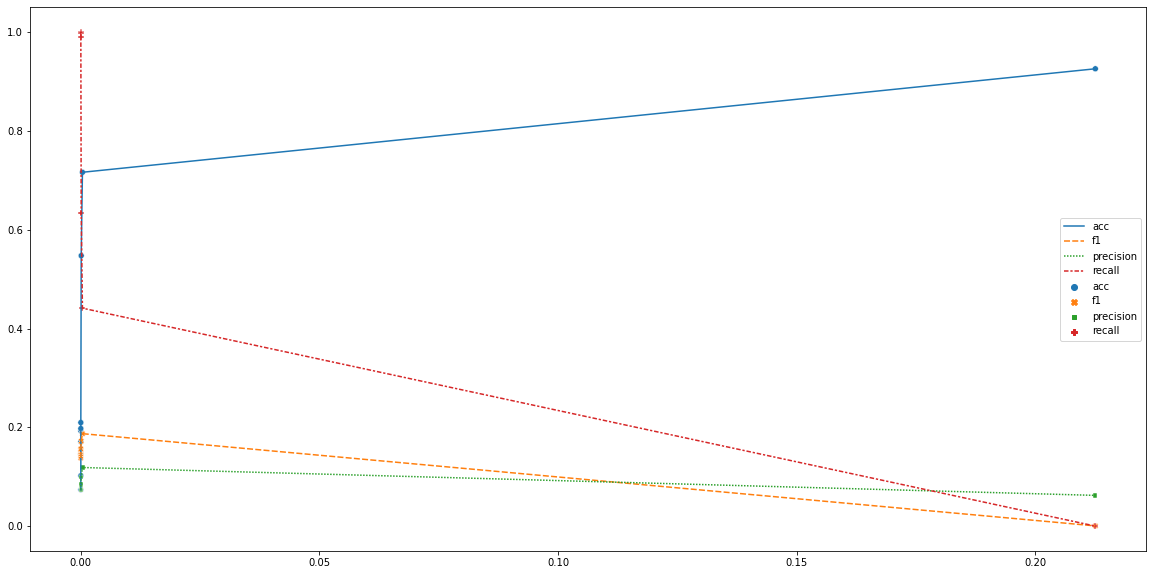

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=test_result[['acc', 'f1', 'precision', 'recall']])
sns.scatterplot(data=test_result[['acc', 'f1', 'precision', 'recall']])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


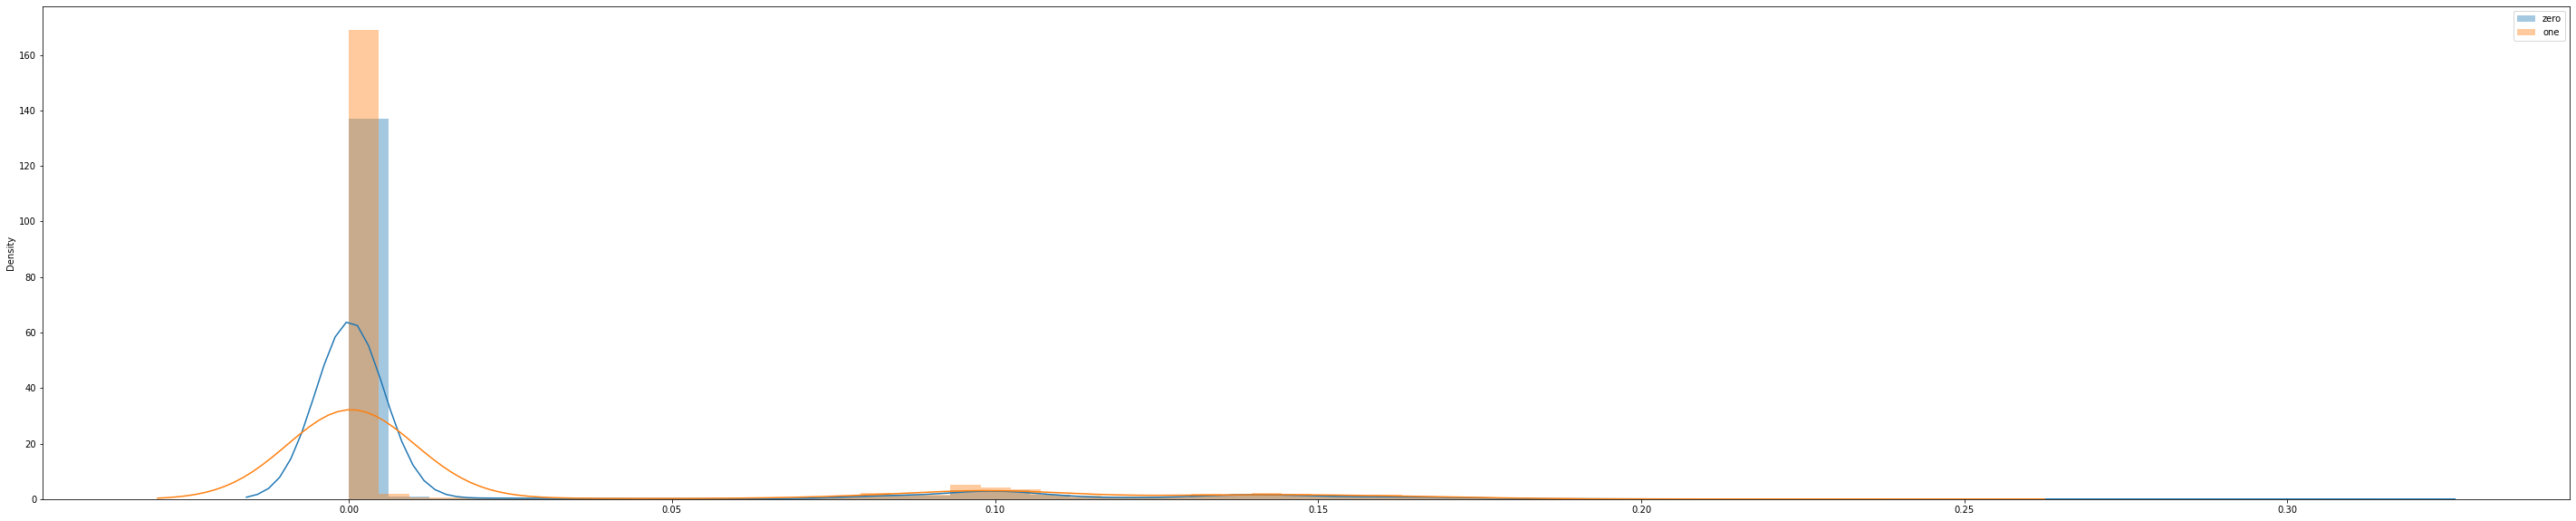

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.distplot(zero, label='zero')
sns.distplot(one, label='one')
plt.legend()
plt.show()

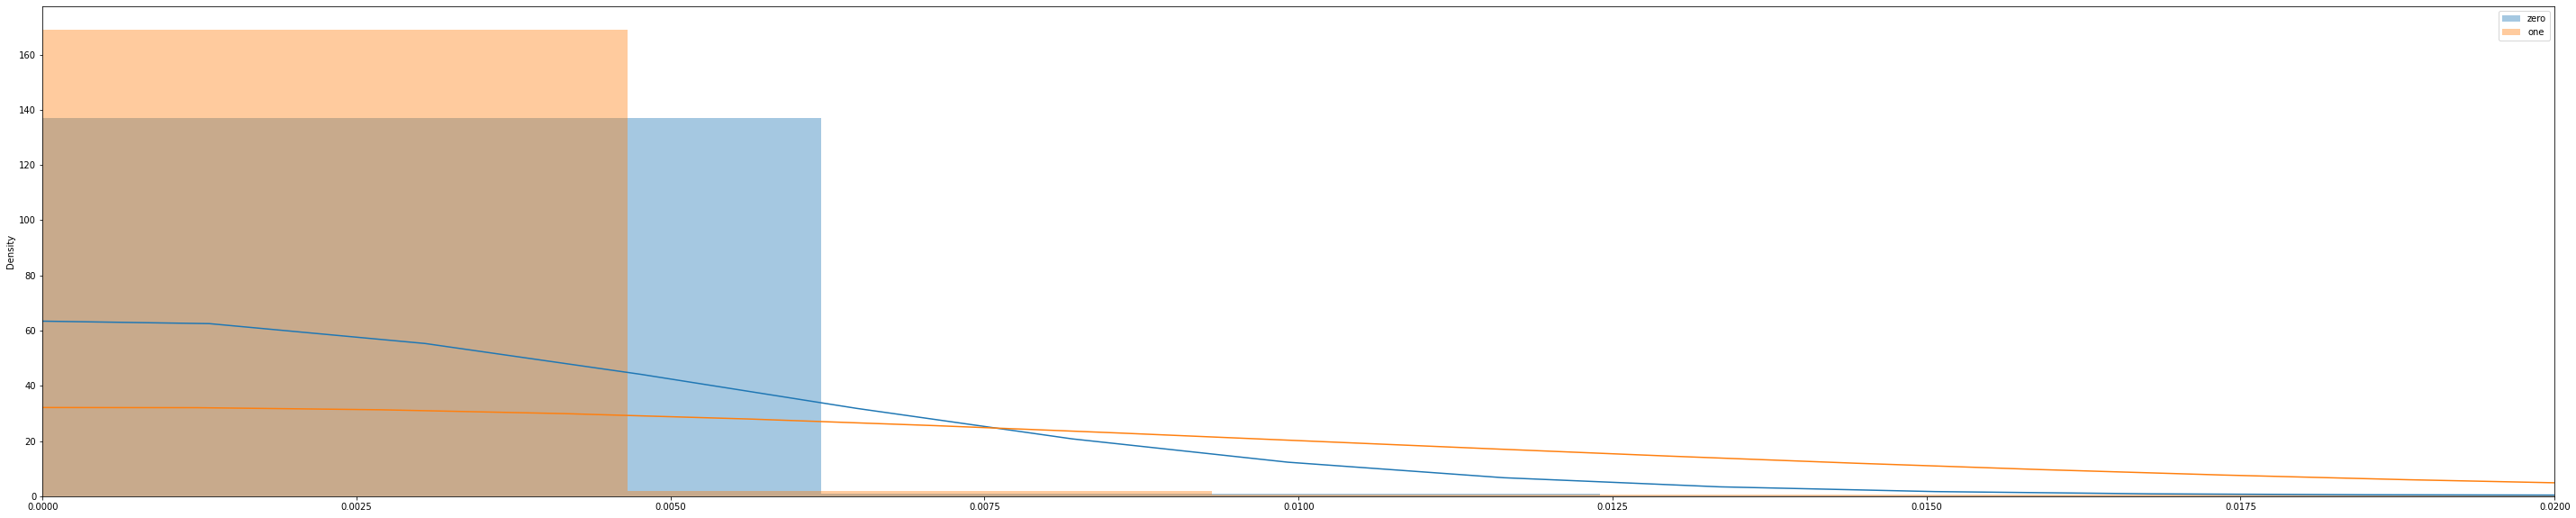

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.distplot(zero, label='zero')
sns.distplot(one, label='one')
plt.xlim(0, 0.02)
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.histplot([zero, one])
# plt.legend()
plt.xlim(0, 0.02)
plt.show()

zero max, min (0.3100770115852356,) (1.2495422474501083e-08,)
one max, min (0.2328084260225296,) (1.3219144534559746e-07,)


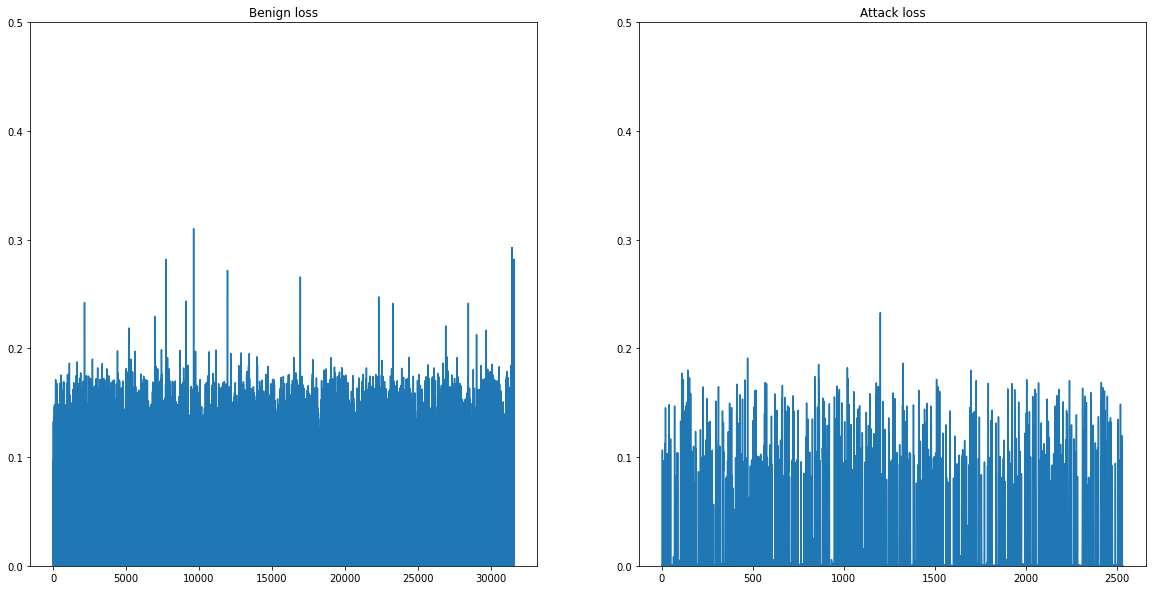

In [ ]:
zero_df = pd.DataFrame(zero)
print('zero max, min', max(zero_df.value_counts().index), min(zero_df.value_counts().index))
one_df = pd.DataFrame(one)
print('one max, min', max(one_df.value_counts().index), min(one_df.value_counts().index))

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].set_ylim([0, 0.5])
ax[1].set_ylim([0, 0.5])
ax[0].plot(zero_df)
ax[0].set_title('Benign loss')
ax[1].plot(one_df)
ax[1].set_title('Attack loss')
plt.show()